In [1]:
library(data.table)
library(plyr)
library(tidyverse)
library(doBy)
library(reshape2)
library(psych)
library(scales)
library(Metrics)
library(zoo)
#library(ggExtra)
#library(gridExtra)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x dplyr::between()   masks data.table::between()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::first()     masks data.table::first()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::last()      masks data.table::last()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::rename()
x dplyr::summarise() masks plyr::summarise()
x dplyr::summarize() masks plyr::summarize()
x pu

In [2]:
## Read in model data
model_data_002 = read.csv('002-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_002)

model_data_003 = read.csv('003-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_003)

model_data_004 = read.csv('004-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_004)

model_data_005 = read.csv('005-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_005)

model_data_006 = read.csv('006-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_006)

model_data_007 = read.csv('007-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_007)

model_data_008 = read.csv('008-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_008)

model_data_009 = read.csv('009-model-data-2.0.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"),strip.white=TRUE)
colnames(model_data_009)

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Past_1"         "Past_2"        
 [9] "Past_3"         "Past_4"         "Past_5"         "Future_1"      
[13] "Future_2"       "Future_3"       "Match_Any"      "Match_1"       
[17] "Match_2"        "Match_3"        "Past_CogLoad"   "Future_CogLoad"

In [3]:
## Read in engagement & task load (eng_taskload) data
eng_taskload_data_002 = read.csv('002_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_002)

eng_taskload_data_003 = read.csv('003_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_003)

eng_taskload_data_004 = read.csv('004_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_004)

eng_taskload_data_005 = read.csv('005_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_005)

eng_taskload_data_006 = read.csv('006_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_006)

eng_taskload_data_007 = read.csv('007_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_007)

eng_taskload_data_008 = read.csv('008_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_008)

eng_taskload_data_009 = read.csv('009_eng_taskload.csv', header=T,colClasses=c("UserID"="factor"))
colnames(eng_taskload_data_009)

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

[1] "UserID"     "Time"       "TaskLoad"   "Engagement"

In [4]:
## Read in aggregate cognitive load data
cogload_data_002 = read.csv('002_cogload_data.csv', header=T)
cogload_data_002$UserID <- "002"
cogload_data_002$UserID <- factor(cogload_data_002$UserID)
colnames(cogload_data_002)

cogload_data_003 = read.csv('003_cogload_data.csv', header=T)
cogload_data_003$UserID <- "003"
cogload_data_003$UserID <- factor(cogload_data_003$UserID)
colnames(cogload_data_003)

cogload_data_004 = read.csv('004_cogload_data.csv', header=T)
cogload_data_004$UserID <- "004"
cogload_data_004$UserID <- factor(cogload_data_004$UserID)
colnames(cogload_data_004)

cogload_data_005 = read.csv('005_cogload_data.csv', header=T)
cogload_data_005$UserID <- "005"
cogload_data_005$UserID <- factor(cogload_data_005$UserID)
colnames(cogload_data_005)

cogload_data_006 = read.csv('006_cogload_data.csv', header=T)
cogload_data_006$UserID <- "006"
cogload_data_006$UserID <- factor(cogload_data_006$UserID)
colnames(cogload_data_006)

cogload_data_007 = read.csv('007_cogload_data.csv', header=T)
cogload_data_007$UserID <- "007"
cogload_data_007$UserID <- factor(cogload_data_007$UserID)
colnames(cogload_data_007)

cogload_data_008 = read.csv('008_cogload_data.csv', header=T)
cogload_data_008$UserID <- "008"
cogload_data_008$UserID <- factor(cogload_data_008$UserID)
colnames(cogload_data_008)

cogload_data_009 = read.csv('009_cogload_data.csv', header=T)
cogload_data_009$UserID <- "009"
cogload_data_009$UserID <- factor(cogload_data_009$UserID)
colnames(cogload_data_009)

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

[1] "Time"           "pupilDilation"  "gazeX"          "gazeY"         
 [5] "gazeVelocity"   "movingRmssd"    "deltaGSRsmooth" "Agg_stress"    
 [9] "Agg_cogLoad"    "UserID"

In [37]:
## Read in human distance data
dist_data_002 = read.csv('002_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_002)

dist_data_003 = read.csv('003_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_003)

dist_data_004 = read.csv('004_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_004)

dist_data_005 = read.csv('005_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_005)

dist_data_006 = read.csv('006_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_006)

dist_data_007 = read.csv('007_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_007)

dist_data_008 = read.csv('008_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_008)

dist_data_009 = read.csv('009_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(dist_data_009)

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

In [49]:
## Read in model distance data
model_dist_data_002 = read.csv('002_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_002)

model_dist_data_003 = read.csv('003_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_003)

model_dist_data_004 = read.csv('004_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_004)

model_dist_data_005 = read.csv('005_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_005)

model_dist_data_006 = read.csv('006_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_006)

model_dist_data_007 = read.csv('007_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_007)

model_dist_data_008 = read.csv('008_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_008)

model_dist_data_009 = read.csv('009_model_distance_data.csv', header=T, colClasses=c("UserID"="factor", "Task"="factor"))
colnames(model_dist_data_009)

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

[1] "UserID"         "TotalActionNum" "Time"           "Task"          
 [5] "TaskActionNum"  "Address"        "Key"            "AssemblyDist"  
 [9] "BlockDist"      "FunctionDist"

# Subject 002

The following `from` values were not present in `x`: Point_of_Interest_Triage_2, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID Task                         AssemblyDist.length AssemblyDist.sum
1 002    Point_of_Interest_Triage_1   28                  308             
2 002    Point_of_Interest_Analysis_1  8                  103             
3 002    Point_of_Interest_Analysis_2  2                   18             
4 002    Point_of_Interest_Triage_4   31                  383             
5 002    Point_of_Interest_Analysis_4  2                   24             
  AssemblyDist.mean AssemblyDist.sd AssemblyDist.min AssemblyDist.max
1 11.00000          16.604328       -1               46              
2 12.87500          16.039572       -1               46              
3  9.00000           7.071068        4               14              
4 12.35484          17.402200       -1               55              
5 12.00000           0.000000       12               12

The following `from` values were not present in `x`: Point_of_Interest_Triage_2, Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r         
1 002    0.01851537

Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 26 rows containing missing values (geom_point)."


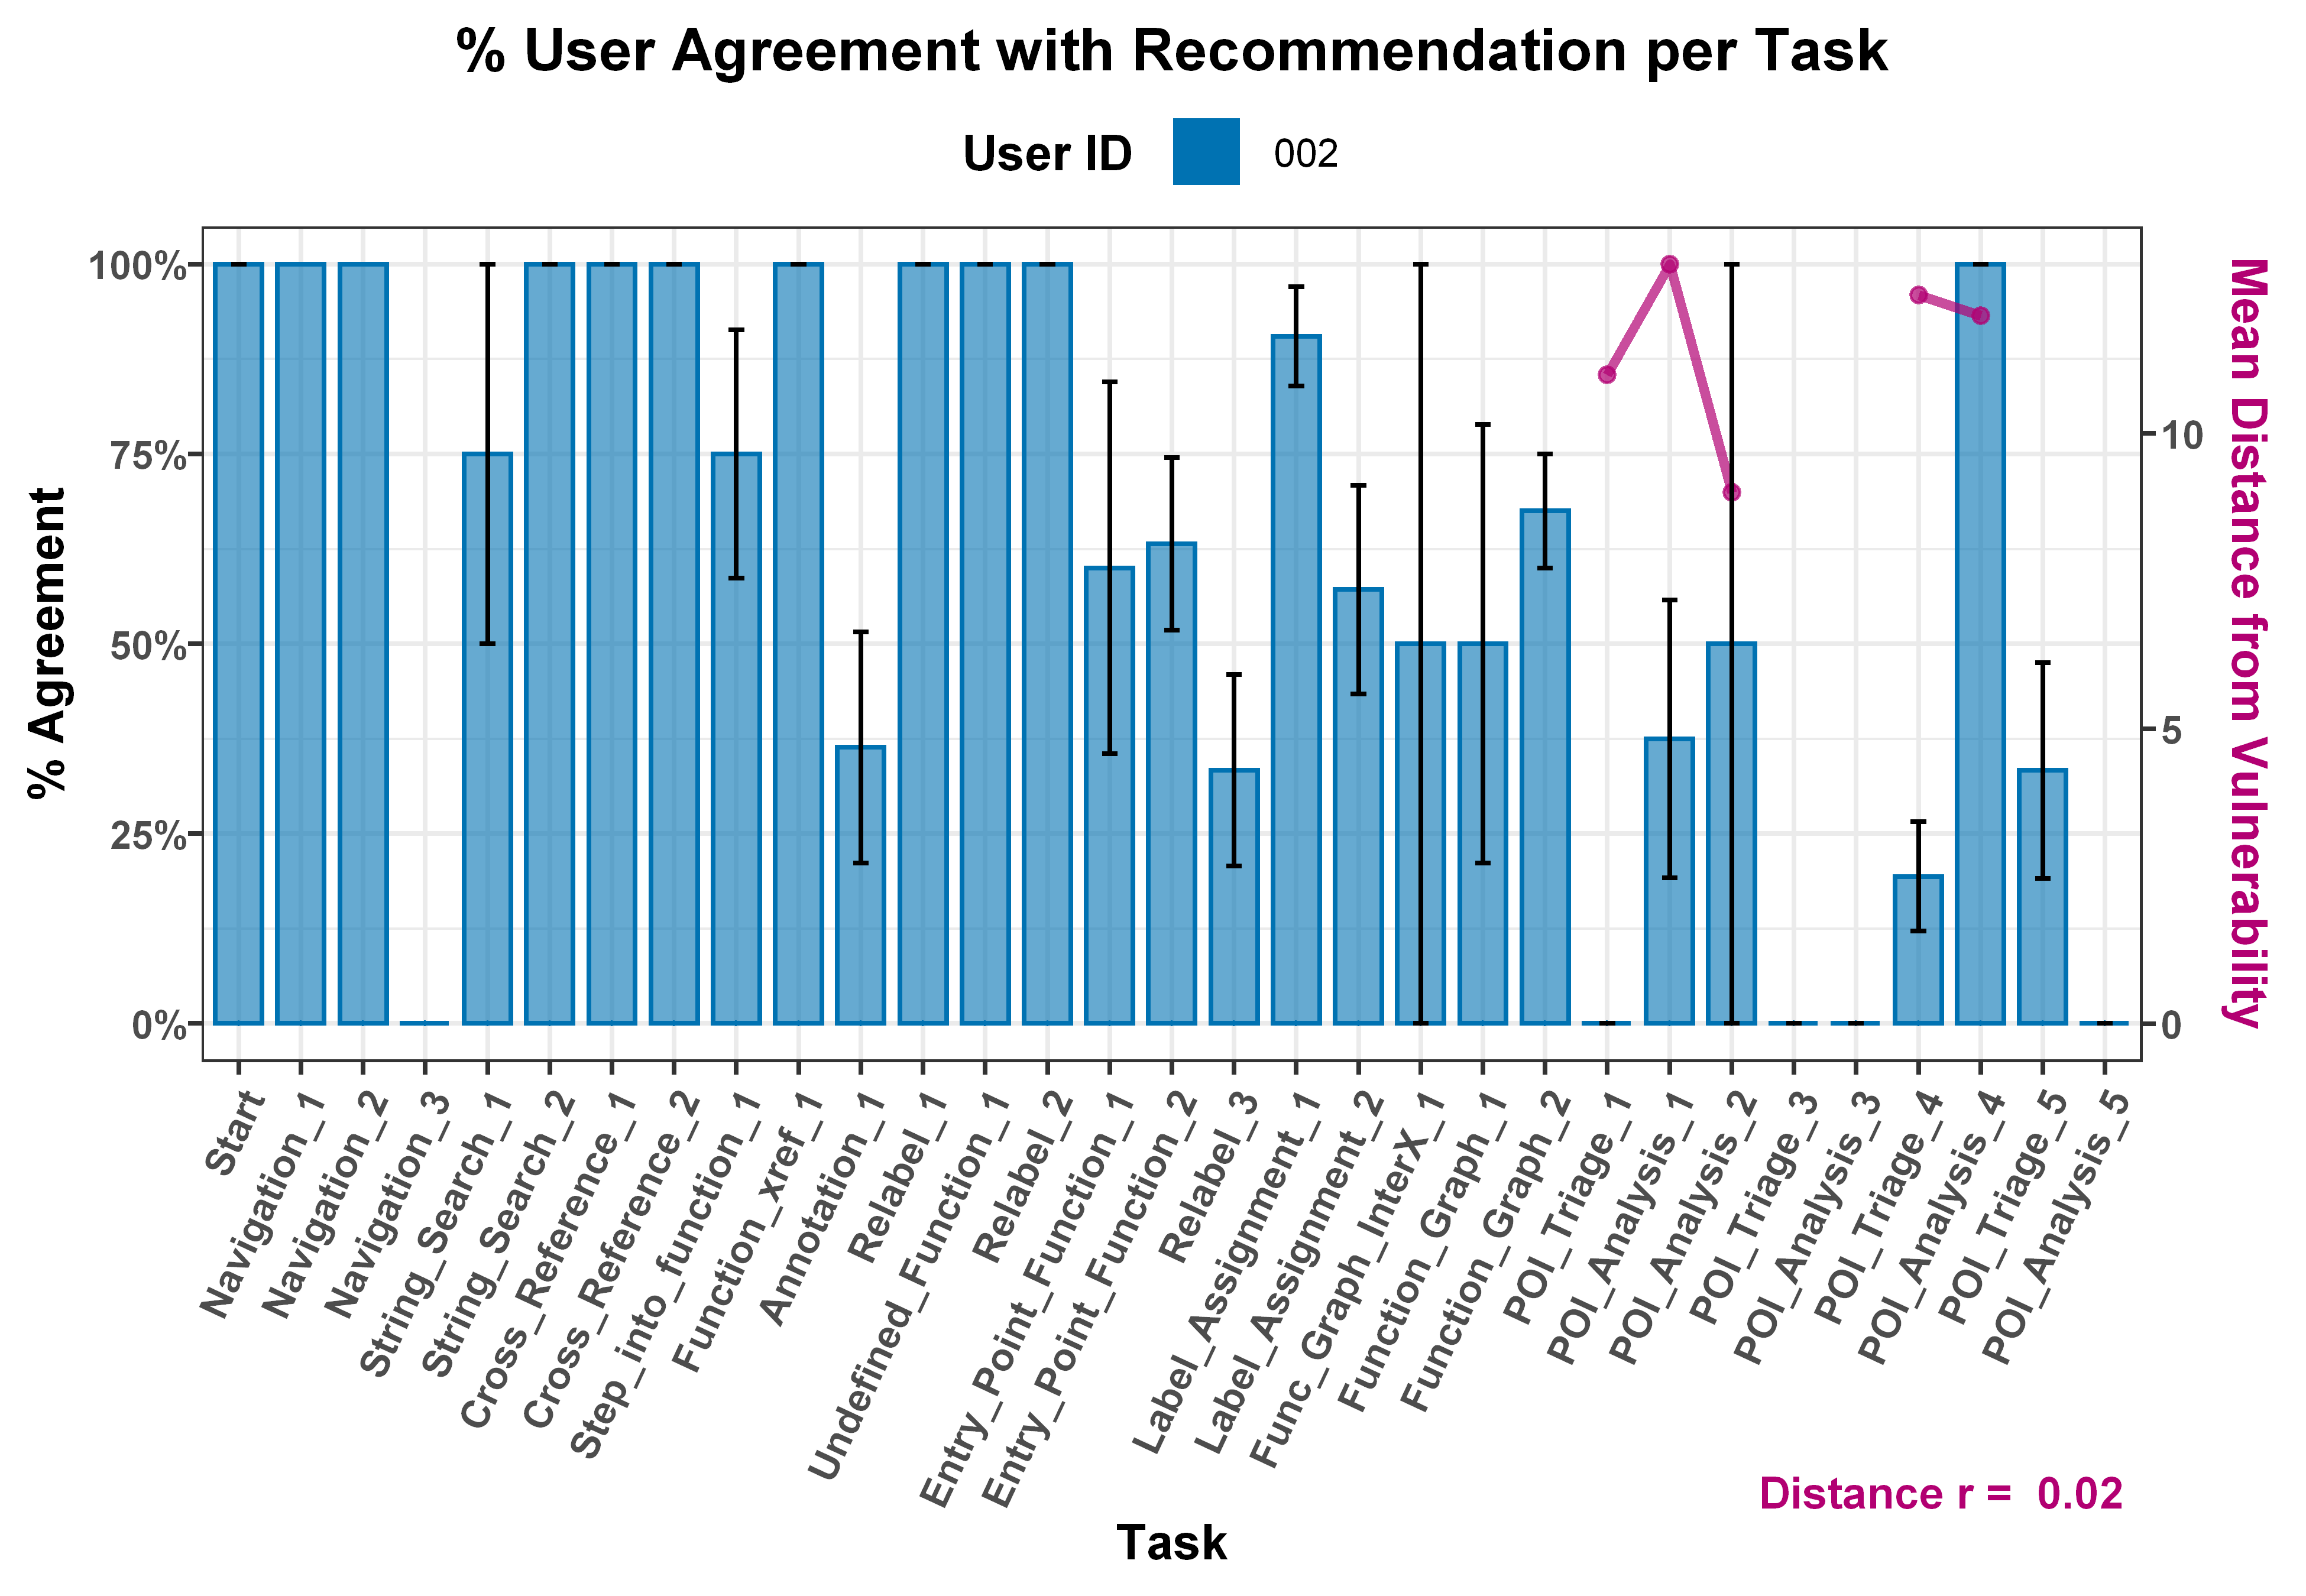

In [38]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_002, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_002, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
#dist_data
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_002 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_002 <- subset(data_002, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_002

agg_002 <- ggplot(data = data_002, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_002$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_002

UserID r_Past_rolled r_Past_interp
1 002    -0.1516563    -0.153933

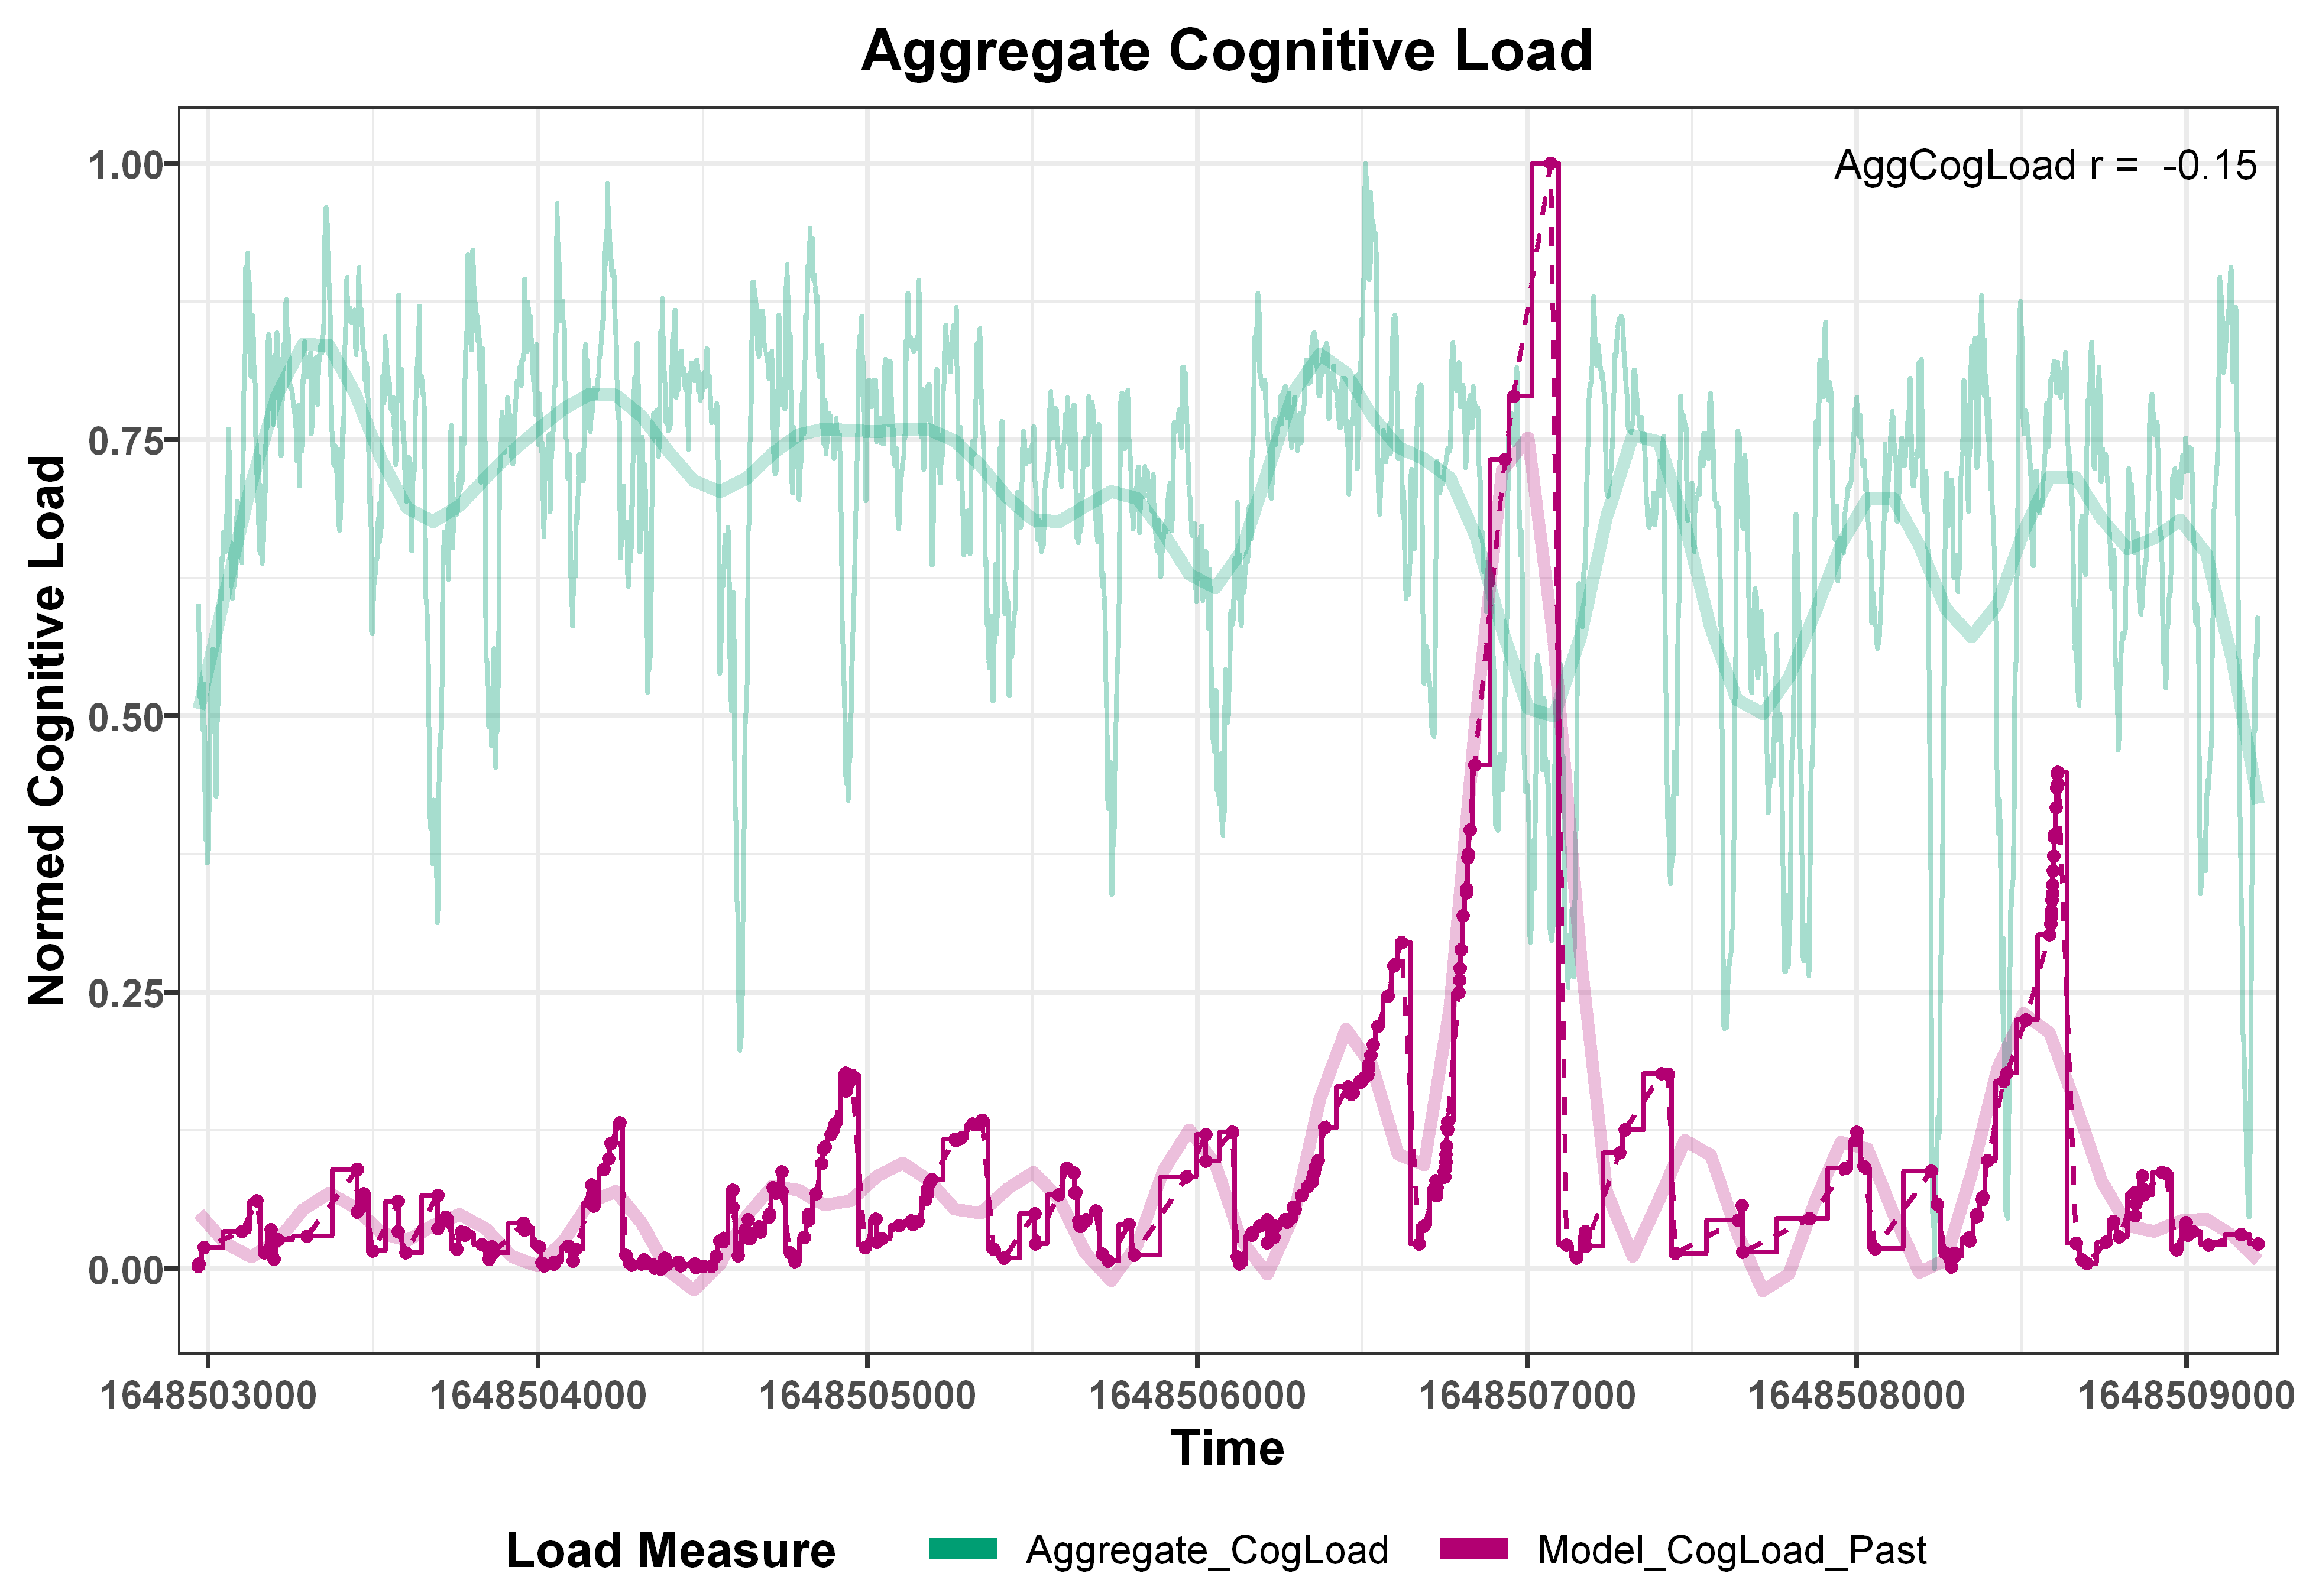

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 002    0.1296586              0.124327               -0.09401436             
  Engagement_r_Past_interp
1 -0.09339387

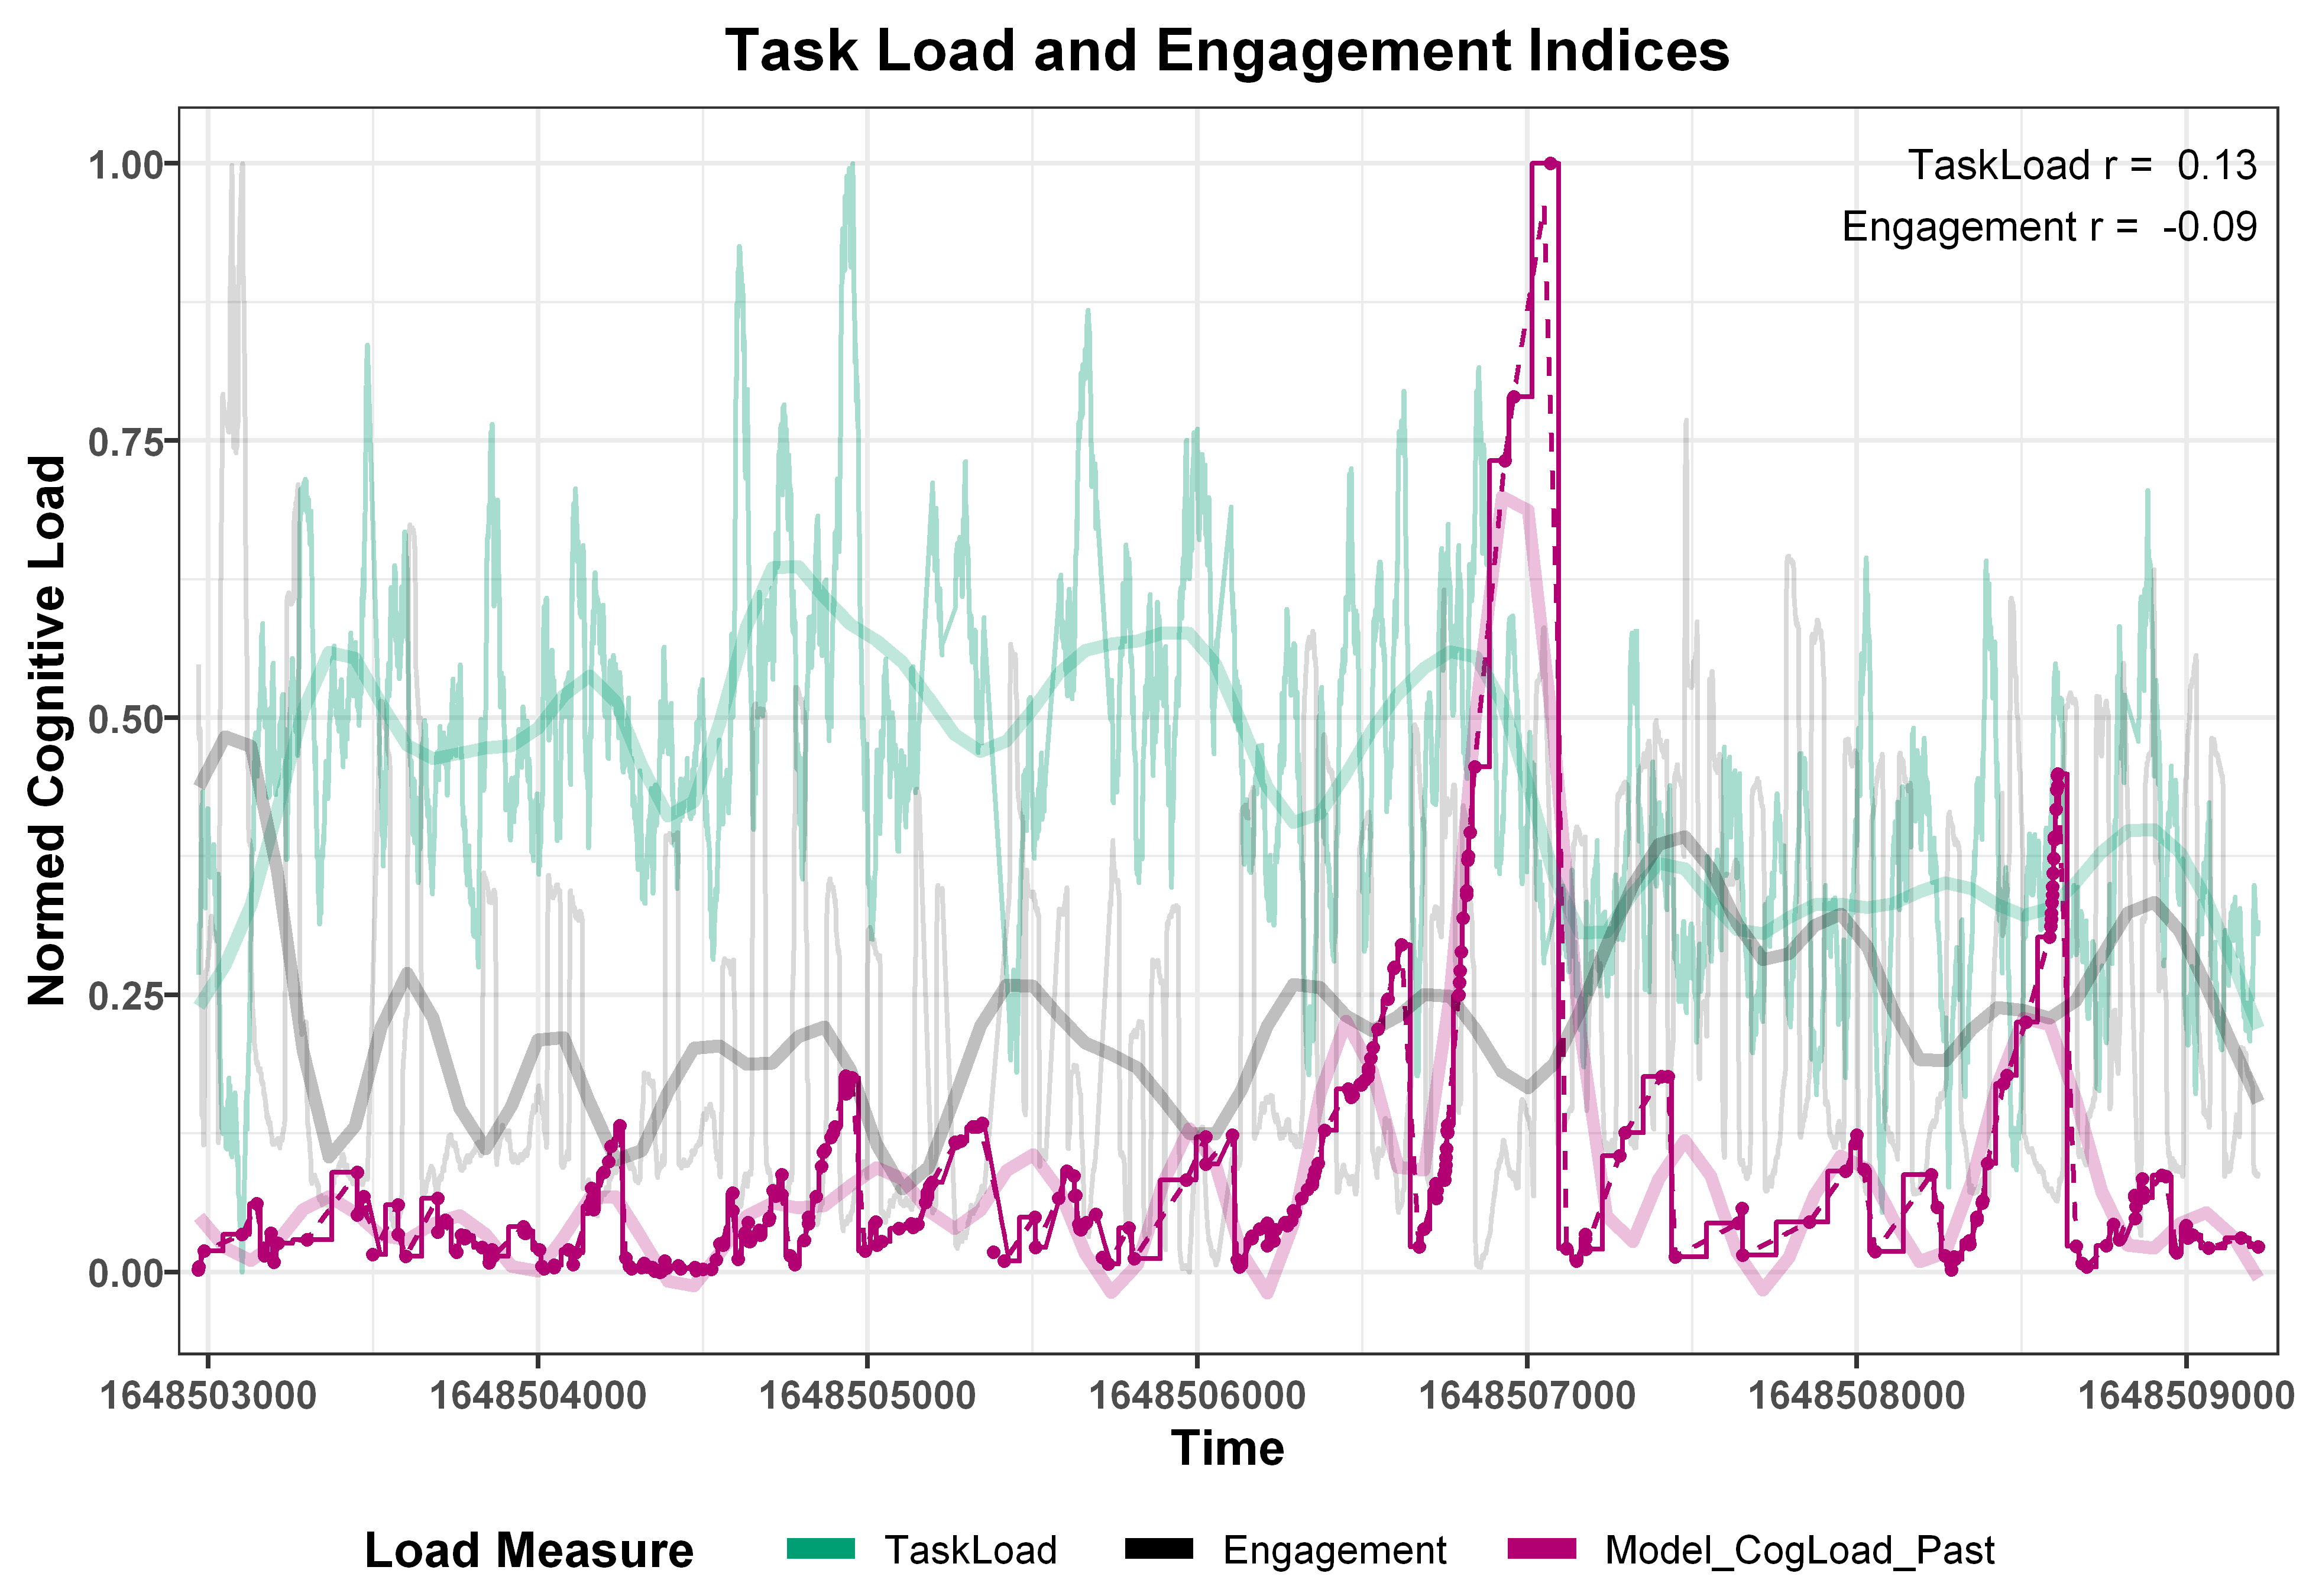

In [7]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_002, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_002 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_002, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
cogload_data <- subset(cogload_data, Time>=min(model_data_002$Time) & Time<=max(model_data_002$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_002, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_002$Time) & Time<=max(model_data_002$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_002 <- data

load_corrs_002 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_002 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = max(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_002$r_Past_rolled[1],2)), hjust = 1, size=3)
load_002

load_corrs_002

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_002 <- data

eng_corrs_002 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_002 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = max(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_002$TaskLoad_r_Past_rolled[1],2)), hjust = 1, size=3) +
                annotate("text", x = max(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_002$Engagement_r_Past_rolled[1],2)), hjust = 1, size=3)

eng_002

eng_corrs_002

# Subject 003

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Triage_5

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r         
1 003    -0.6141873

Warning message:
"Removed 25 row(s) containing missing values (geom_path)."
Warning message:
"Removed 26 rows containing missing values (geom_point)."


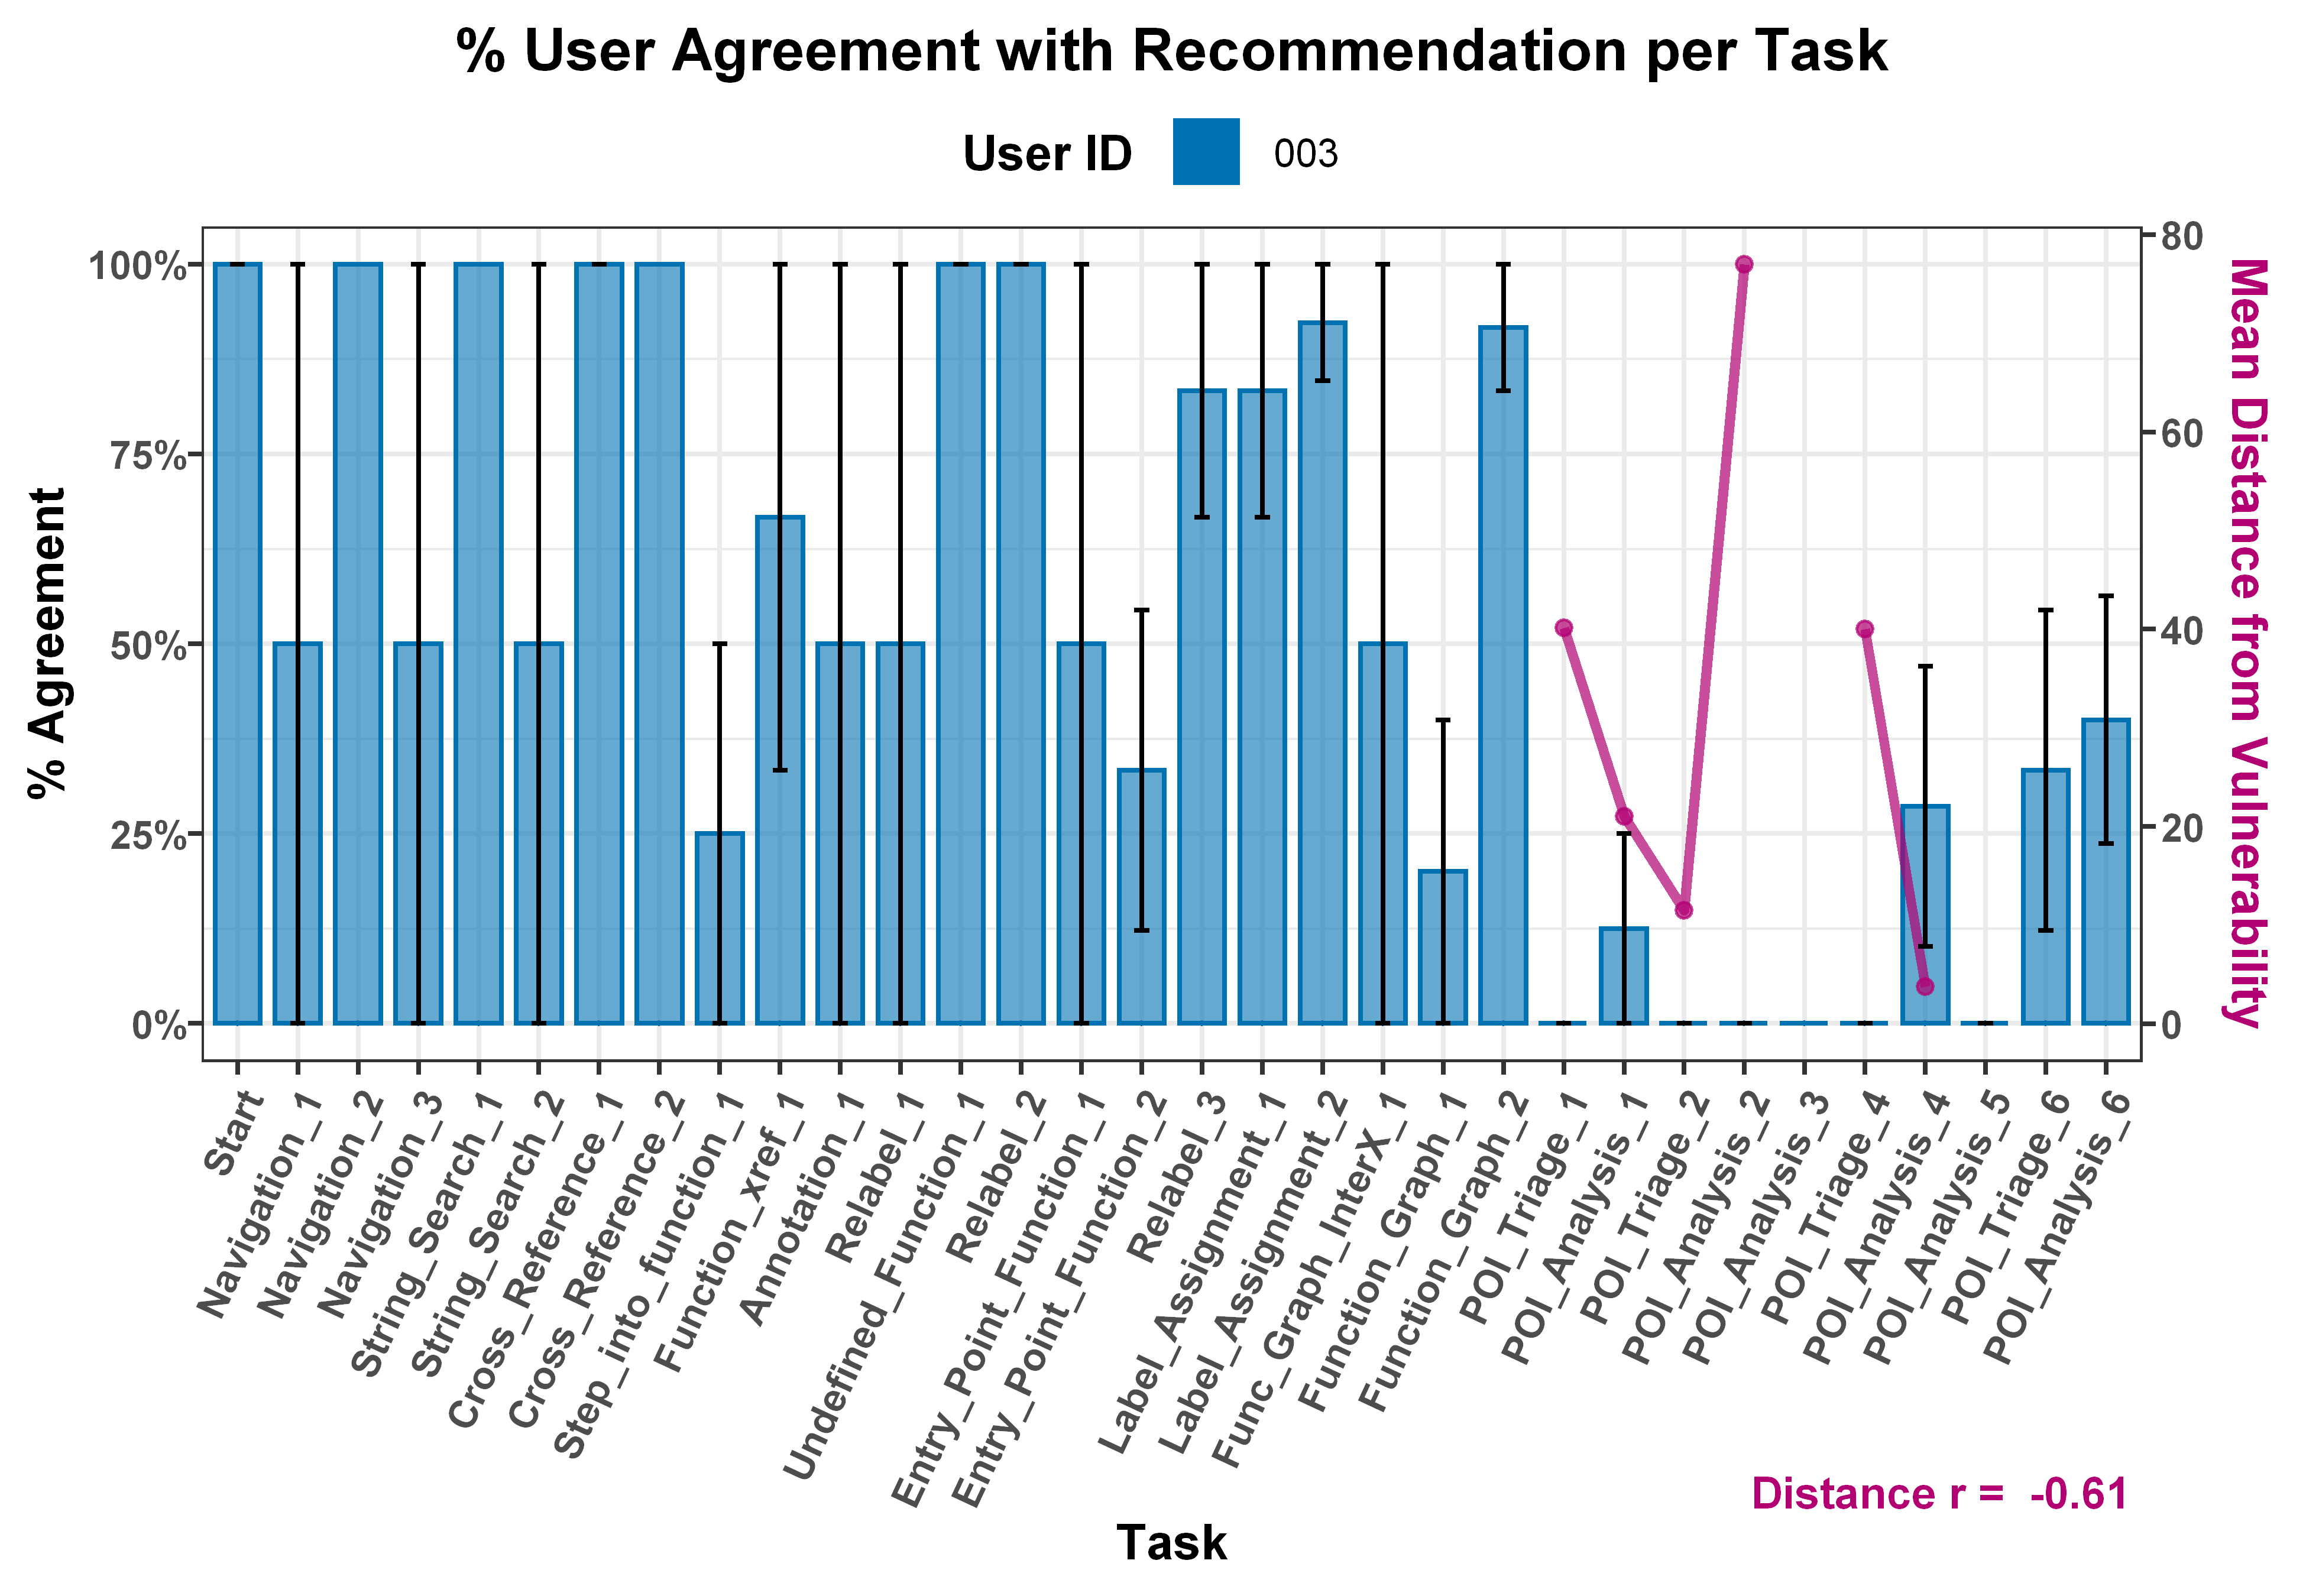

In [39]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_003, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_003, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_003 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_003 <- subset(data_003, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_003

agg_003 <- ggplot(data = data_003, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_003$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_003

Warning message in cor(Agg_cogLoad_normed, Past_CogLoad_normed, use = "pairwise.complete.obs"):
"the standard deviation is zero"
Warning message:
"Removed 1087 rows containing non-finite values (stat_smooth)."
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/Inf in foreign function call (arg 3)"
Warning message:
"Removed 1087 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 rows containing missing values (geom_text)."


UserID r_Past_rolled r_Past_interp
1 003    NA            NA

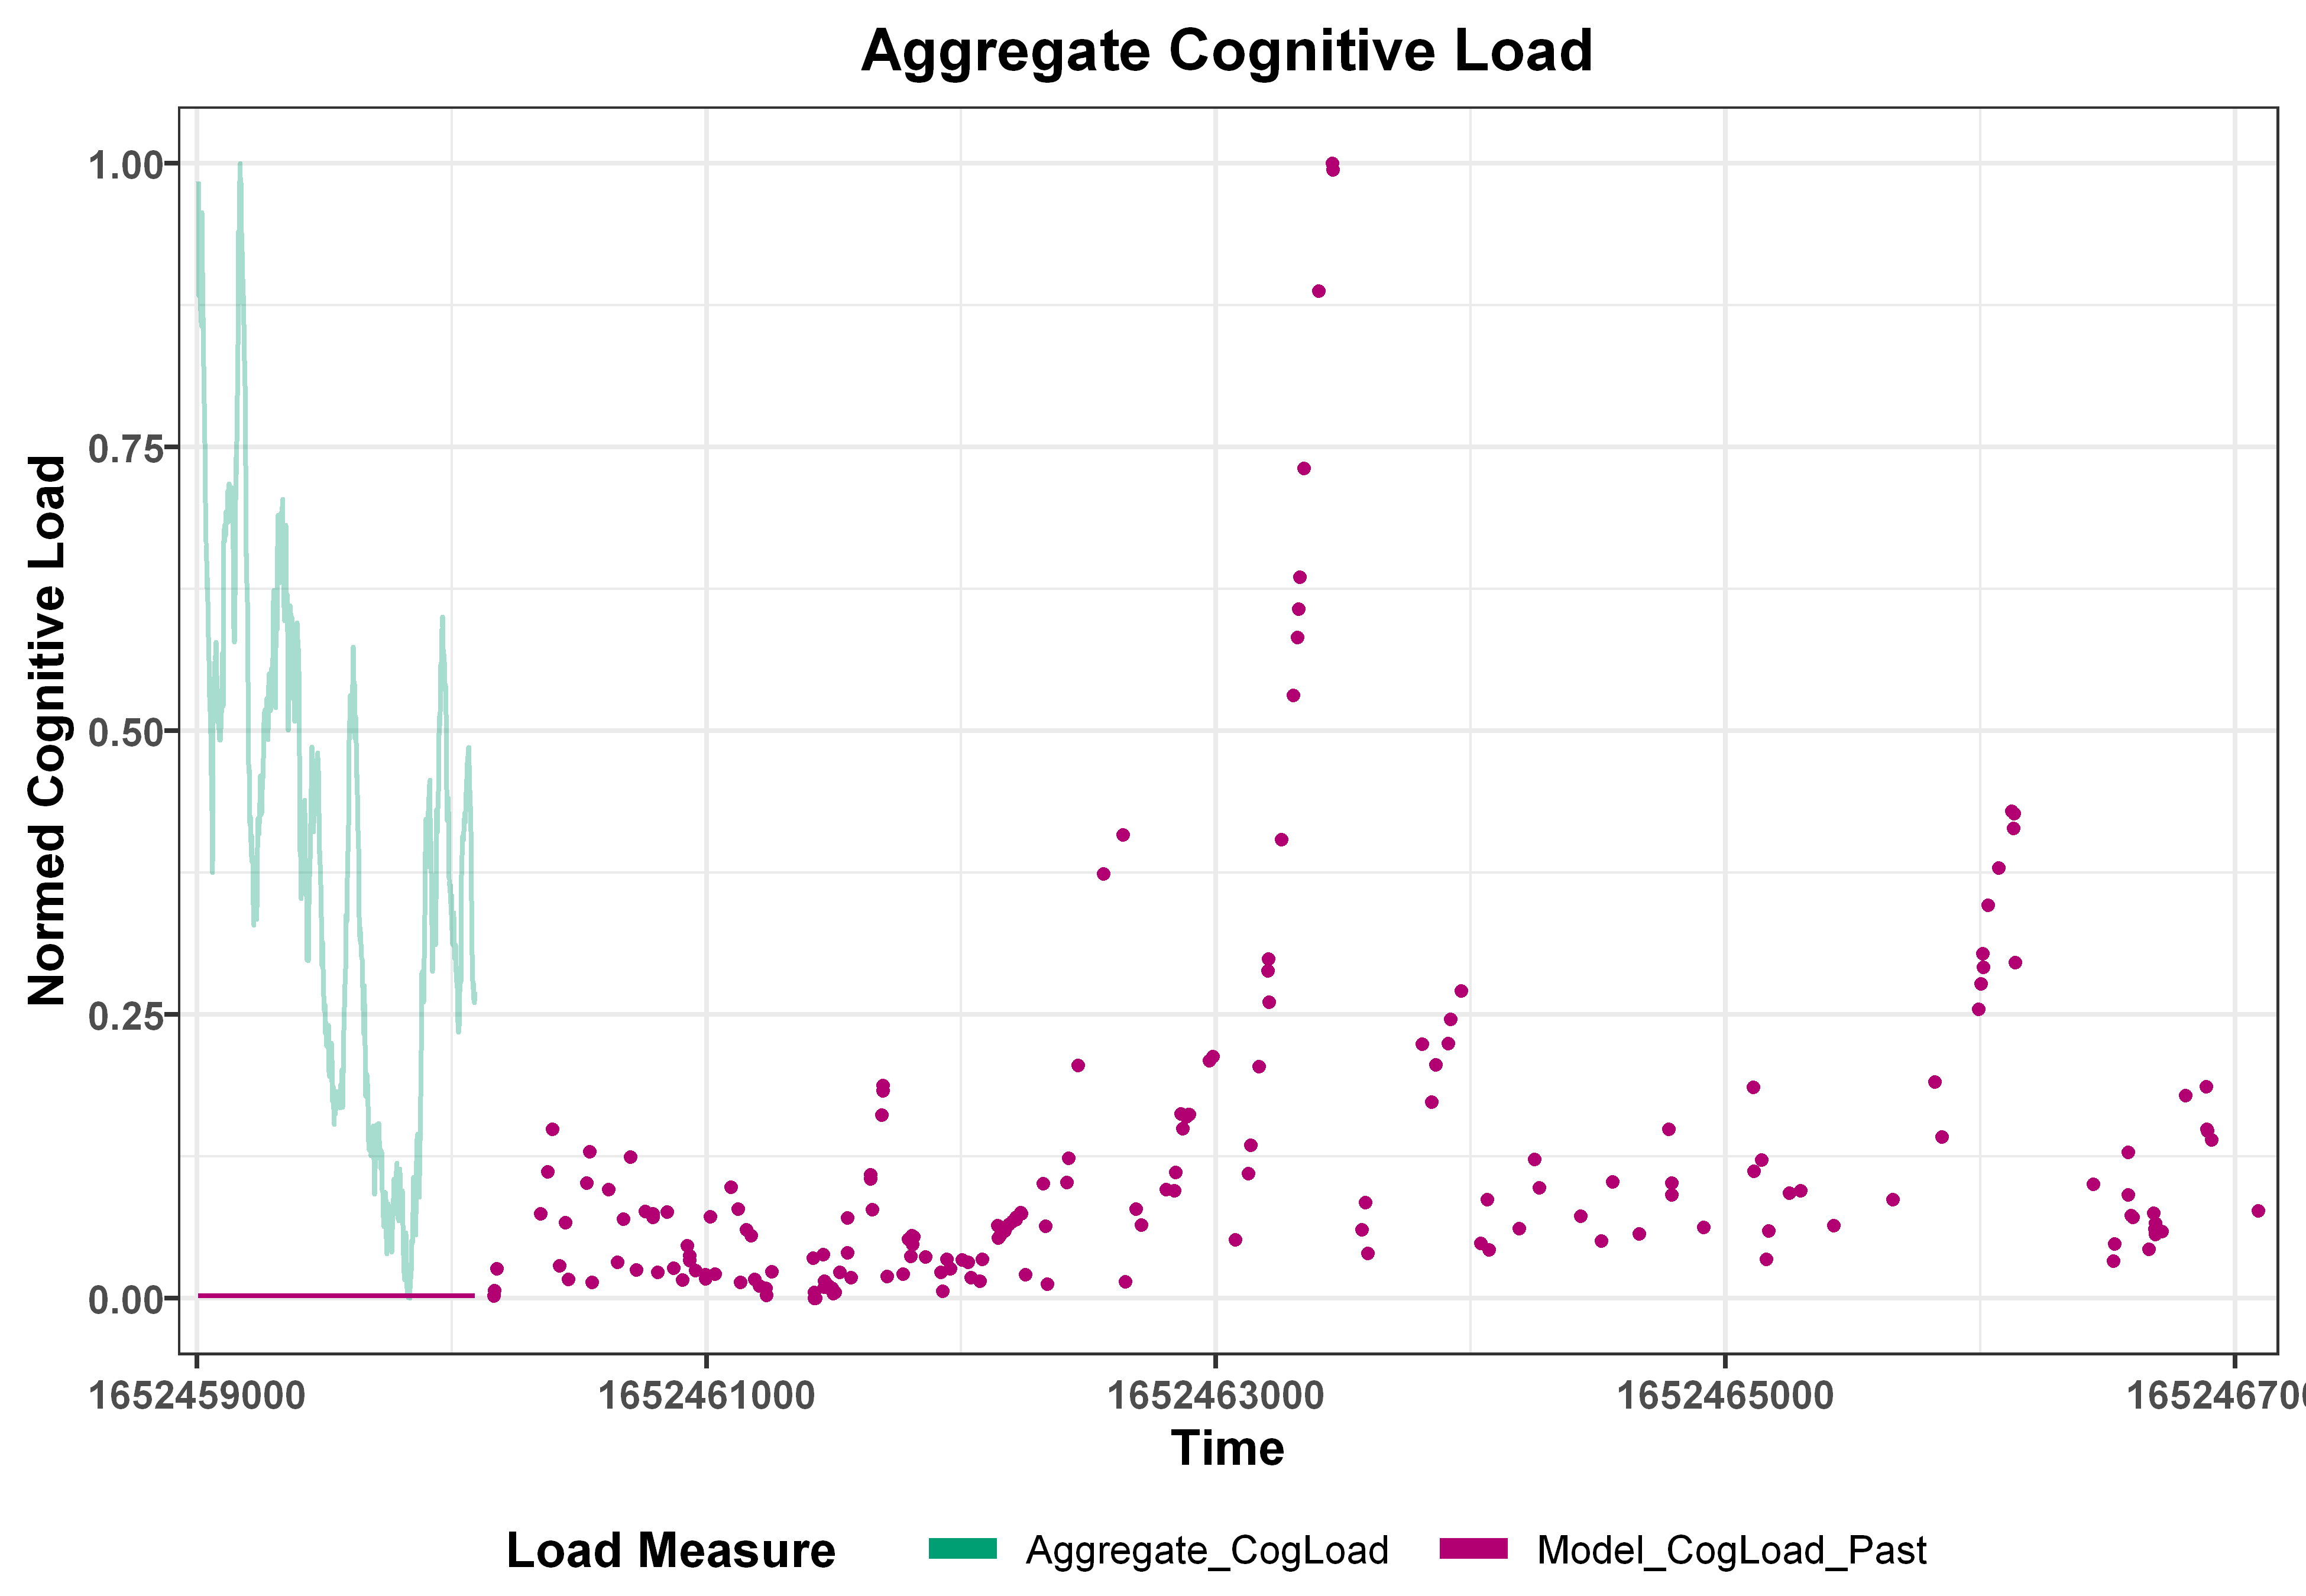

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 003    0.1883163              0.2259852              -0.130577               
  Engagement_r_Past_interp
1 -0.1300053

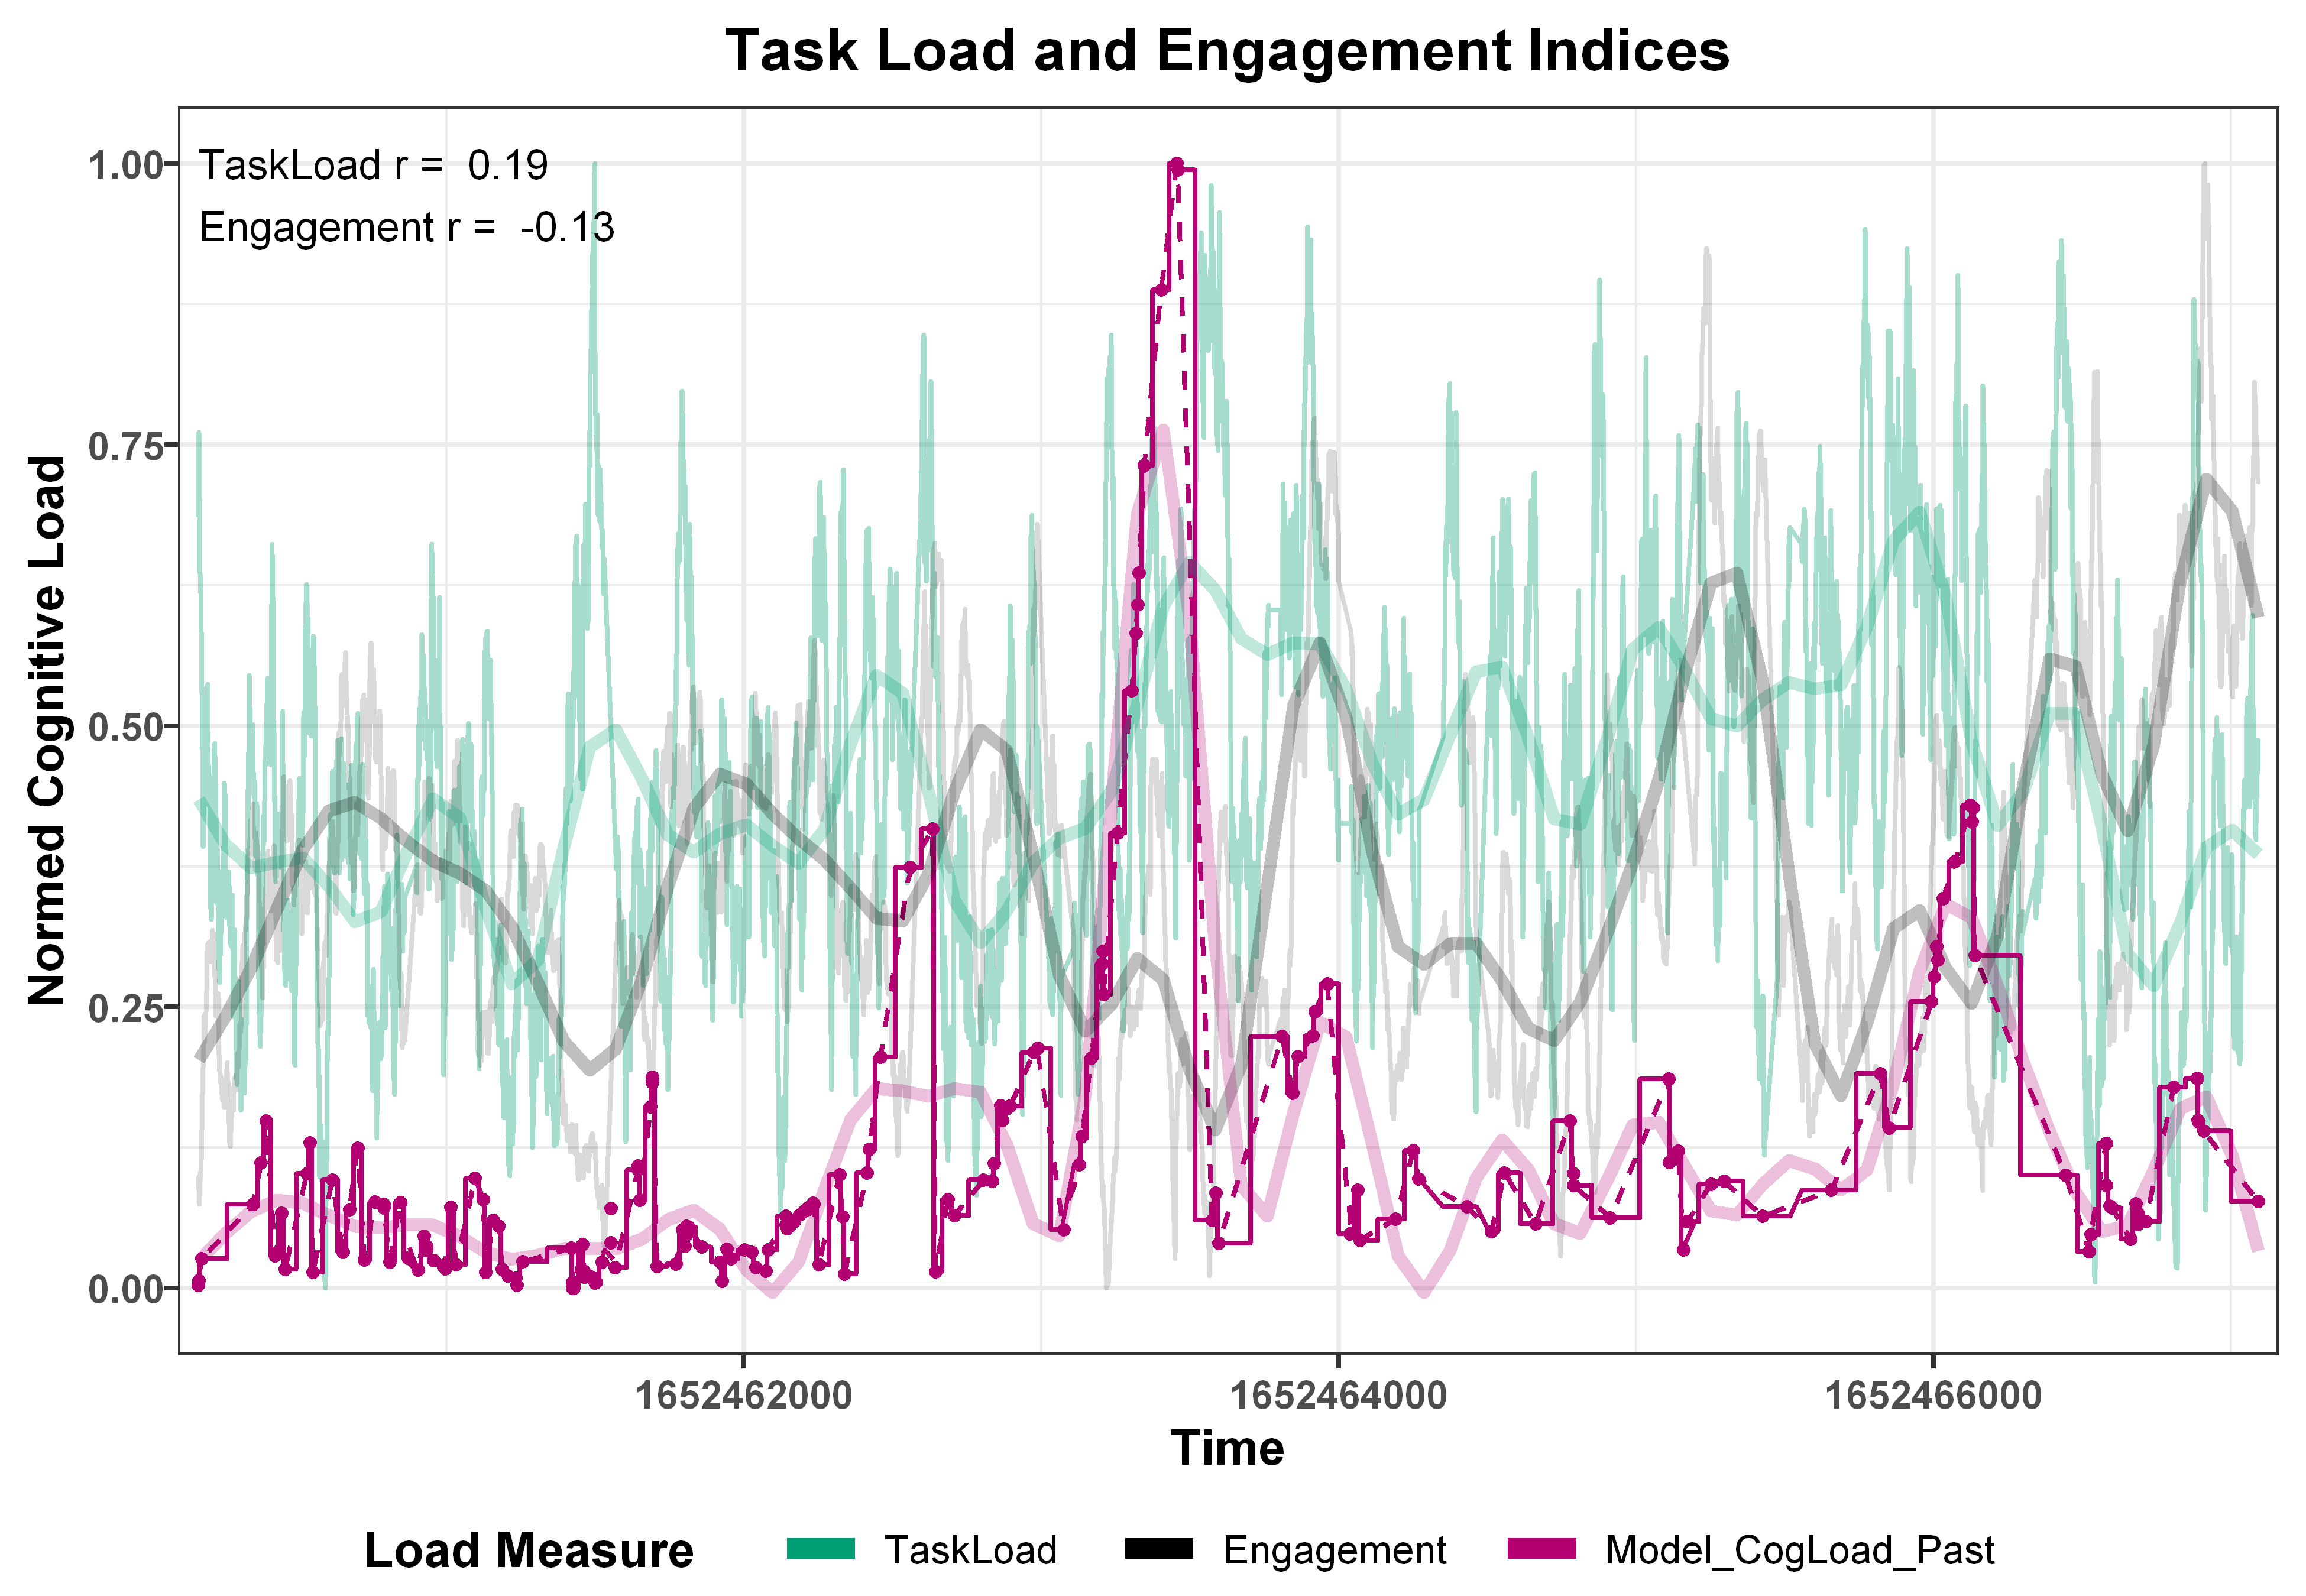

In [9]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_003, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_003 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_003, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
#cogload_data <- subset(cogload_data, Time>=min(model_data_003$Time) & Time<=max(model_data_003$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_003, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_003$Time) & Time<=max(model_data_003$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_003 <- data

load_corrs_003 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_003 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_003$r_Past_rolled[1],2)), hjust = 0, size=3)
load_003

load_corrs_003

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_003 <- data

eng_corrs_003 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_003 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_003$TaskLoad_r_Past_rolled[1],2)), hjust = 0, size=3) +
                annotate("text", x = min(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_003$Engagement_r_Past_rolled[1],2)), hjust = 0, size=3)

eng_003

eng_corrs_003

# Subject 004

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r         
1 004    -0.3654848

Warning message:
"Removed 25 row(s) containing missing values (geom_path)."
Warning message:
"Removed 27 rows containing missing values (geom_point)."


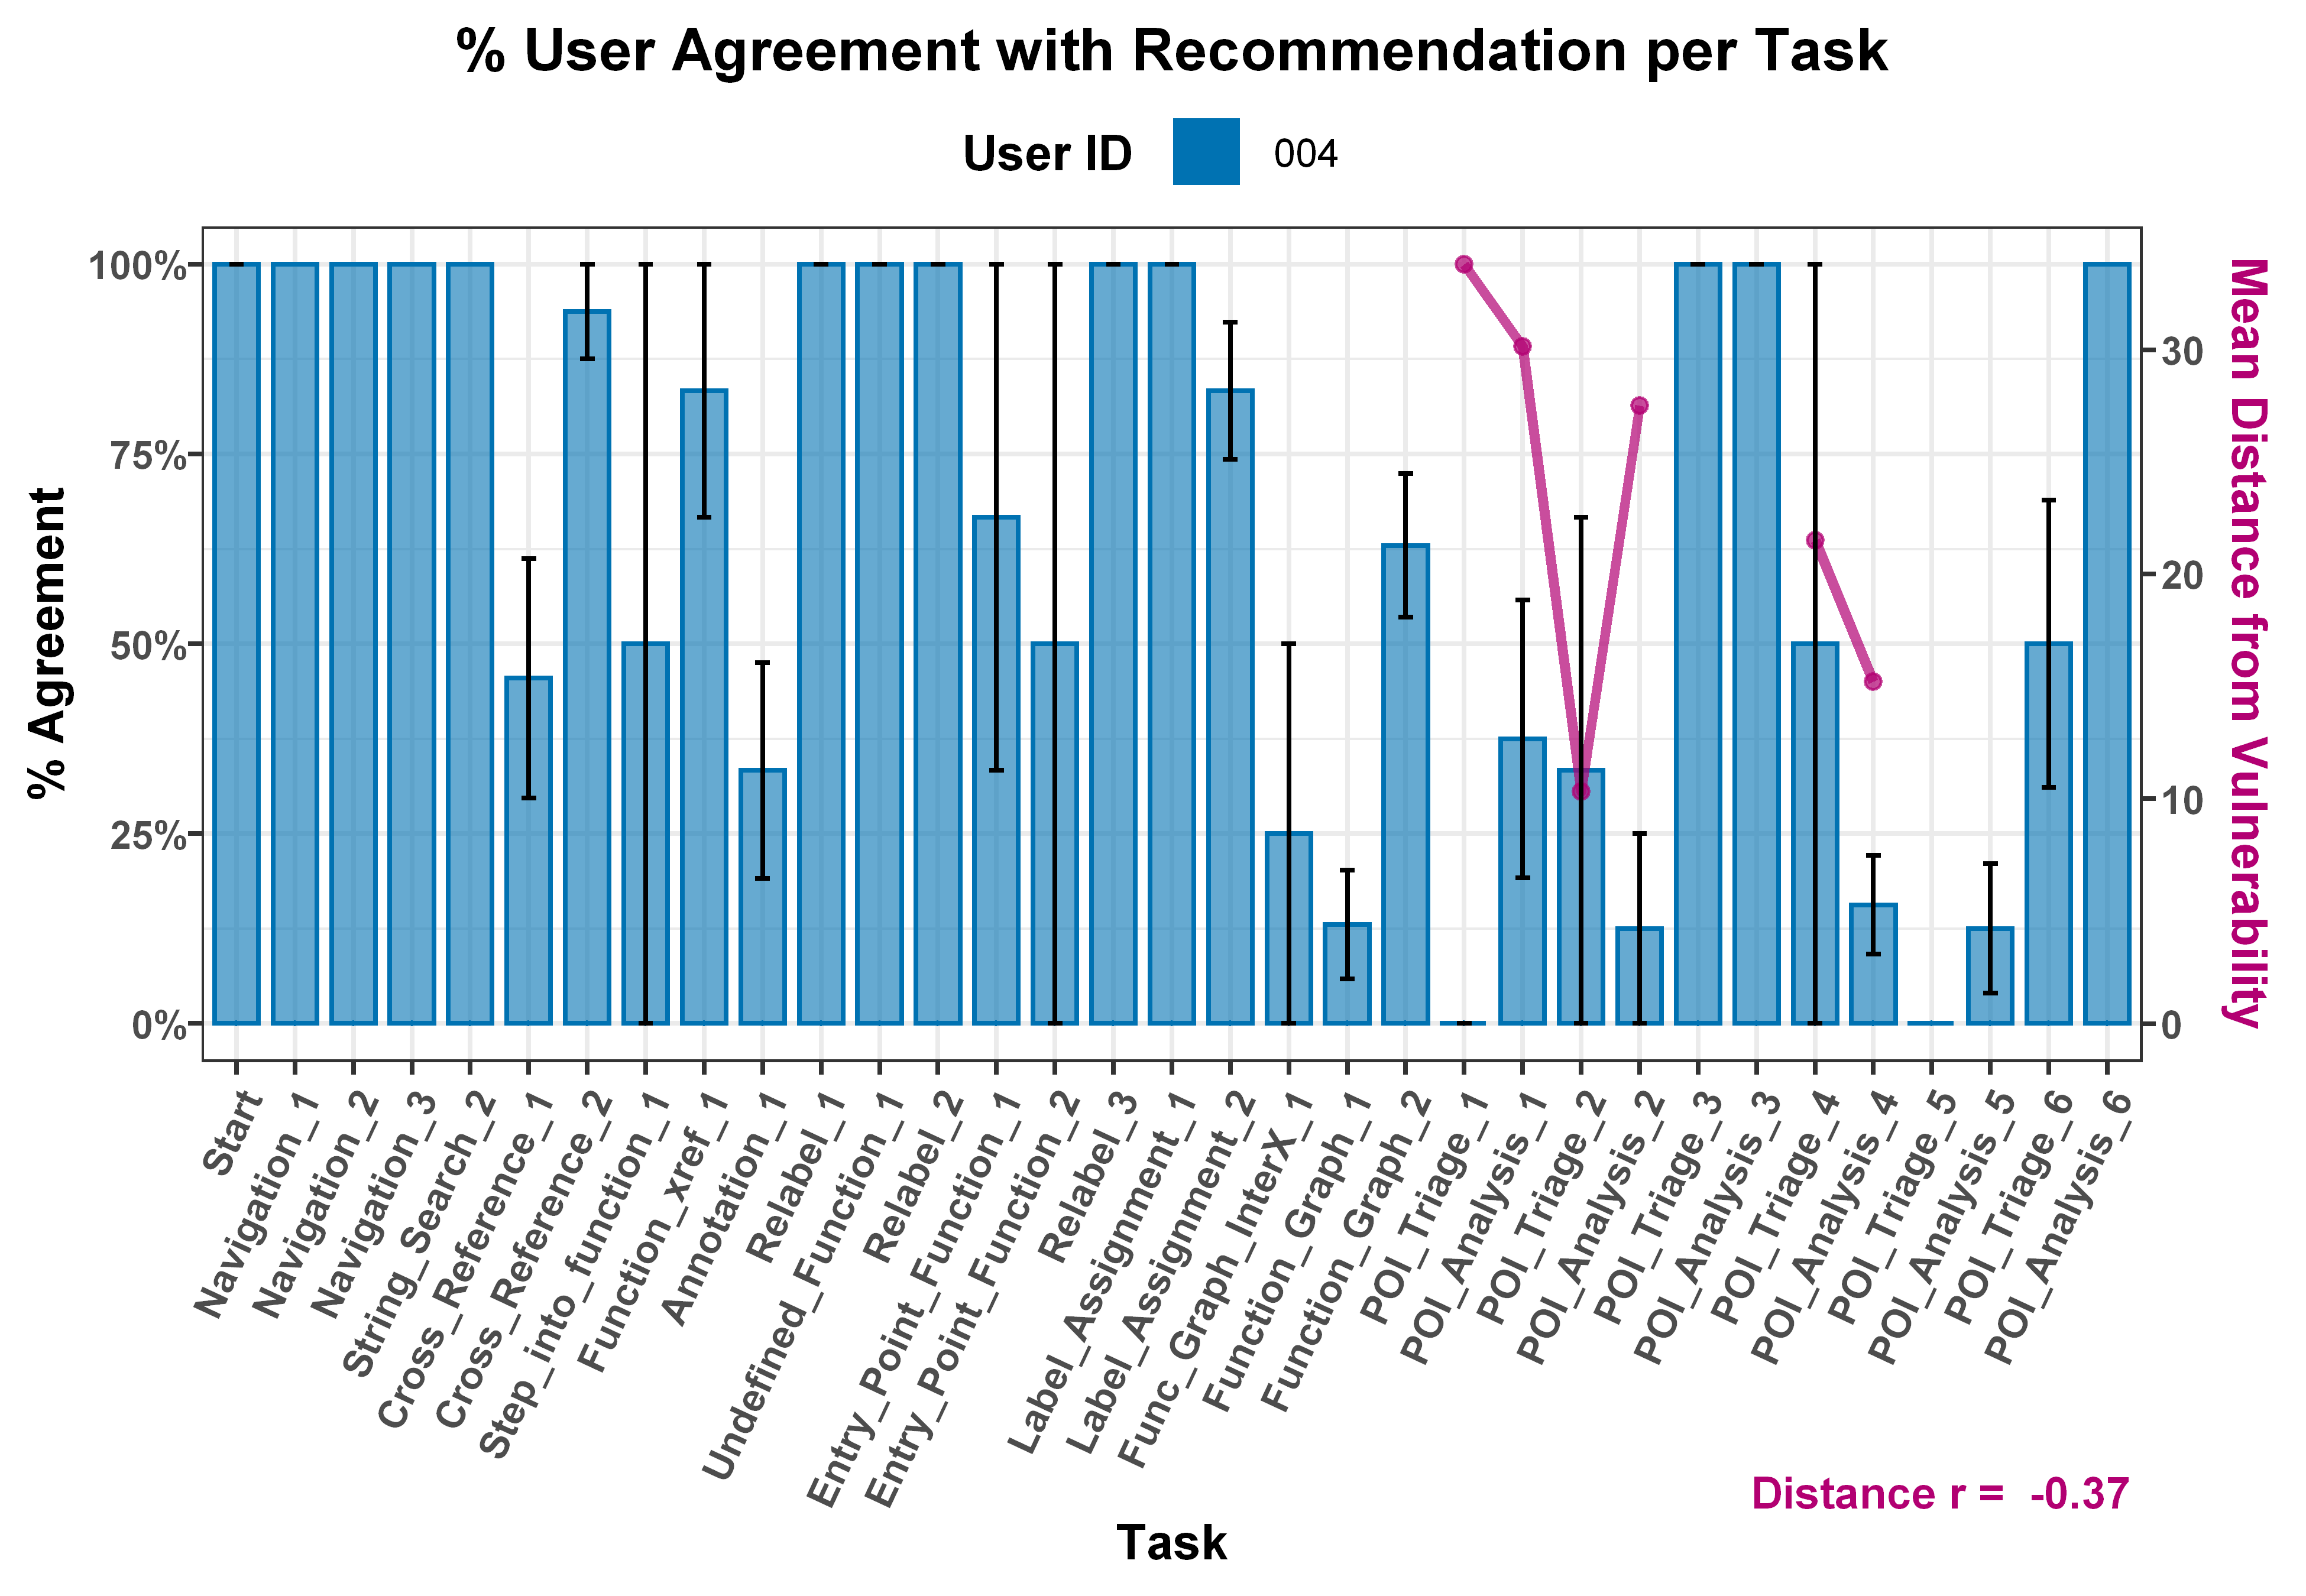

In [40]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_004, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_004, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_004 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_004 <- subset(data_004, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_004

agg_004 <- ggplot(data = data_004, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_004$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_004

UserID r_Past_rolled r_Past_interp
1 004    -0.1142379    -0.1300888

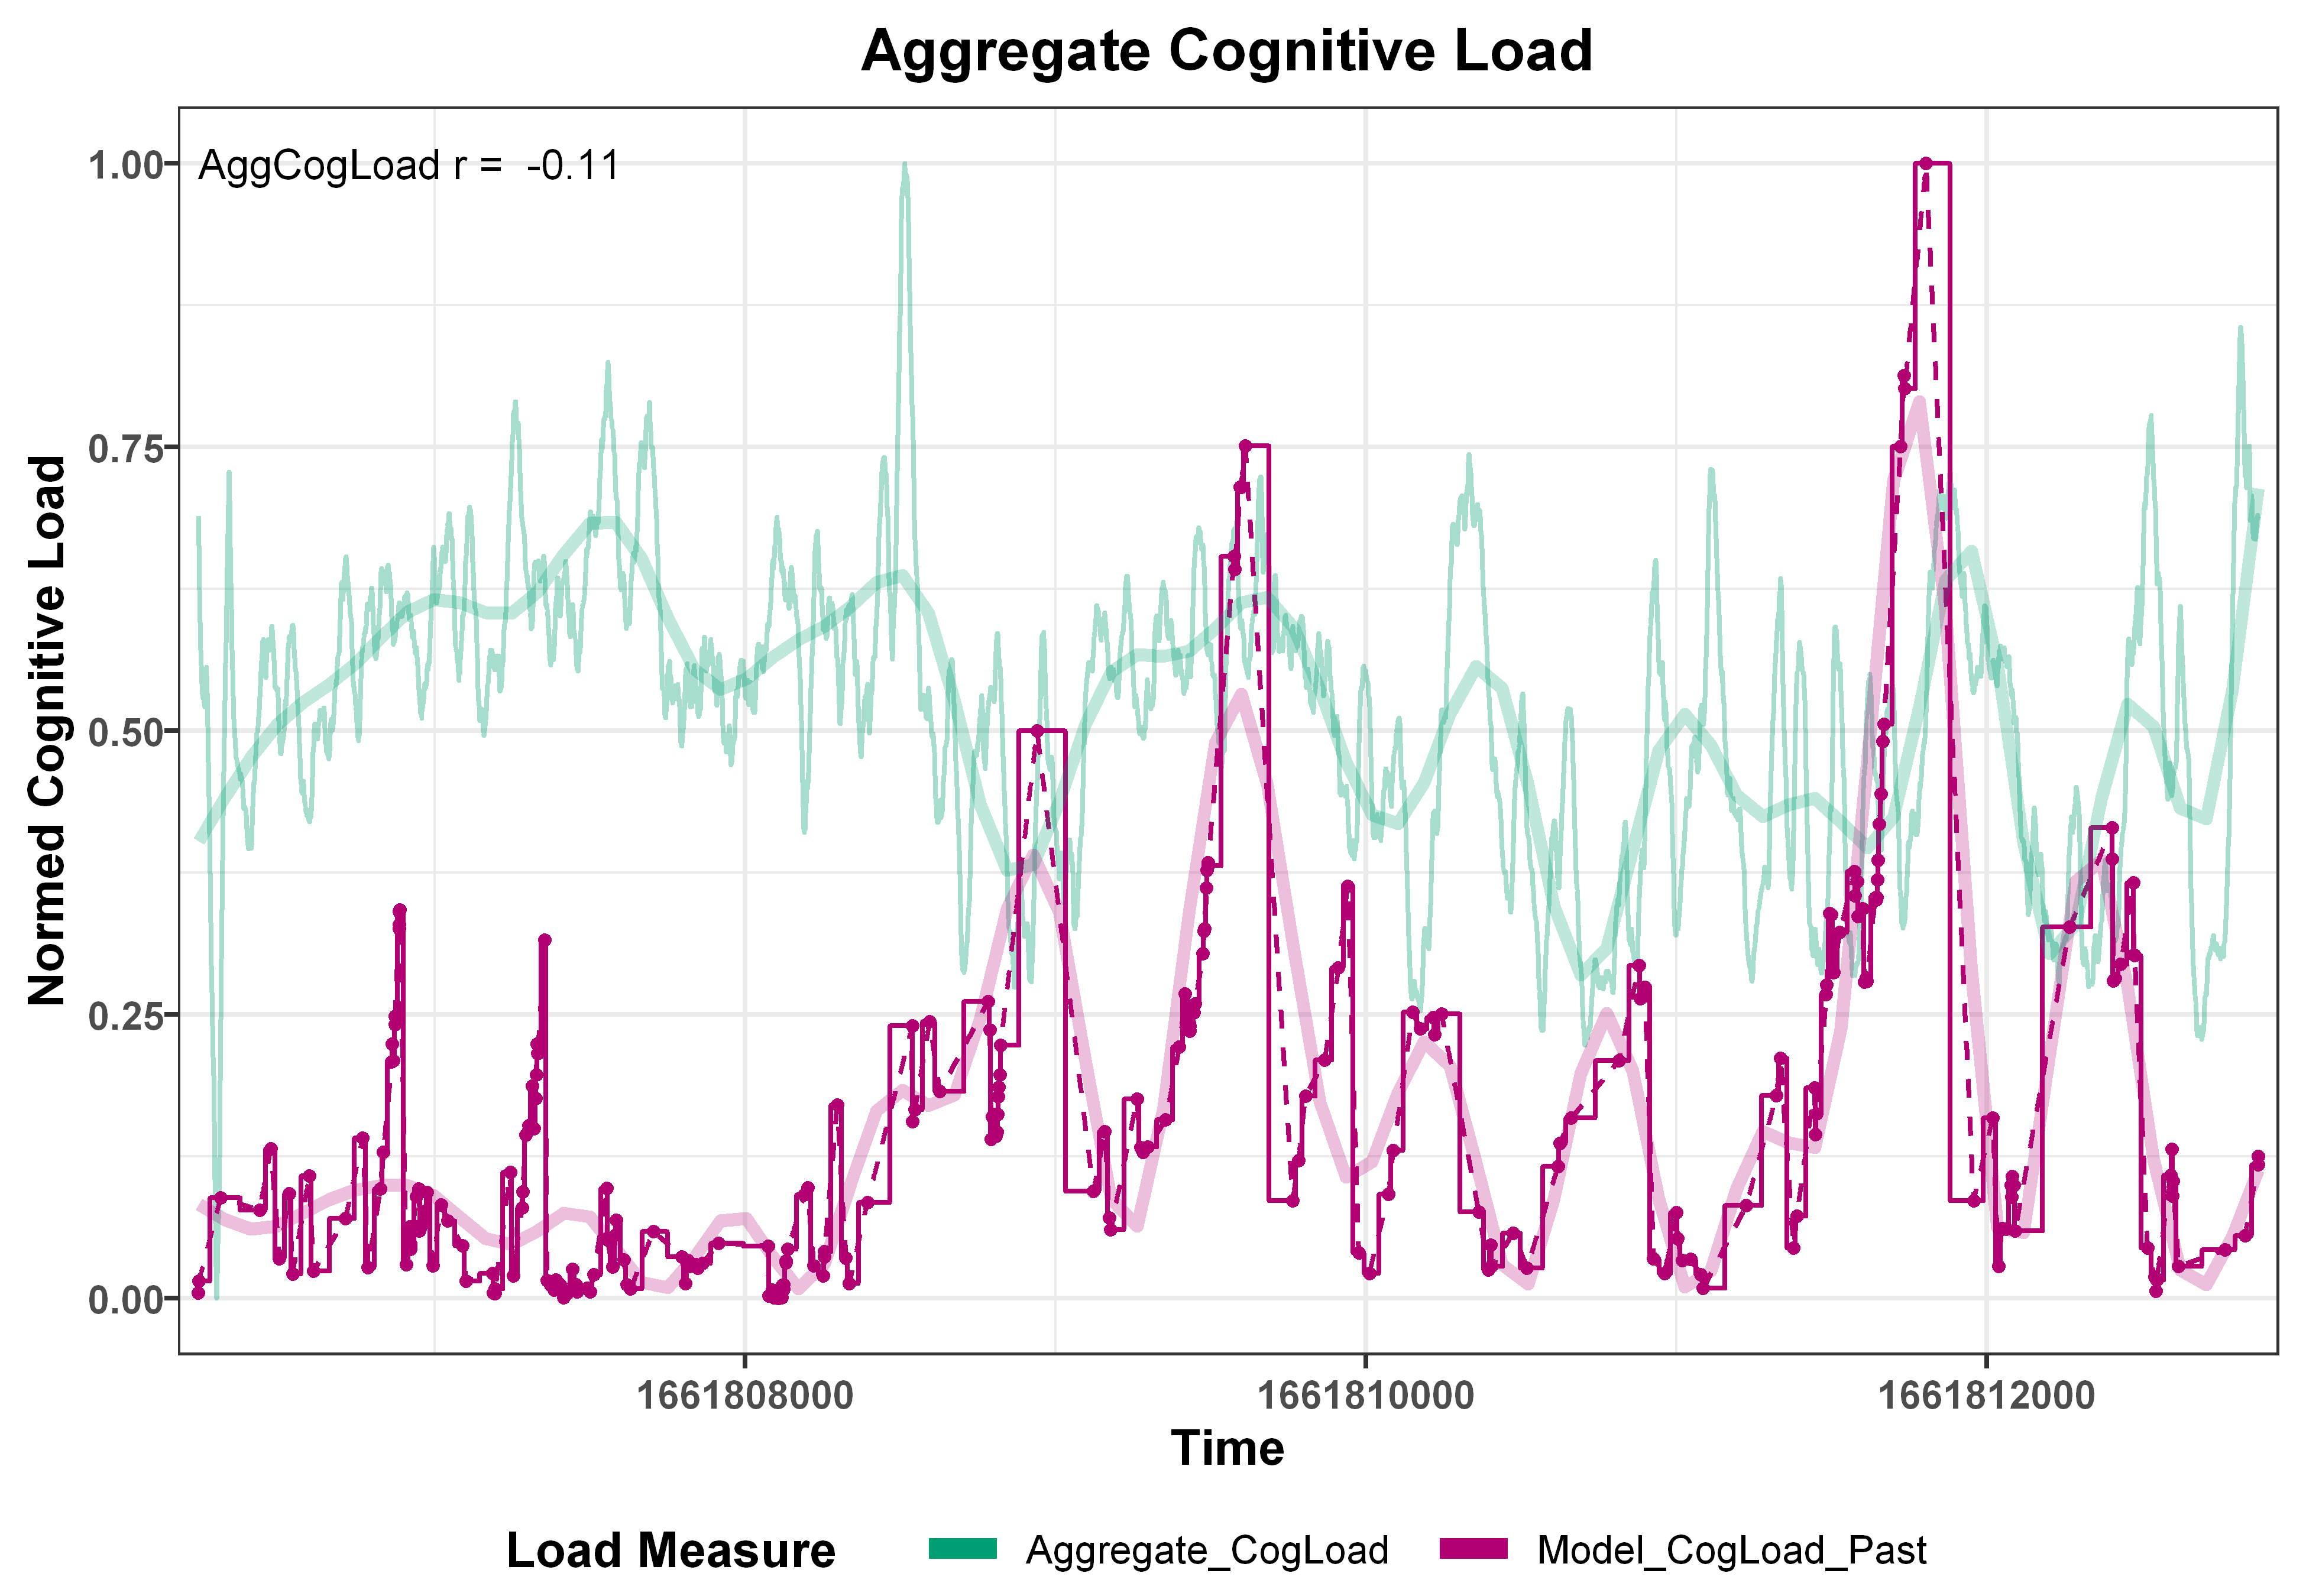

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 004    0.04850101             0.04922265             0.2068021               
  Engagement_r_Past_interp
1 0.2146044

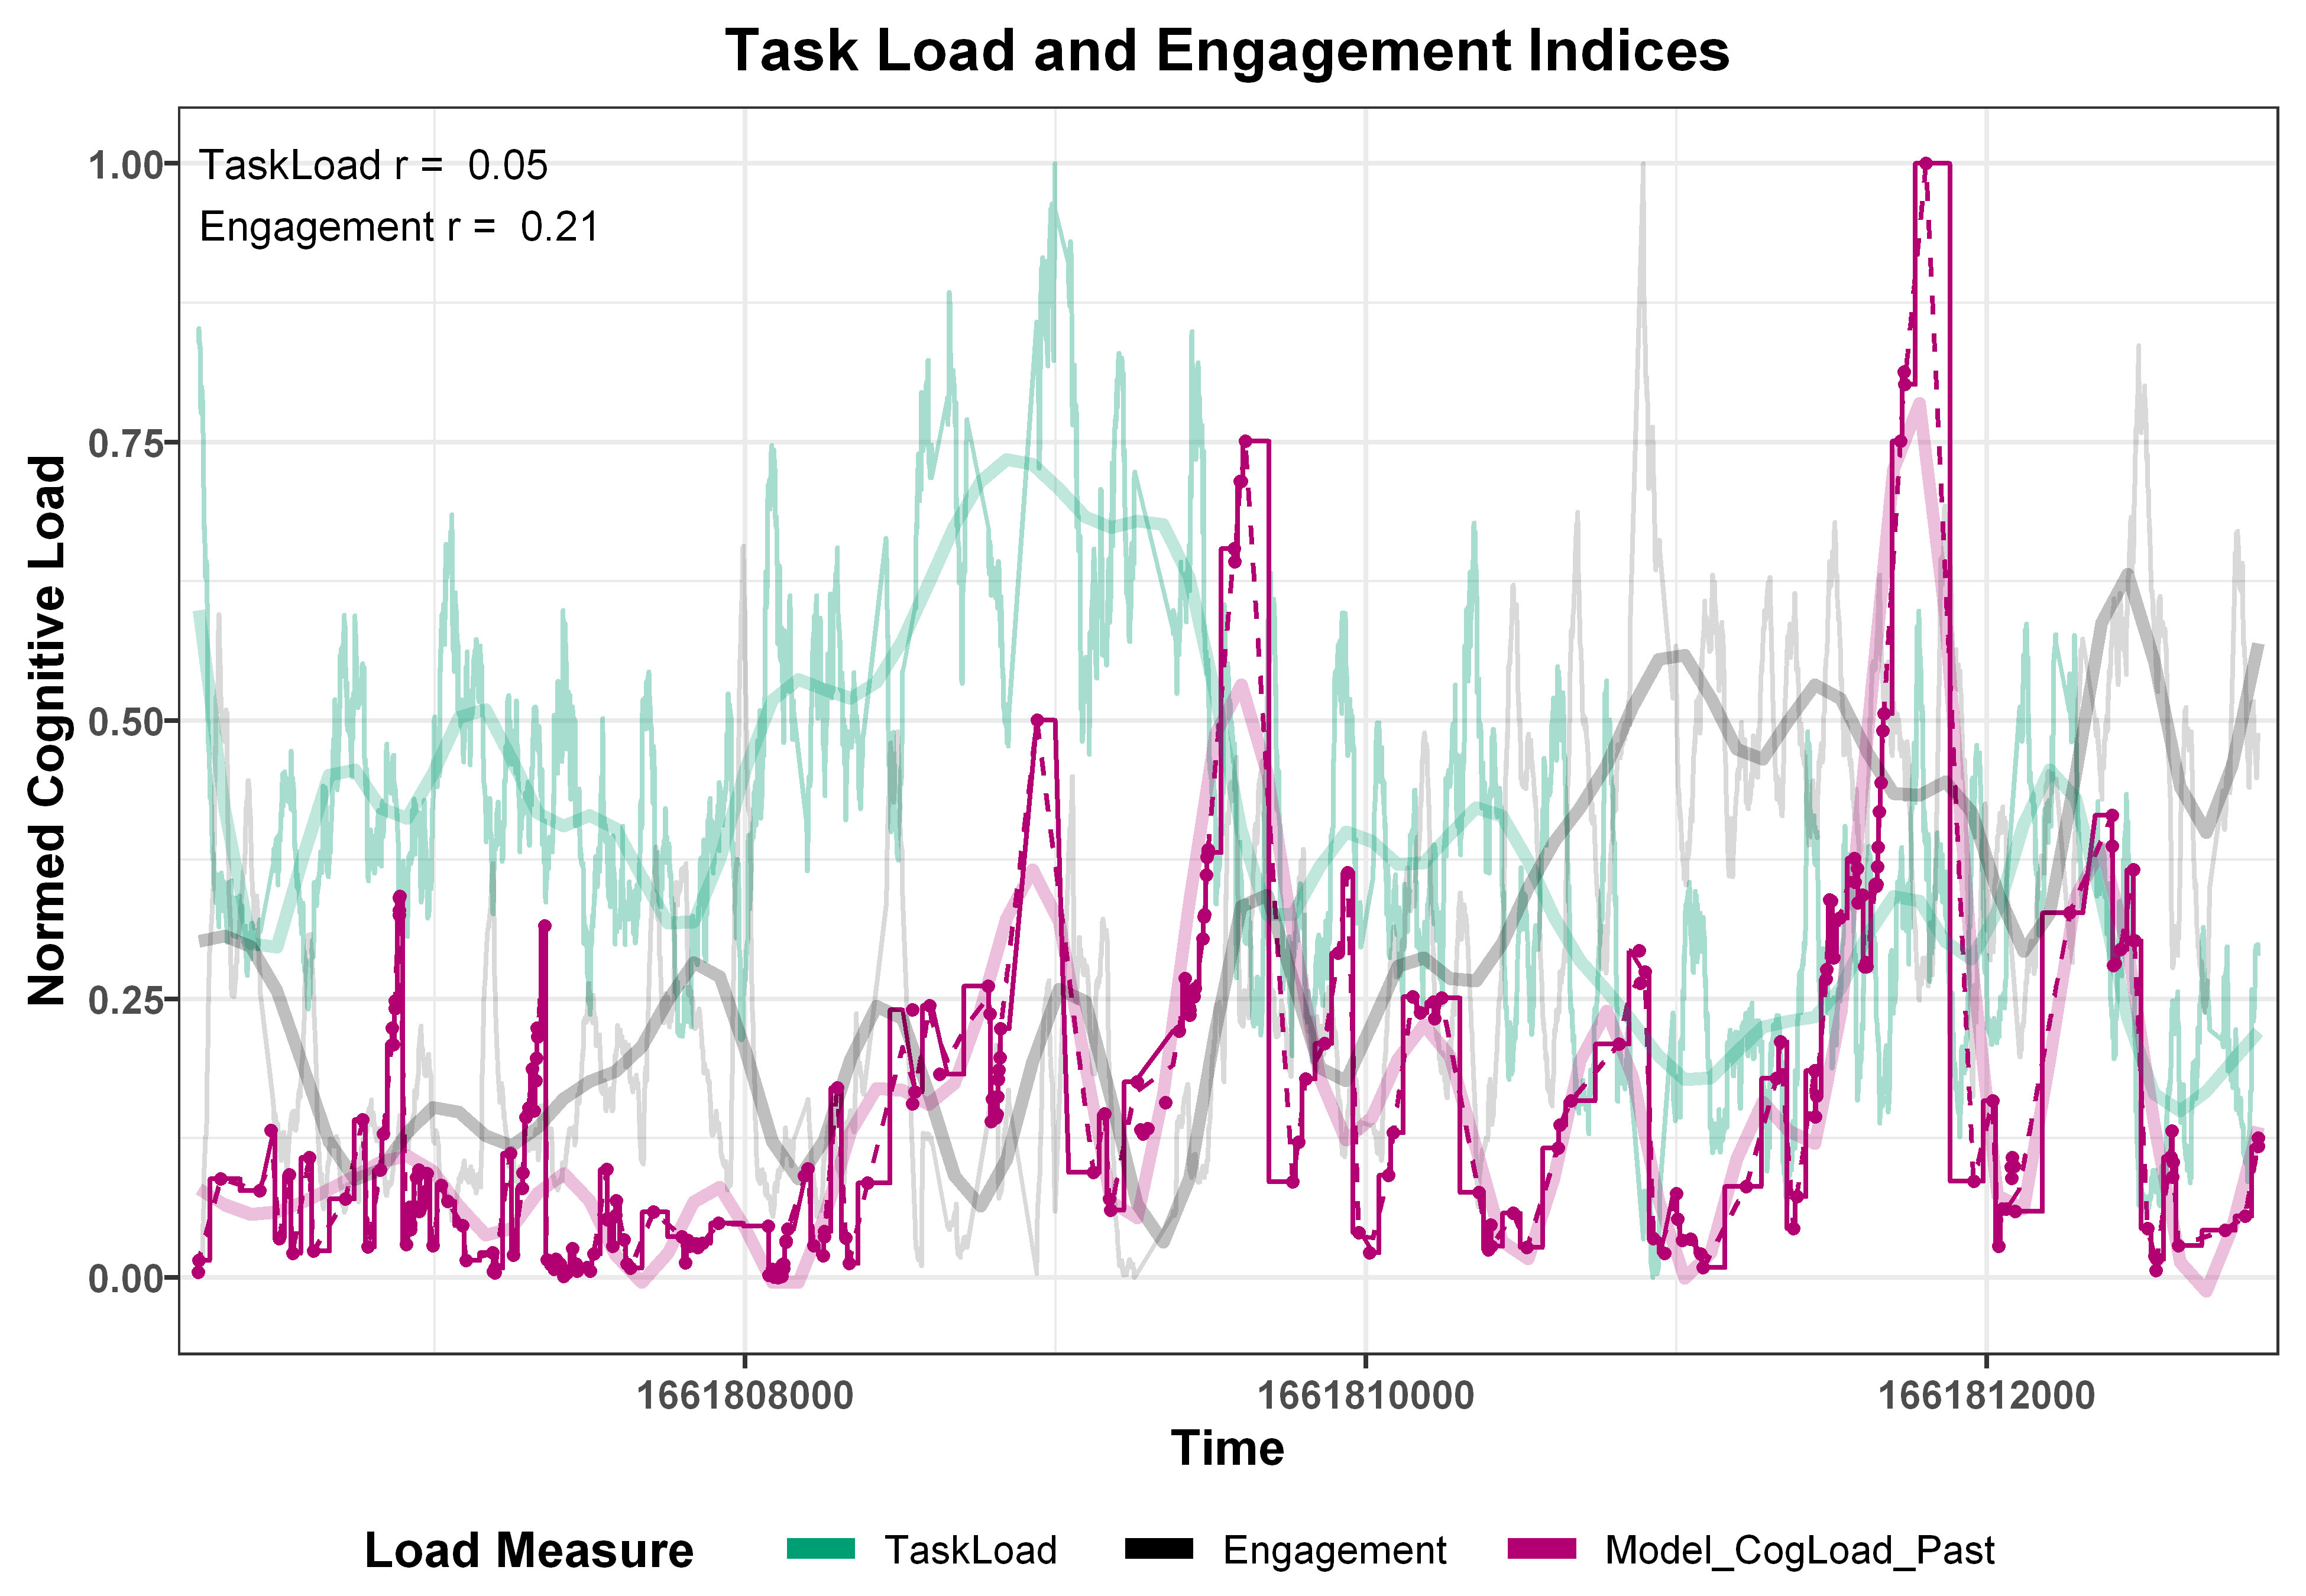

In [11]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_004, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_004 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_004, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
cogload_data <- subset(cogload_data, Time>=min(model_data_004$Time) & Time<=max(model_data_004$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_004, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_004$Time) & Time<=max(model_data_004$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_004 <- data

load_corrs_004 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_004 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_004$r_Past_rolled[1],2)), hjust = 0, size=3)
load_004

load_corrs_004

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_004 <- data

eng_corrs_004 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_004 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_004$TaskLoad_r_Past_rolled[1],2)), hjust = 0, size=3) +
                annotate("text", x = min(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_004$Engagement_r_Past_rolled[1],2)), hjust = 0, size=3)

eng_004

eng_corrs_004

# Subject 005

The following `from` values were not present in `x`: Point_of_Interest_Triage_5

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r          
1 005    -0.04539383

Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 26 rows containing missing values (geom_point)."


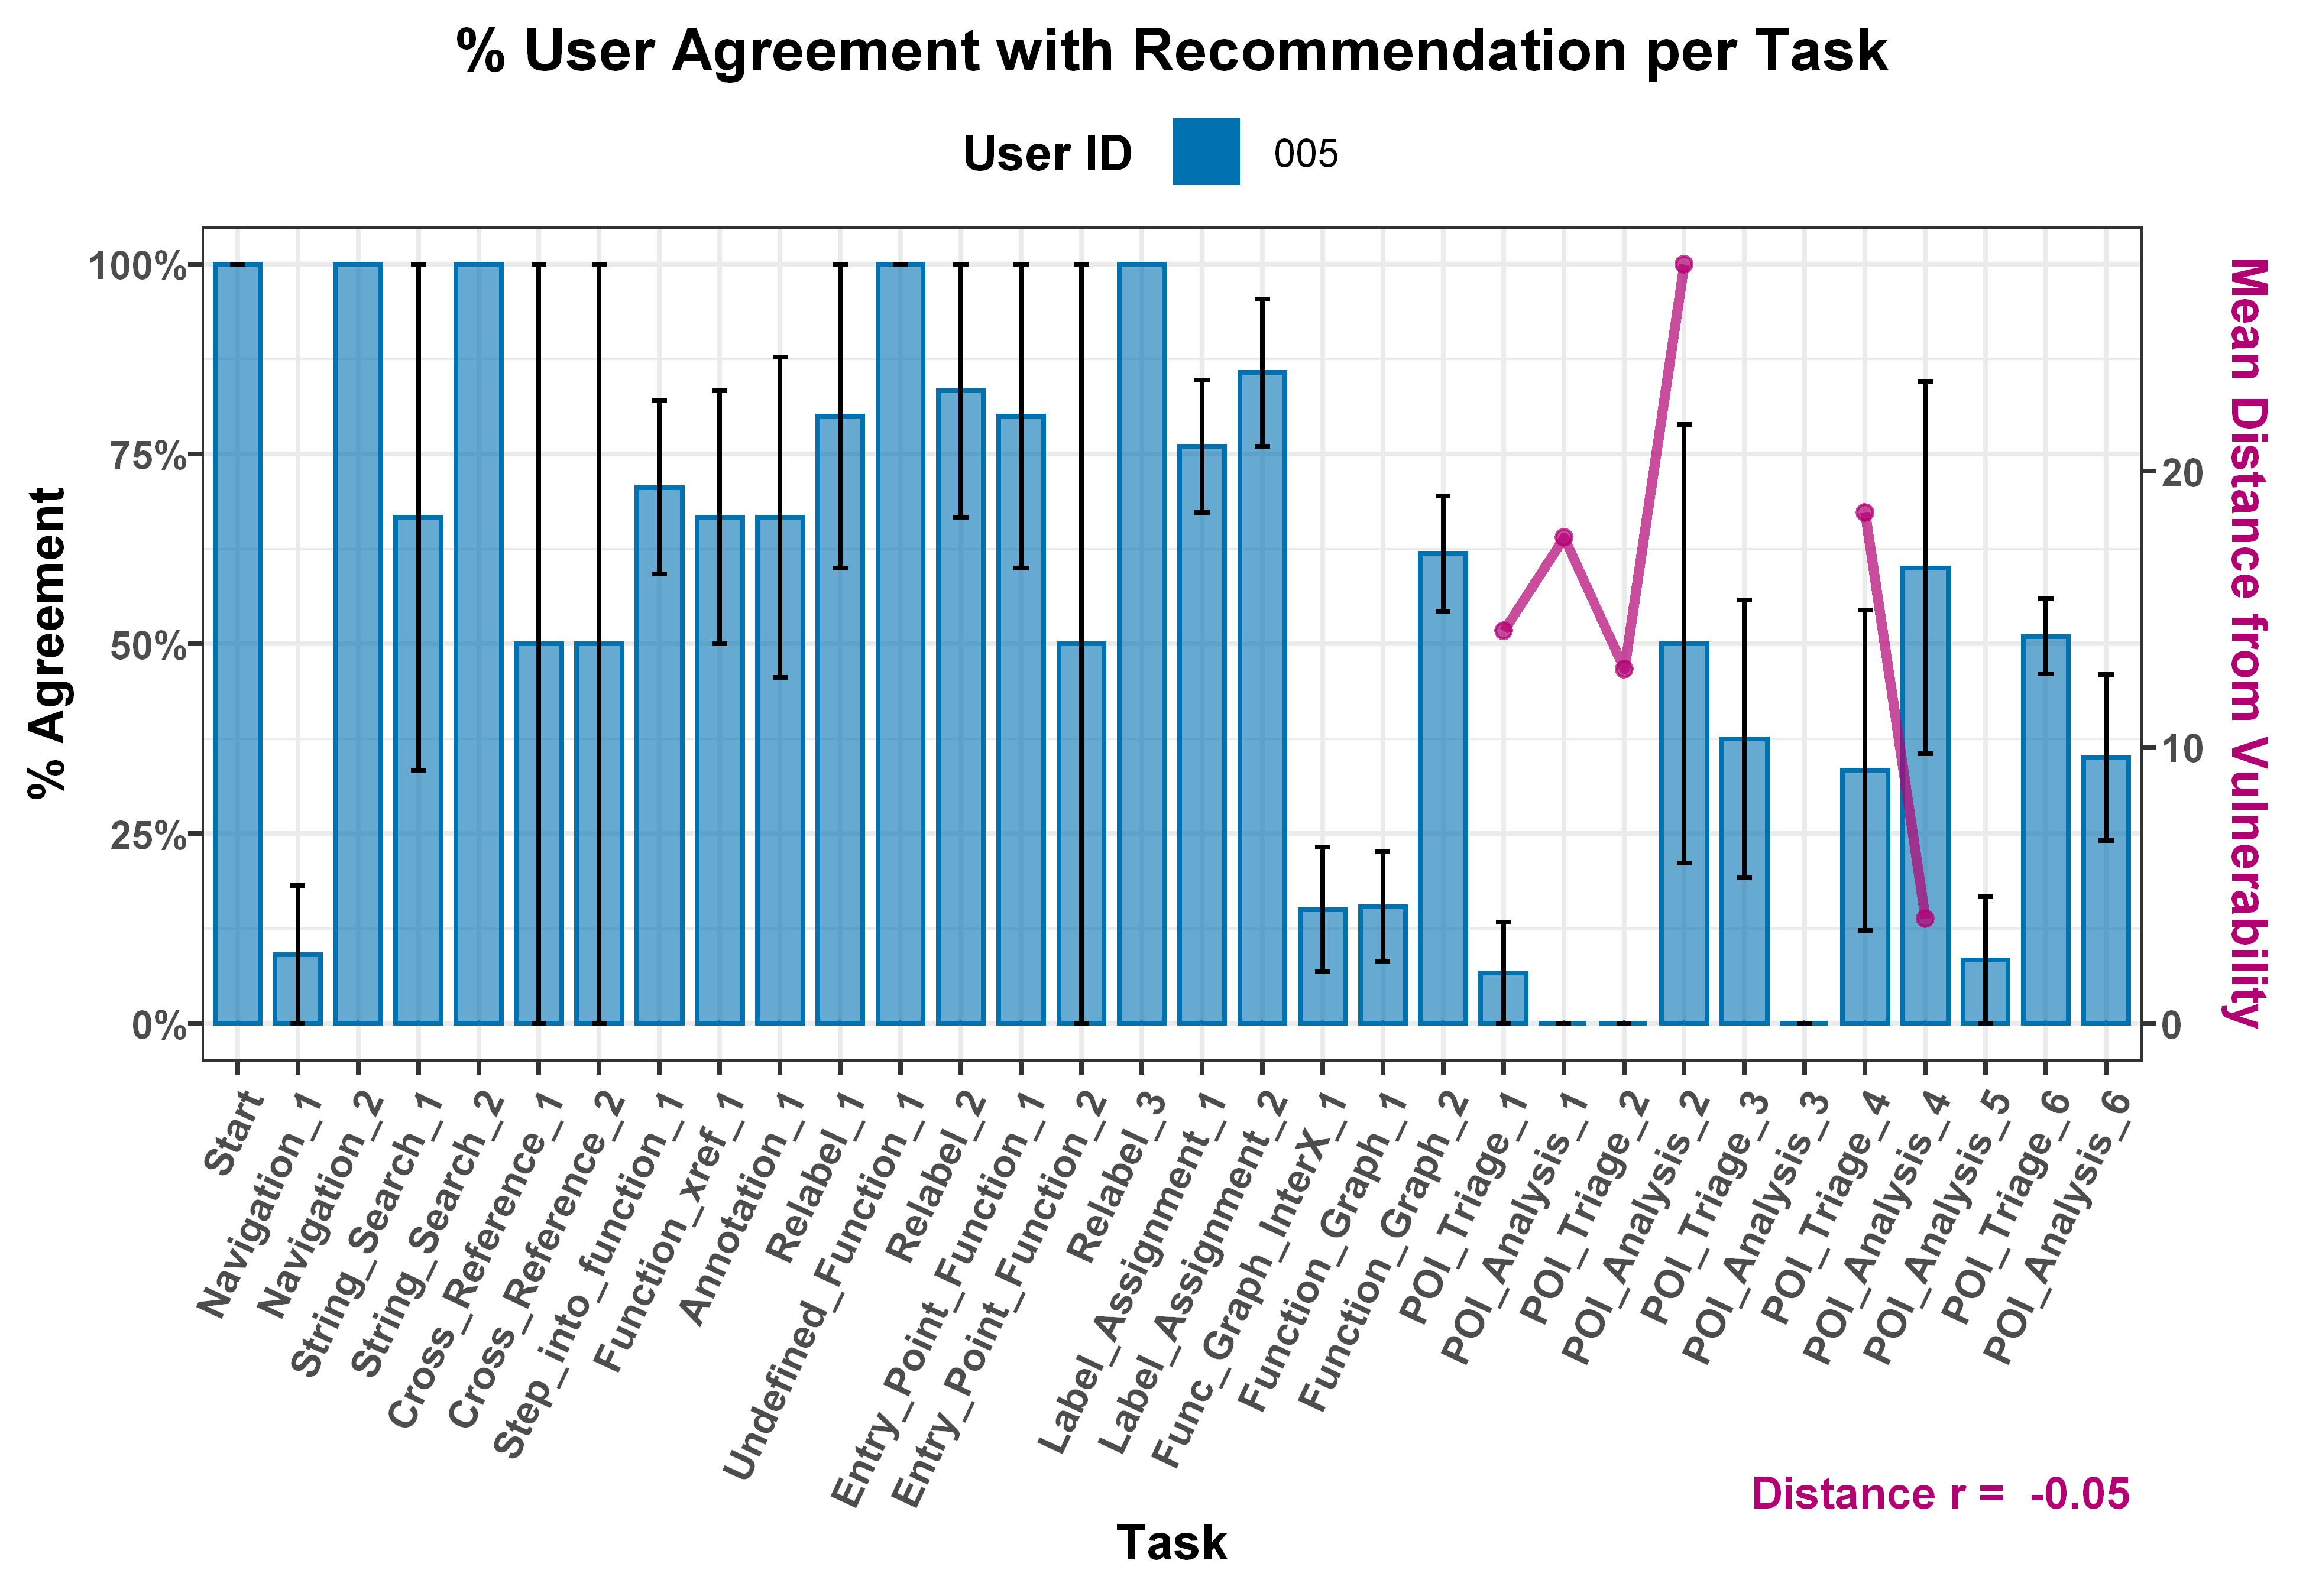

In [41]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_005, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_005, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_005 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_005 <- subset(data_005, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_005

agg_005 <- ggplot(data = data_005, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_005$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_005

UserID r_Past_rolled r_Past_interp
1 005    -0.2448029    -0.2606922

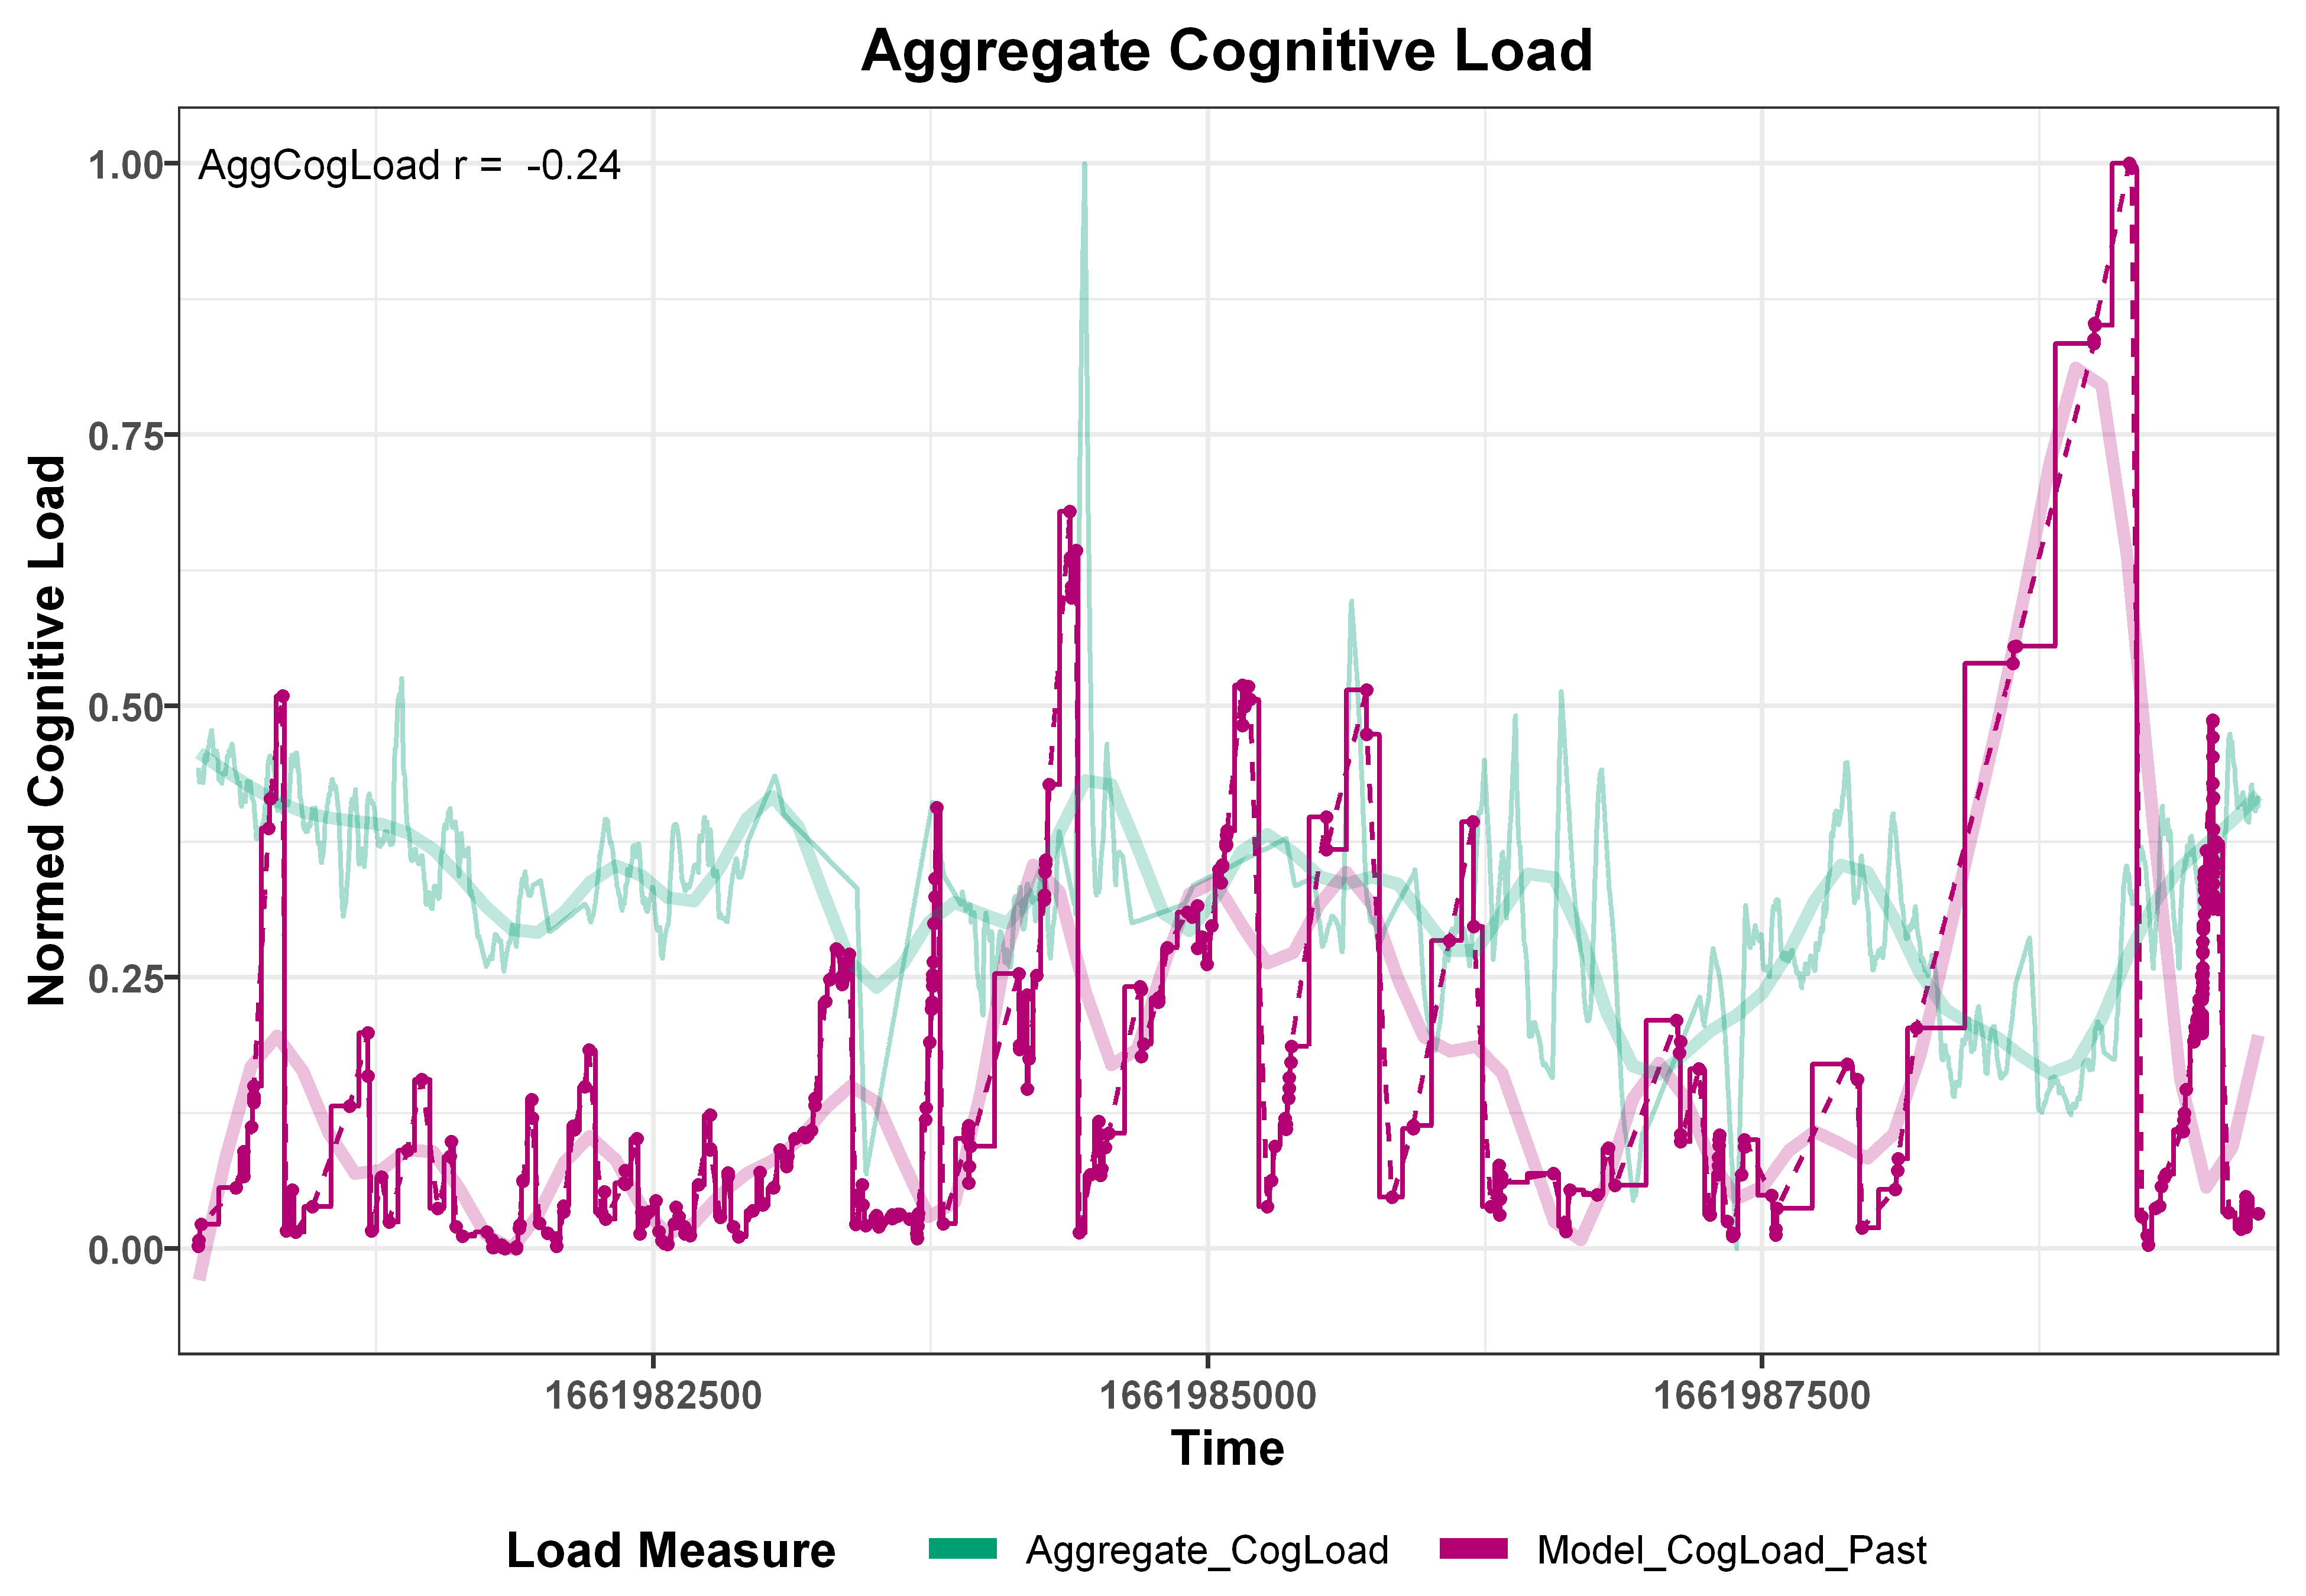

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 005    0.1929641              0.1952253              0.02498484              
  Engagement_r_Past_interp
1 0.02405609

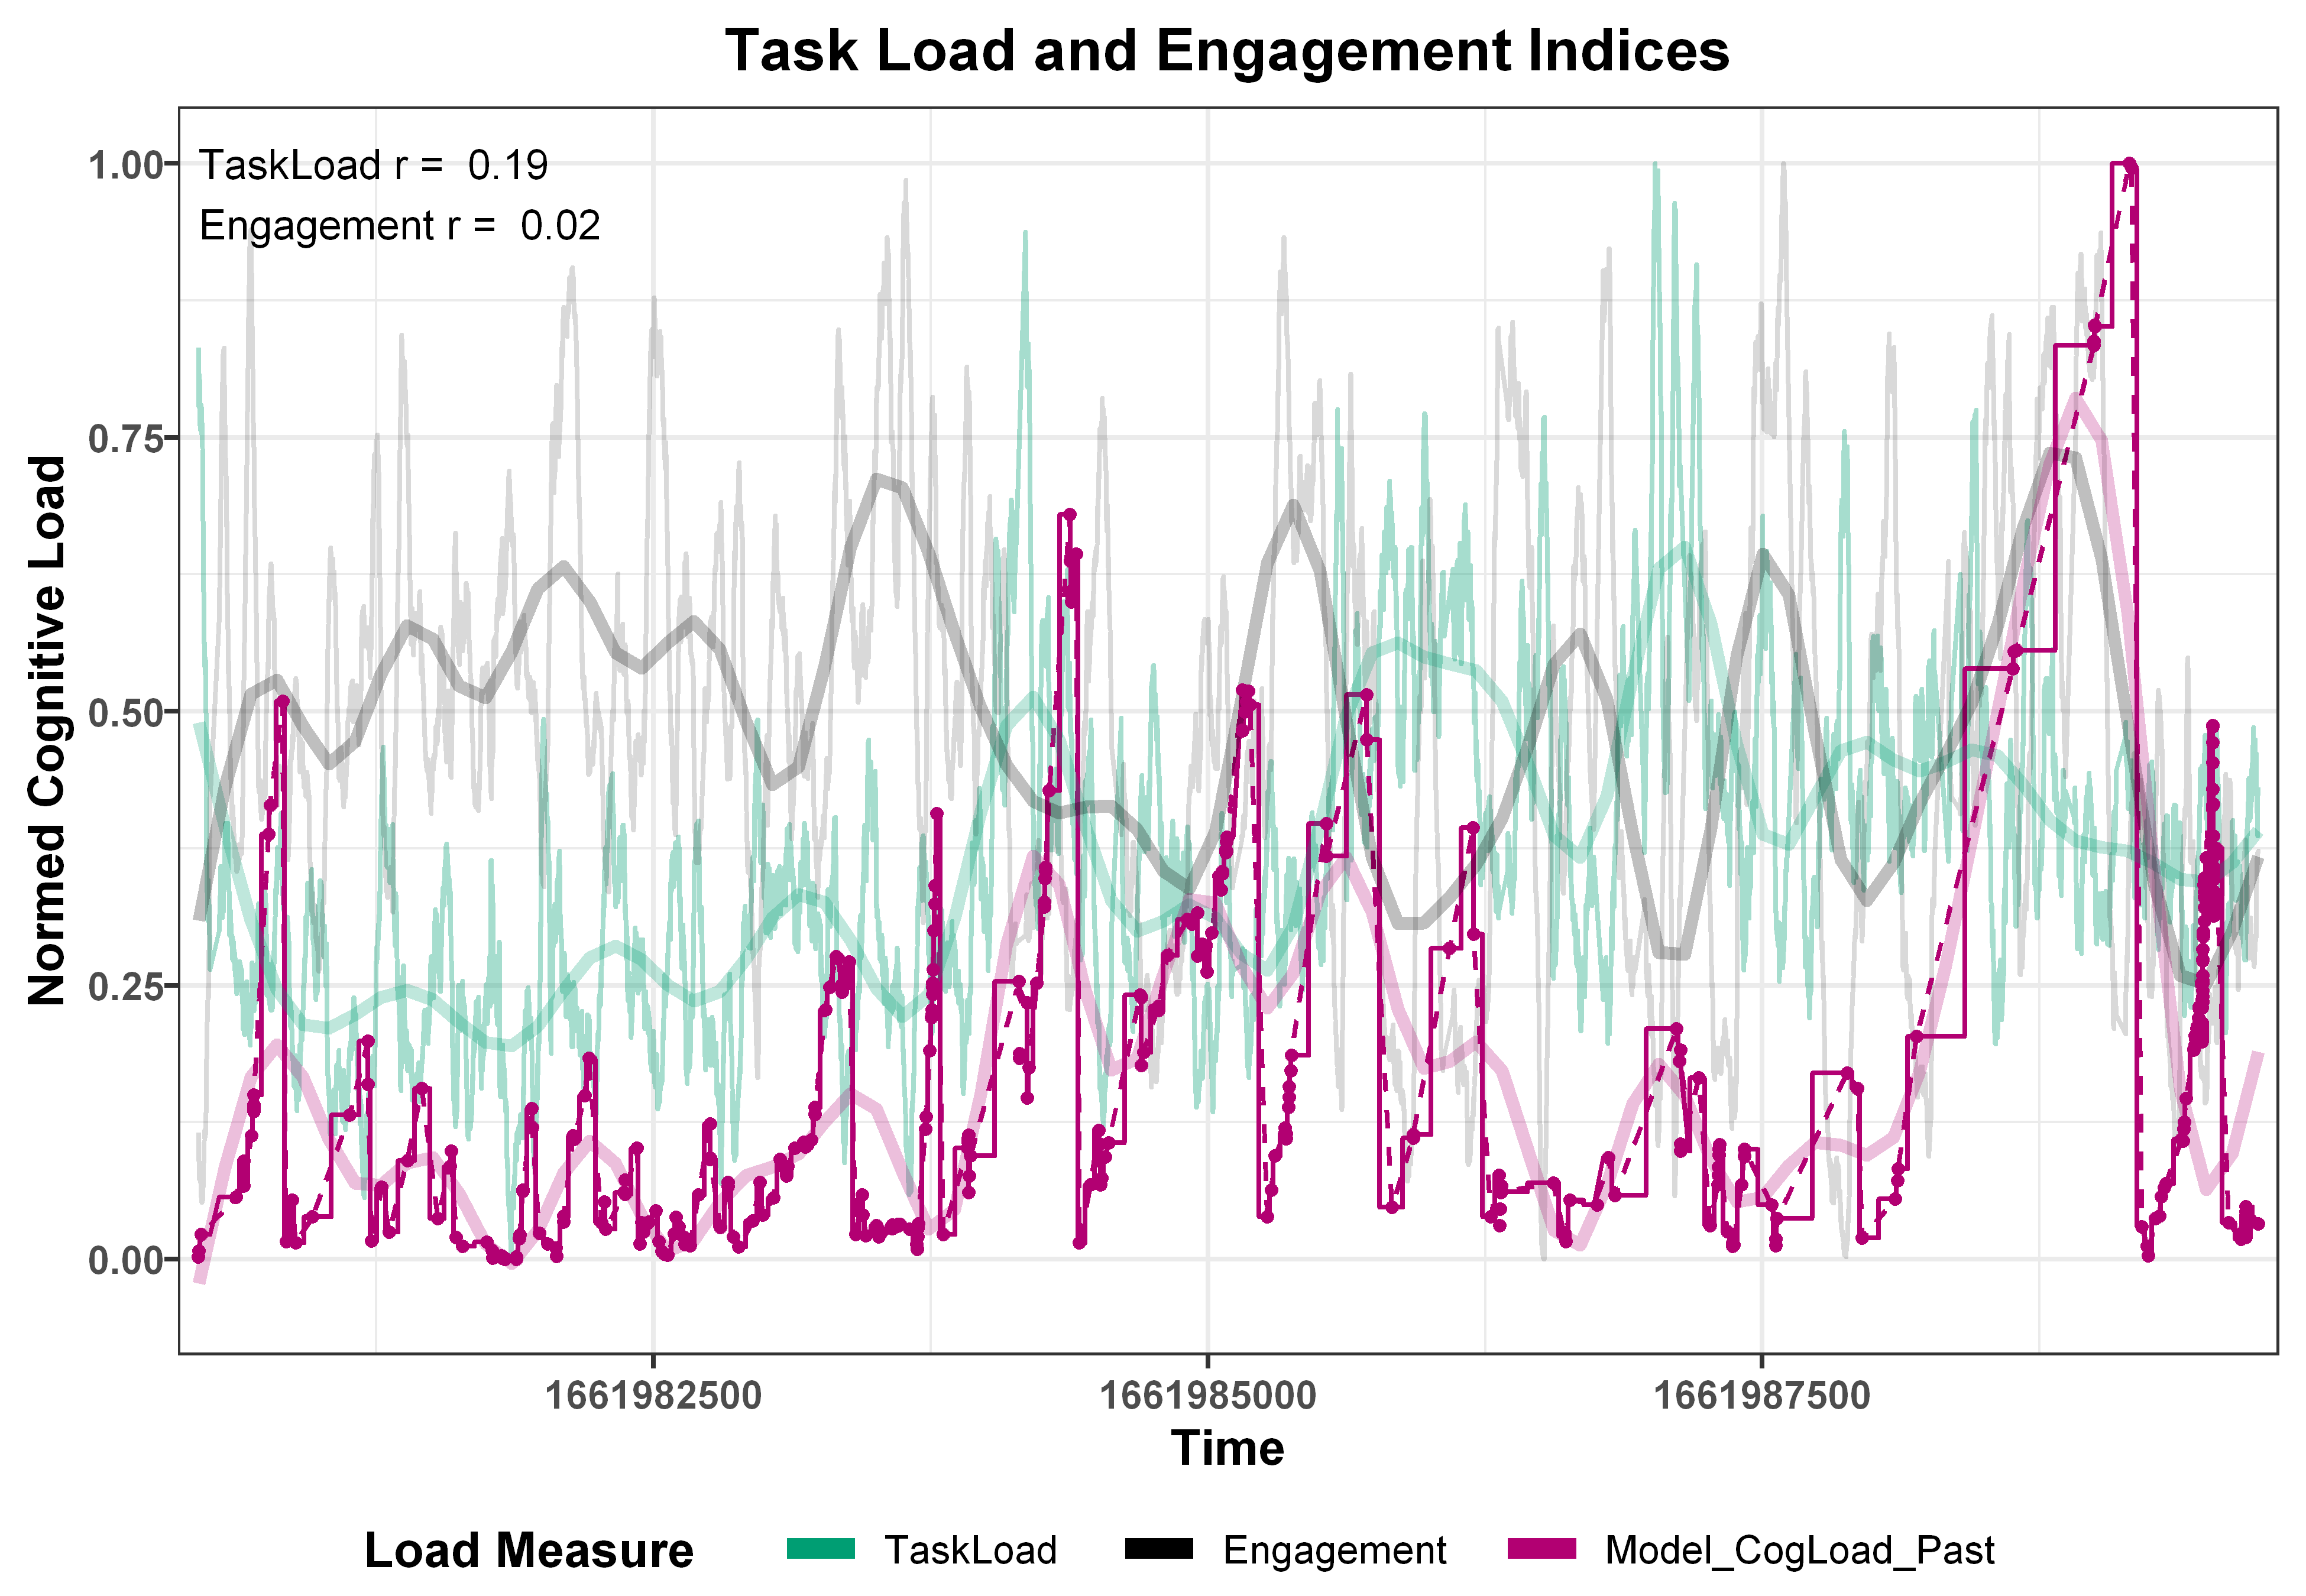

In [13]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_005, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_005 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_005, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
cogload_data <- subset(cogload_data, Time>=min(model_data_005$Time) & Time<=max(model_data_005$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_005, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_005$Time) & Time<=max(model_data_005$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_005 <- data

load_corrs_005 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_005 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_005$r_Past_rolled[1],2)), hjust = 0, size=3)
load_005

load_corrs_005

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_005 <- data

eng_corrs_005 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_005 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_005$TaskLoad_r_Past_rolled[1],2)), hjust = 0, size=3) +
                annotate("text", x = min(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_005$Engagement_r_Past_rolled[1],2)), hjust = 0, size=3)

eng_005

eng_corrs_005

# Subject 006

The following `from` values were not present in `x`: Function_Graph_Interaction_1, Point_of_Interest_Triage_3, Point_of_Interest_Analysis_4

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Analysis_4, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r         
1 006    -0.4053003

Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 25 rows containing missing values (geom_point)."


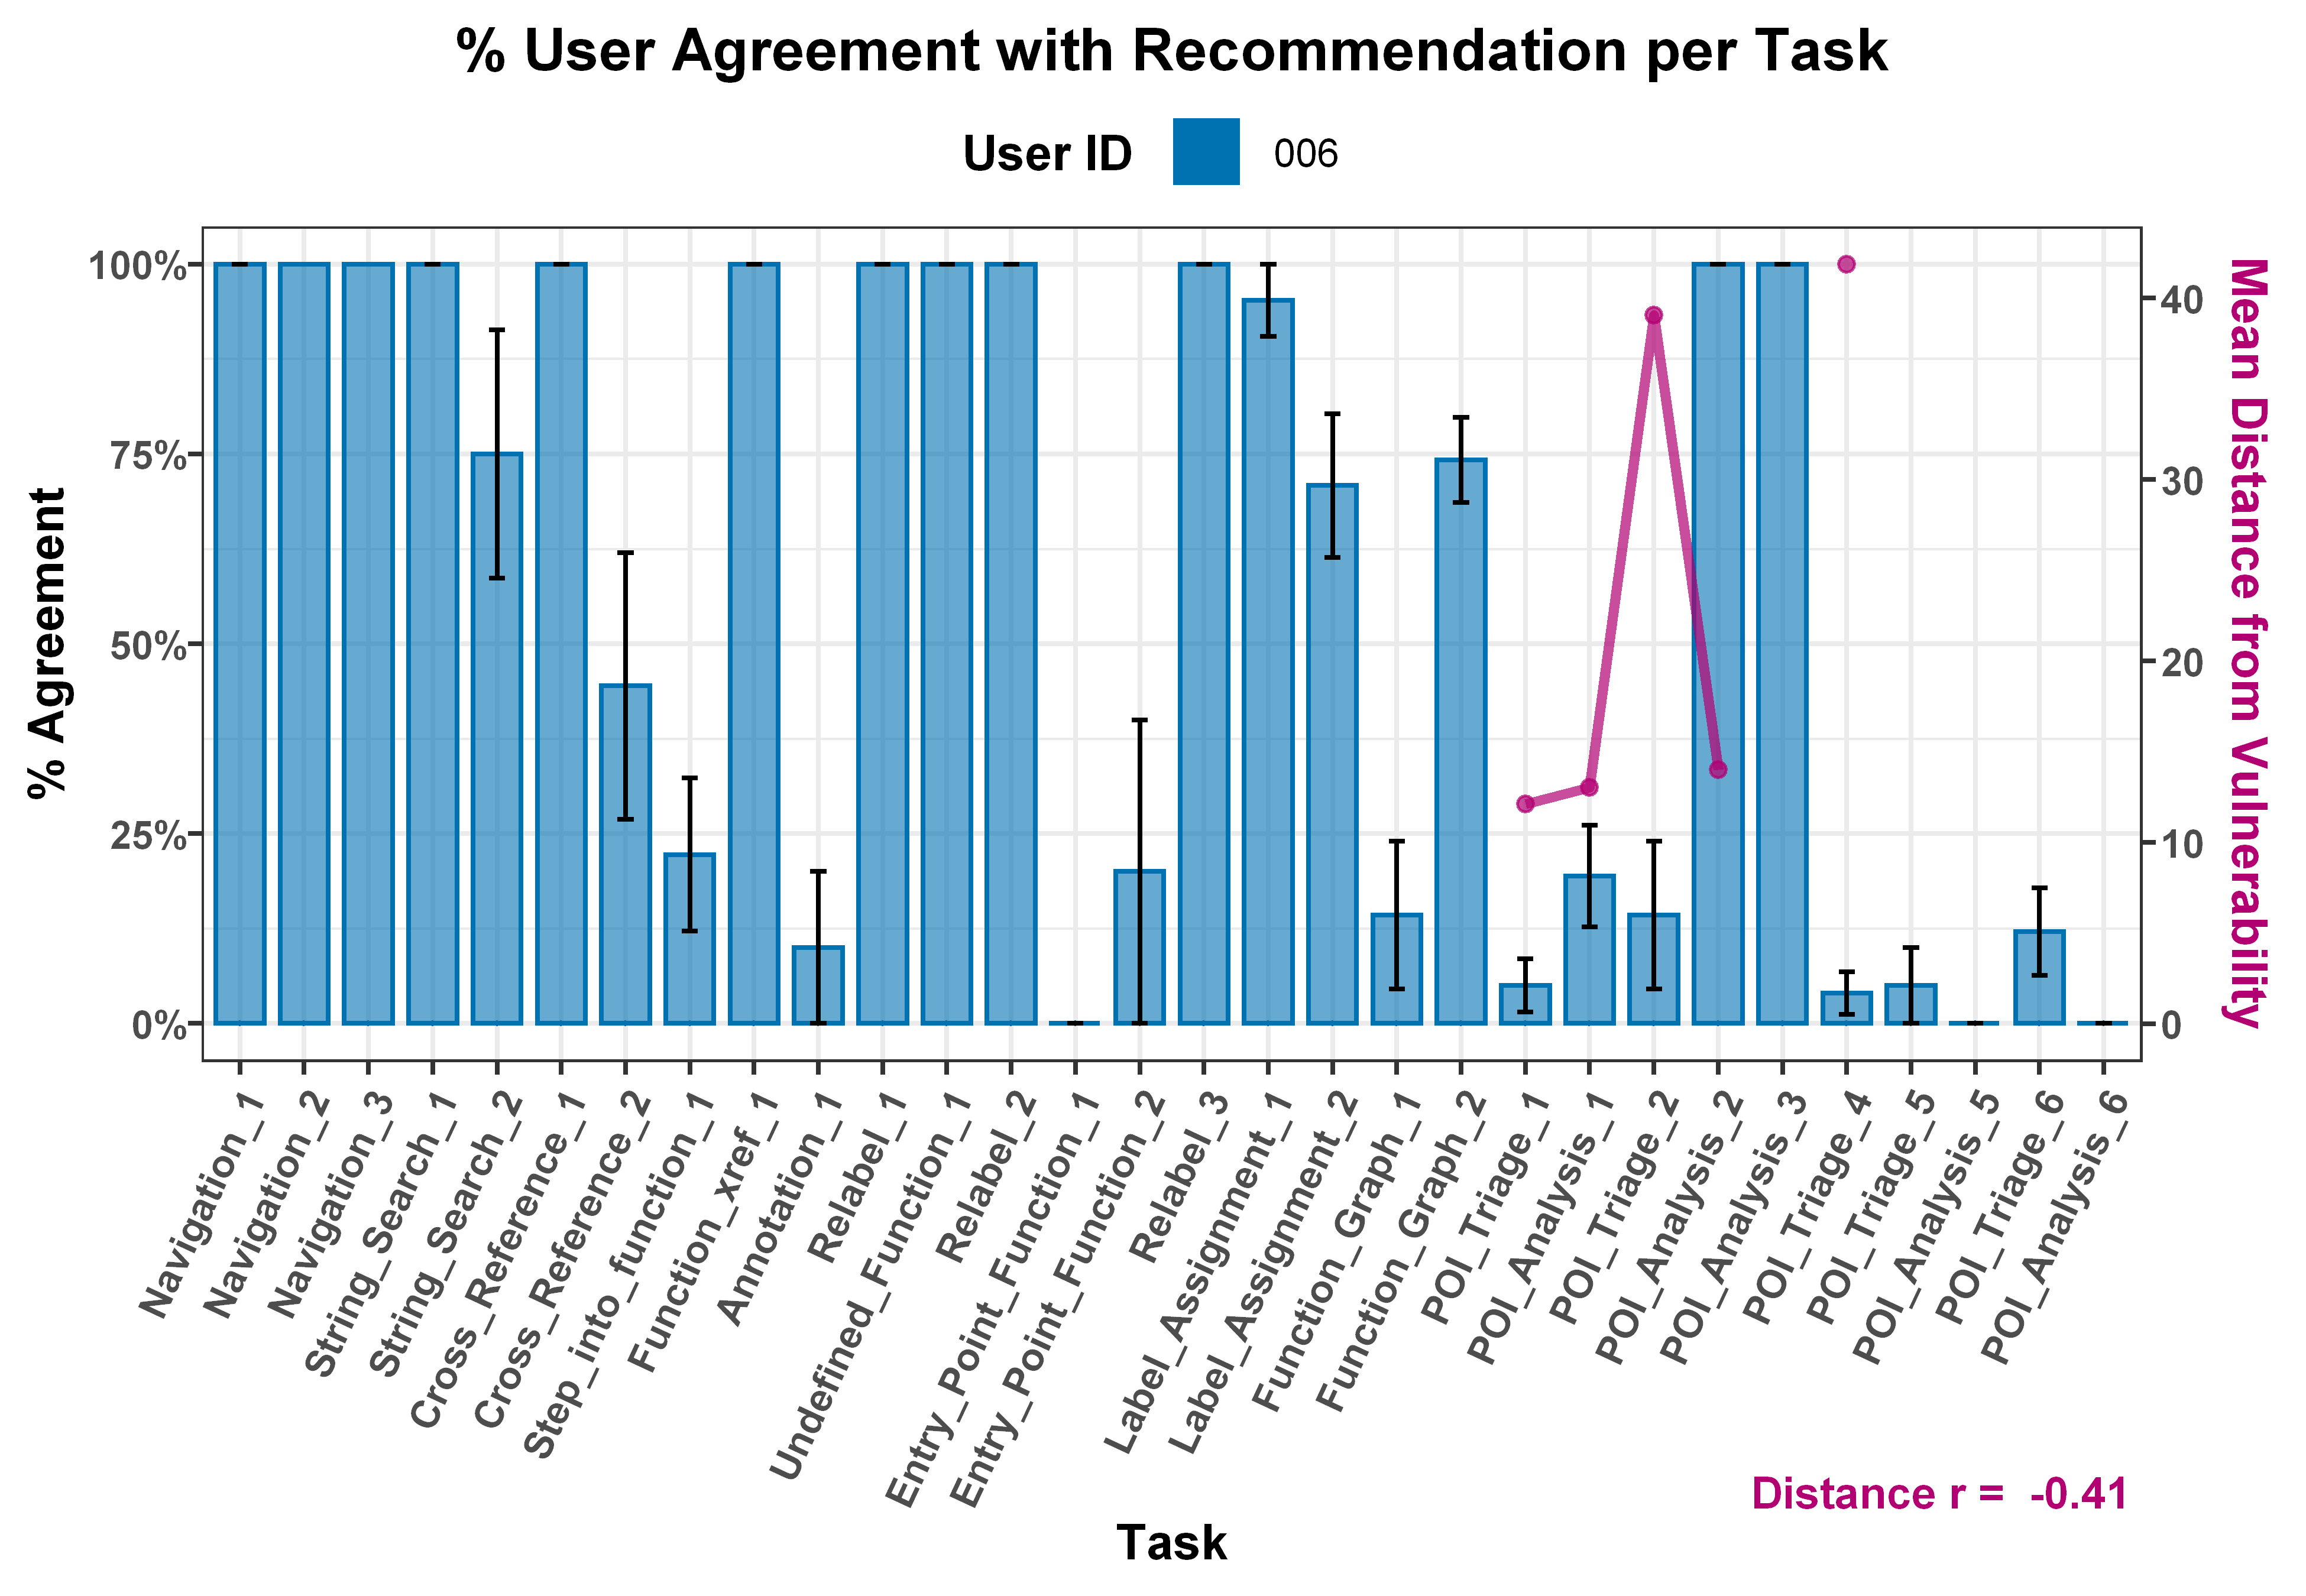

In [42]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_006, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_006, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_006 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_006 <- subset(data_006, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_006

agg_006 <- ggplot(data = data_006, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_006$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_006

UserID r_Past_rolled r_Past_interp
1 006    -0.3809873    -0.3903337

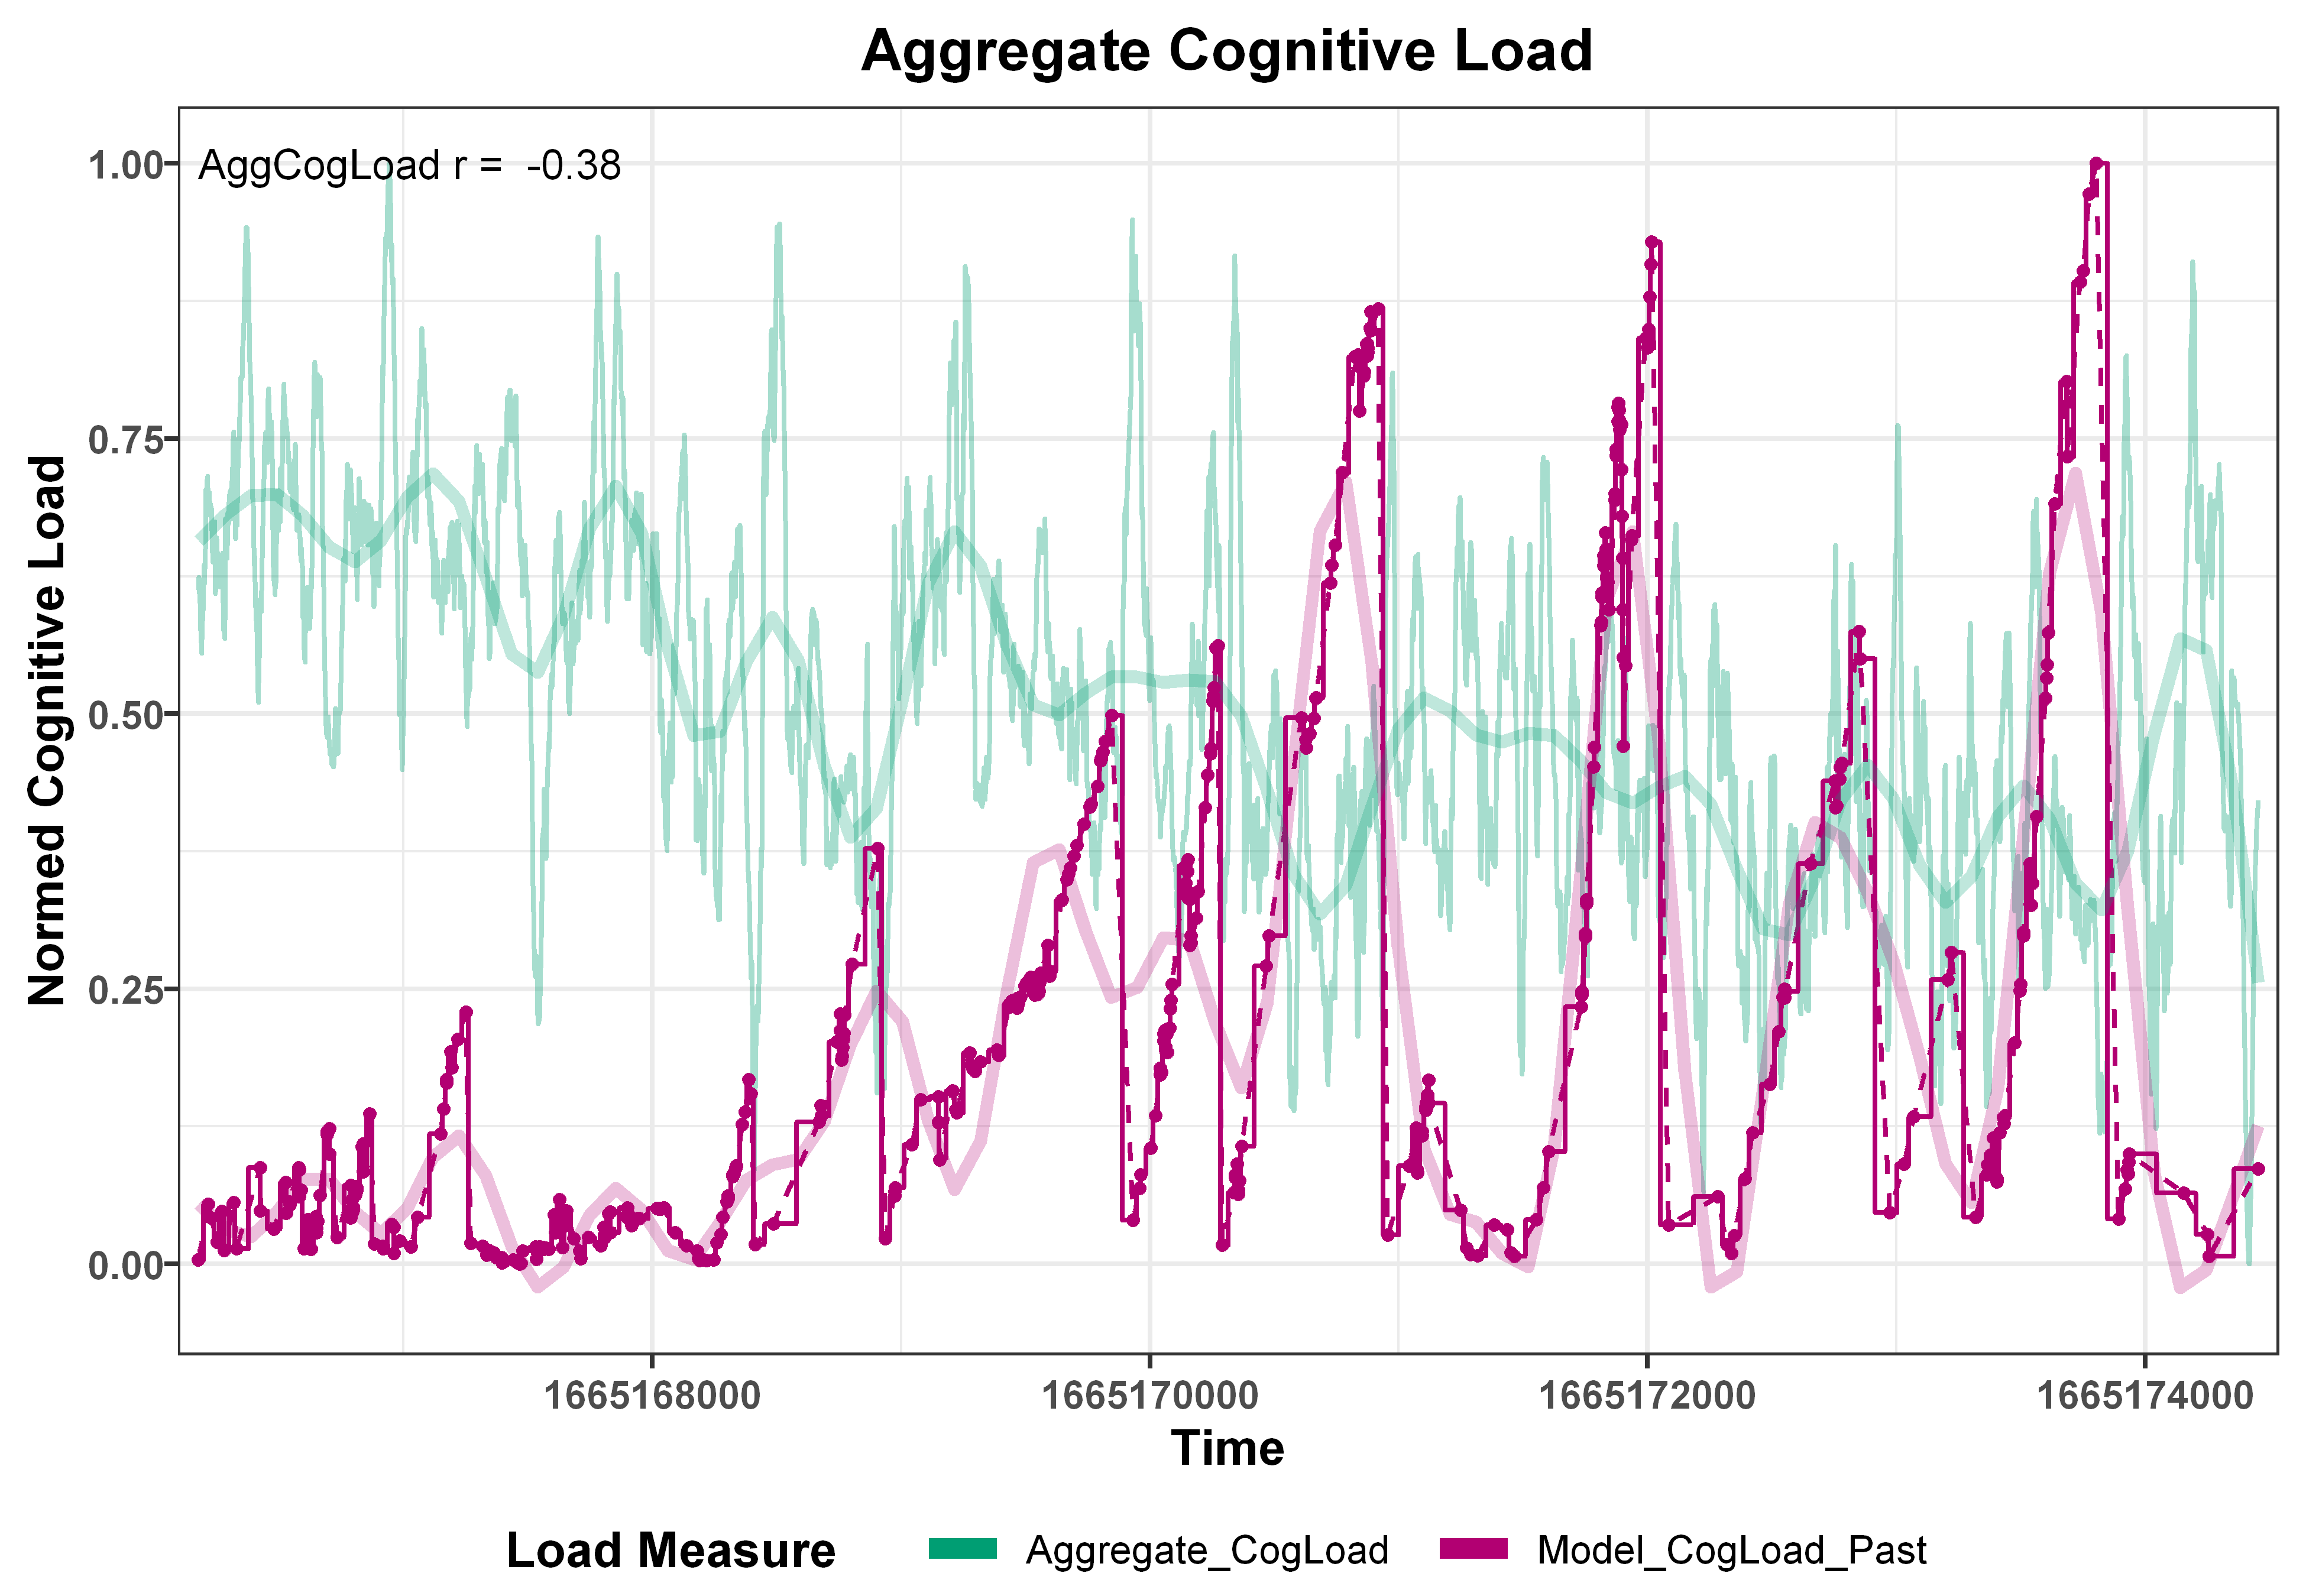

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 006    0.04974638             0.05574929             -0.1188861              
  Engagement_r_Past_interp
1 -0.1289635

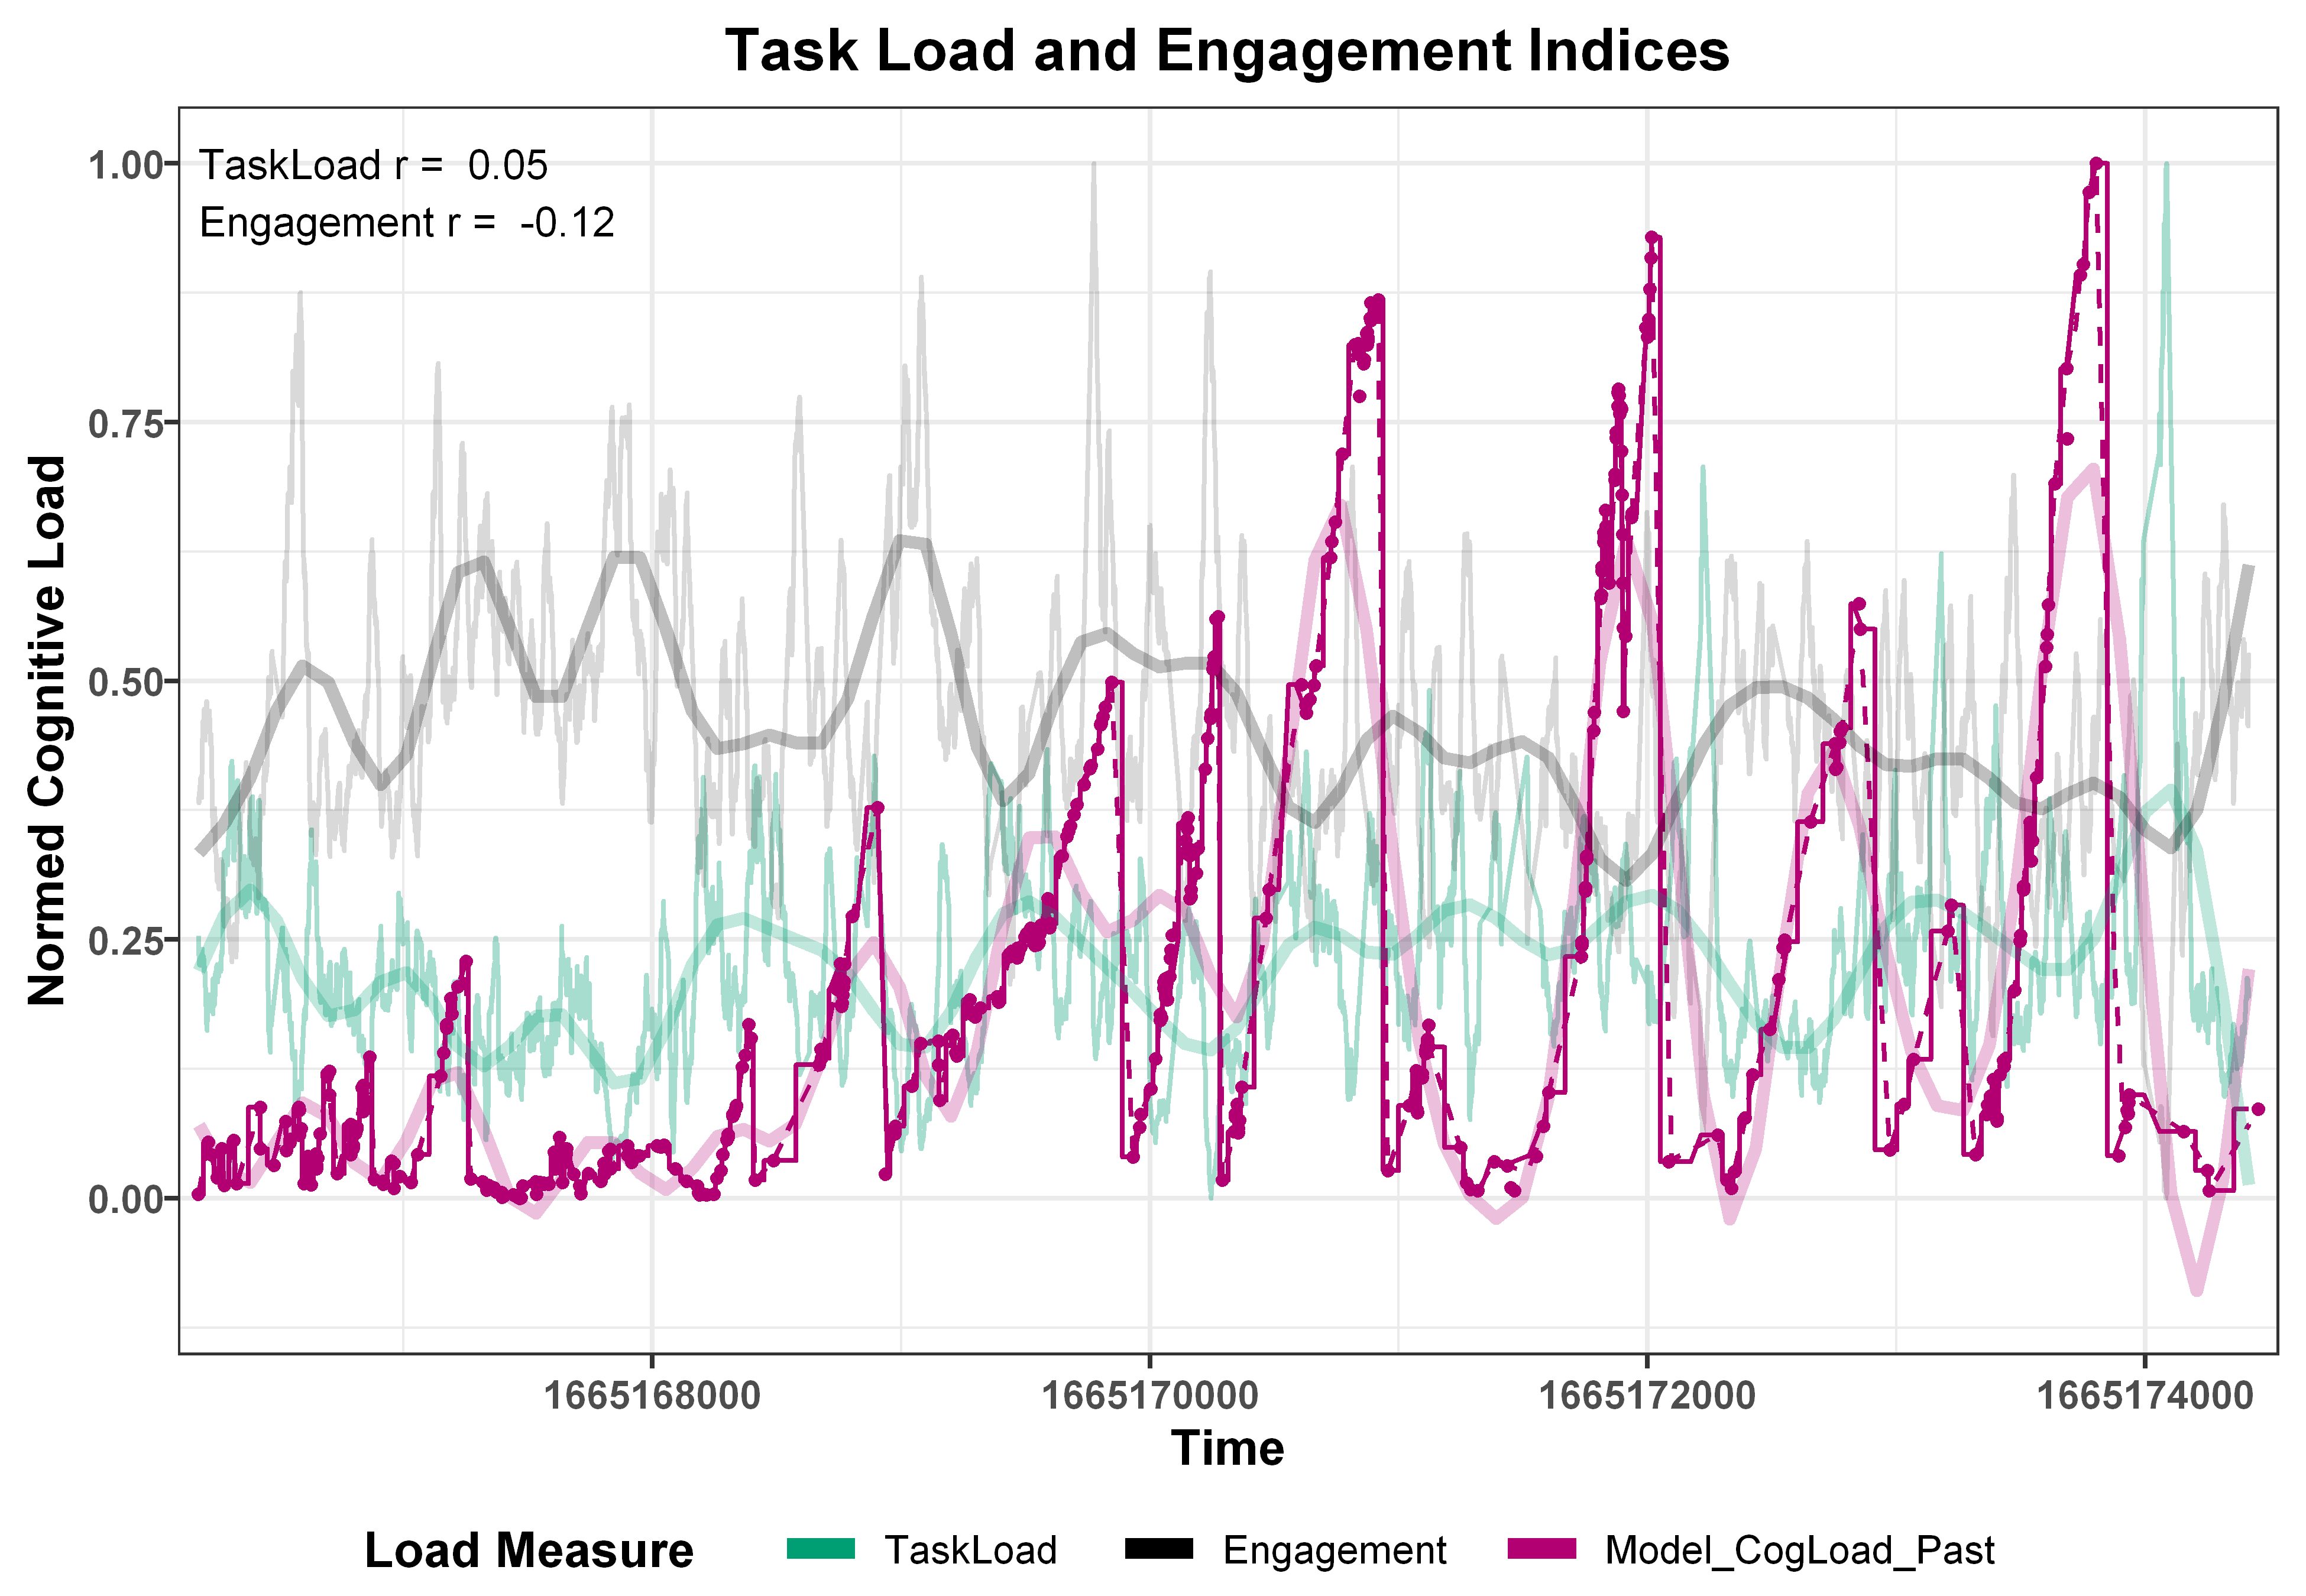

In [15]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_006, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_006 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_006, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
cogload_data <- subset(cogload_data, Time>=min(model_data_006$Time) & Time<=max(model_data_006$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_006, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_006$Time) & Time<=max(model_data_006$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_006 <- data

load_corrs_006 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_006 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_006$r_Past_rolled[1],2)), hjust = 0, size=3)
load_006

load_corrs_006

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_006 <- data

eng_corrs_006 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_006 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_006$TaskLoad_r_Past_rolled[1],2)), hjust = 0, size=3) +
                annotate("text", x = min(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_006$Engagement_r_Past_rolled[1],2)), hjust = 0, size=3)

eng_006

eng_corrs_006

# Subject 007

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r        
1 007    0.4901055

Warning message:
"Removed 25 row(s) containing missing values (geom_path)."
Warning message:
"Removed 27 rows containing missing values (geom_point)."


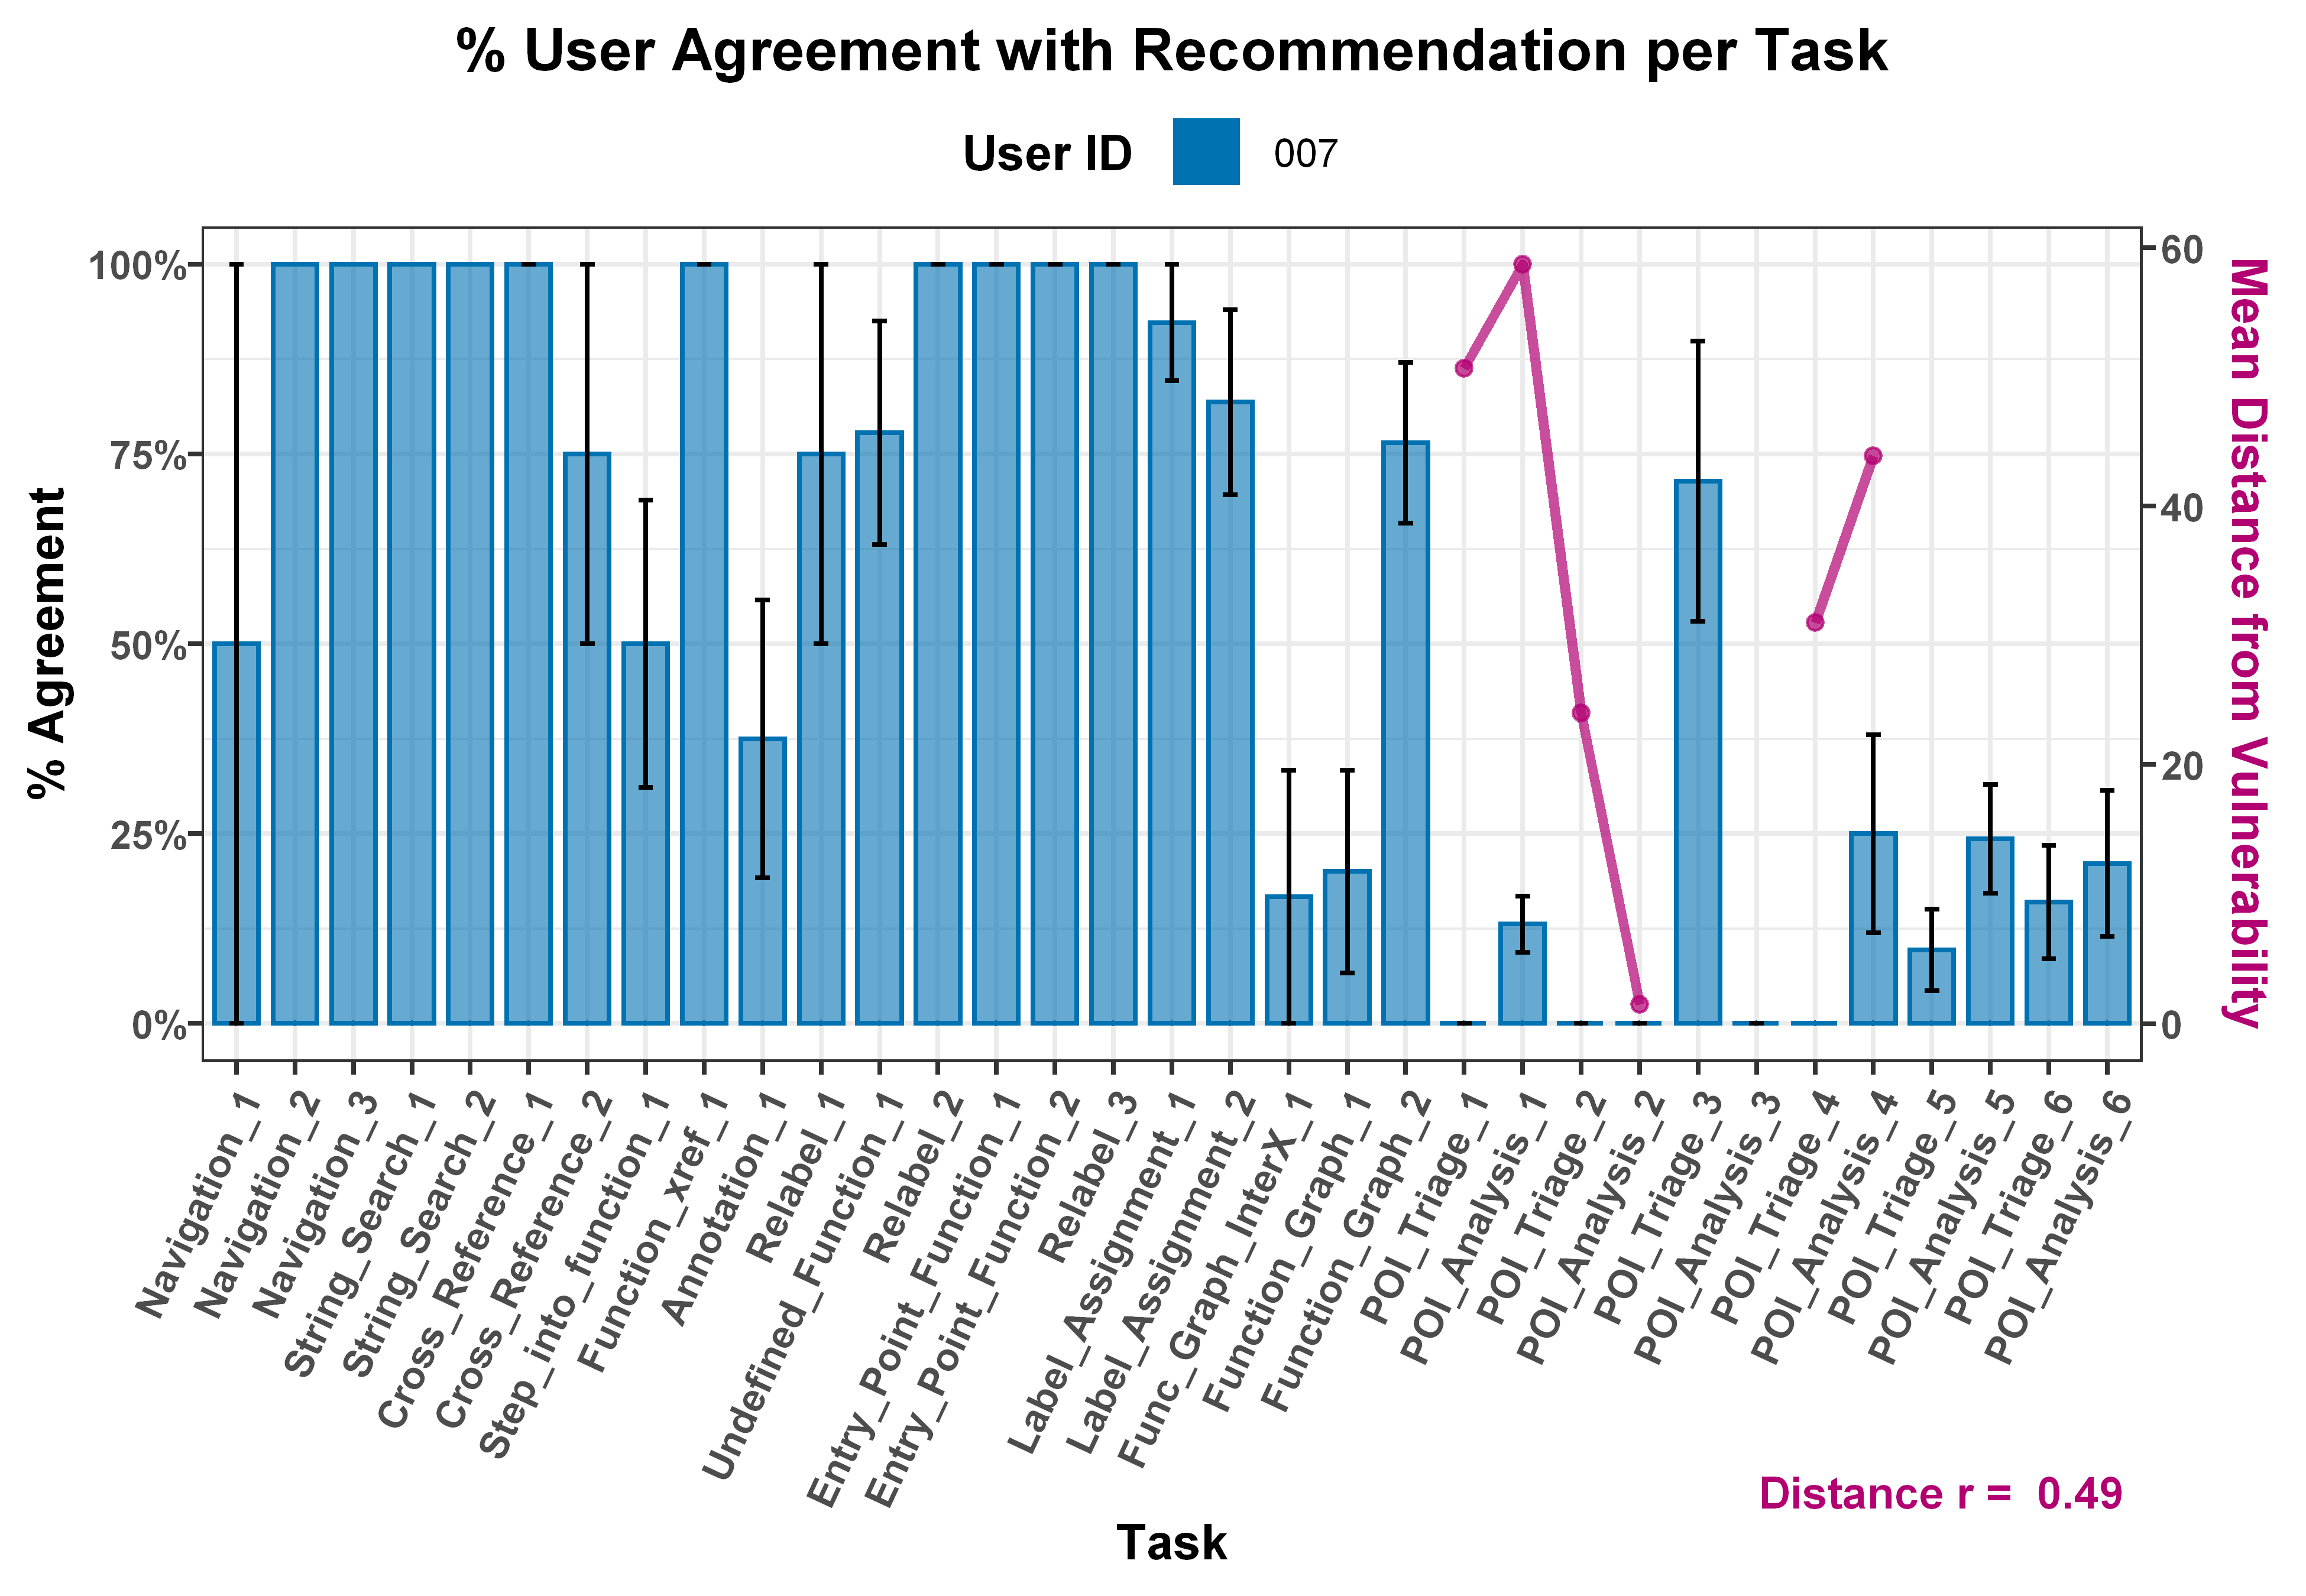

In [43]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_007, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_007, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_007 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_007 <- subset(data_007, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_007

agg_007 <- ggplot(data = data_007, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = ifelse(Match_Any.mean - Match_Any.se<0,0,Match_Any.mean - Match_Any.se), ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_007$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_007

UserID r_Past_rolled r_Past_interp
1 007    -0.1743613    -0.1921297

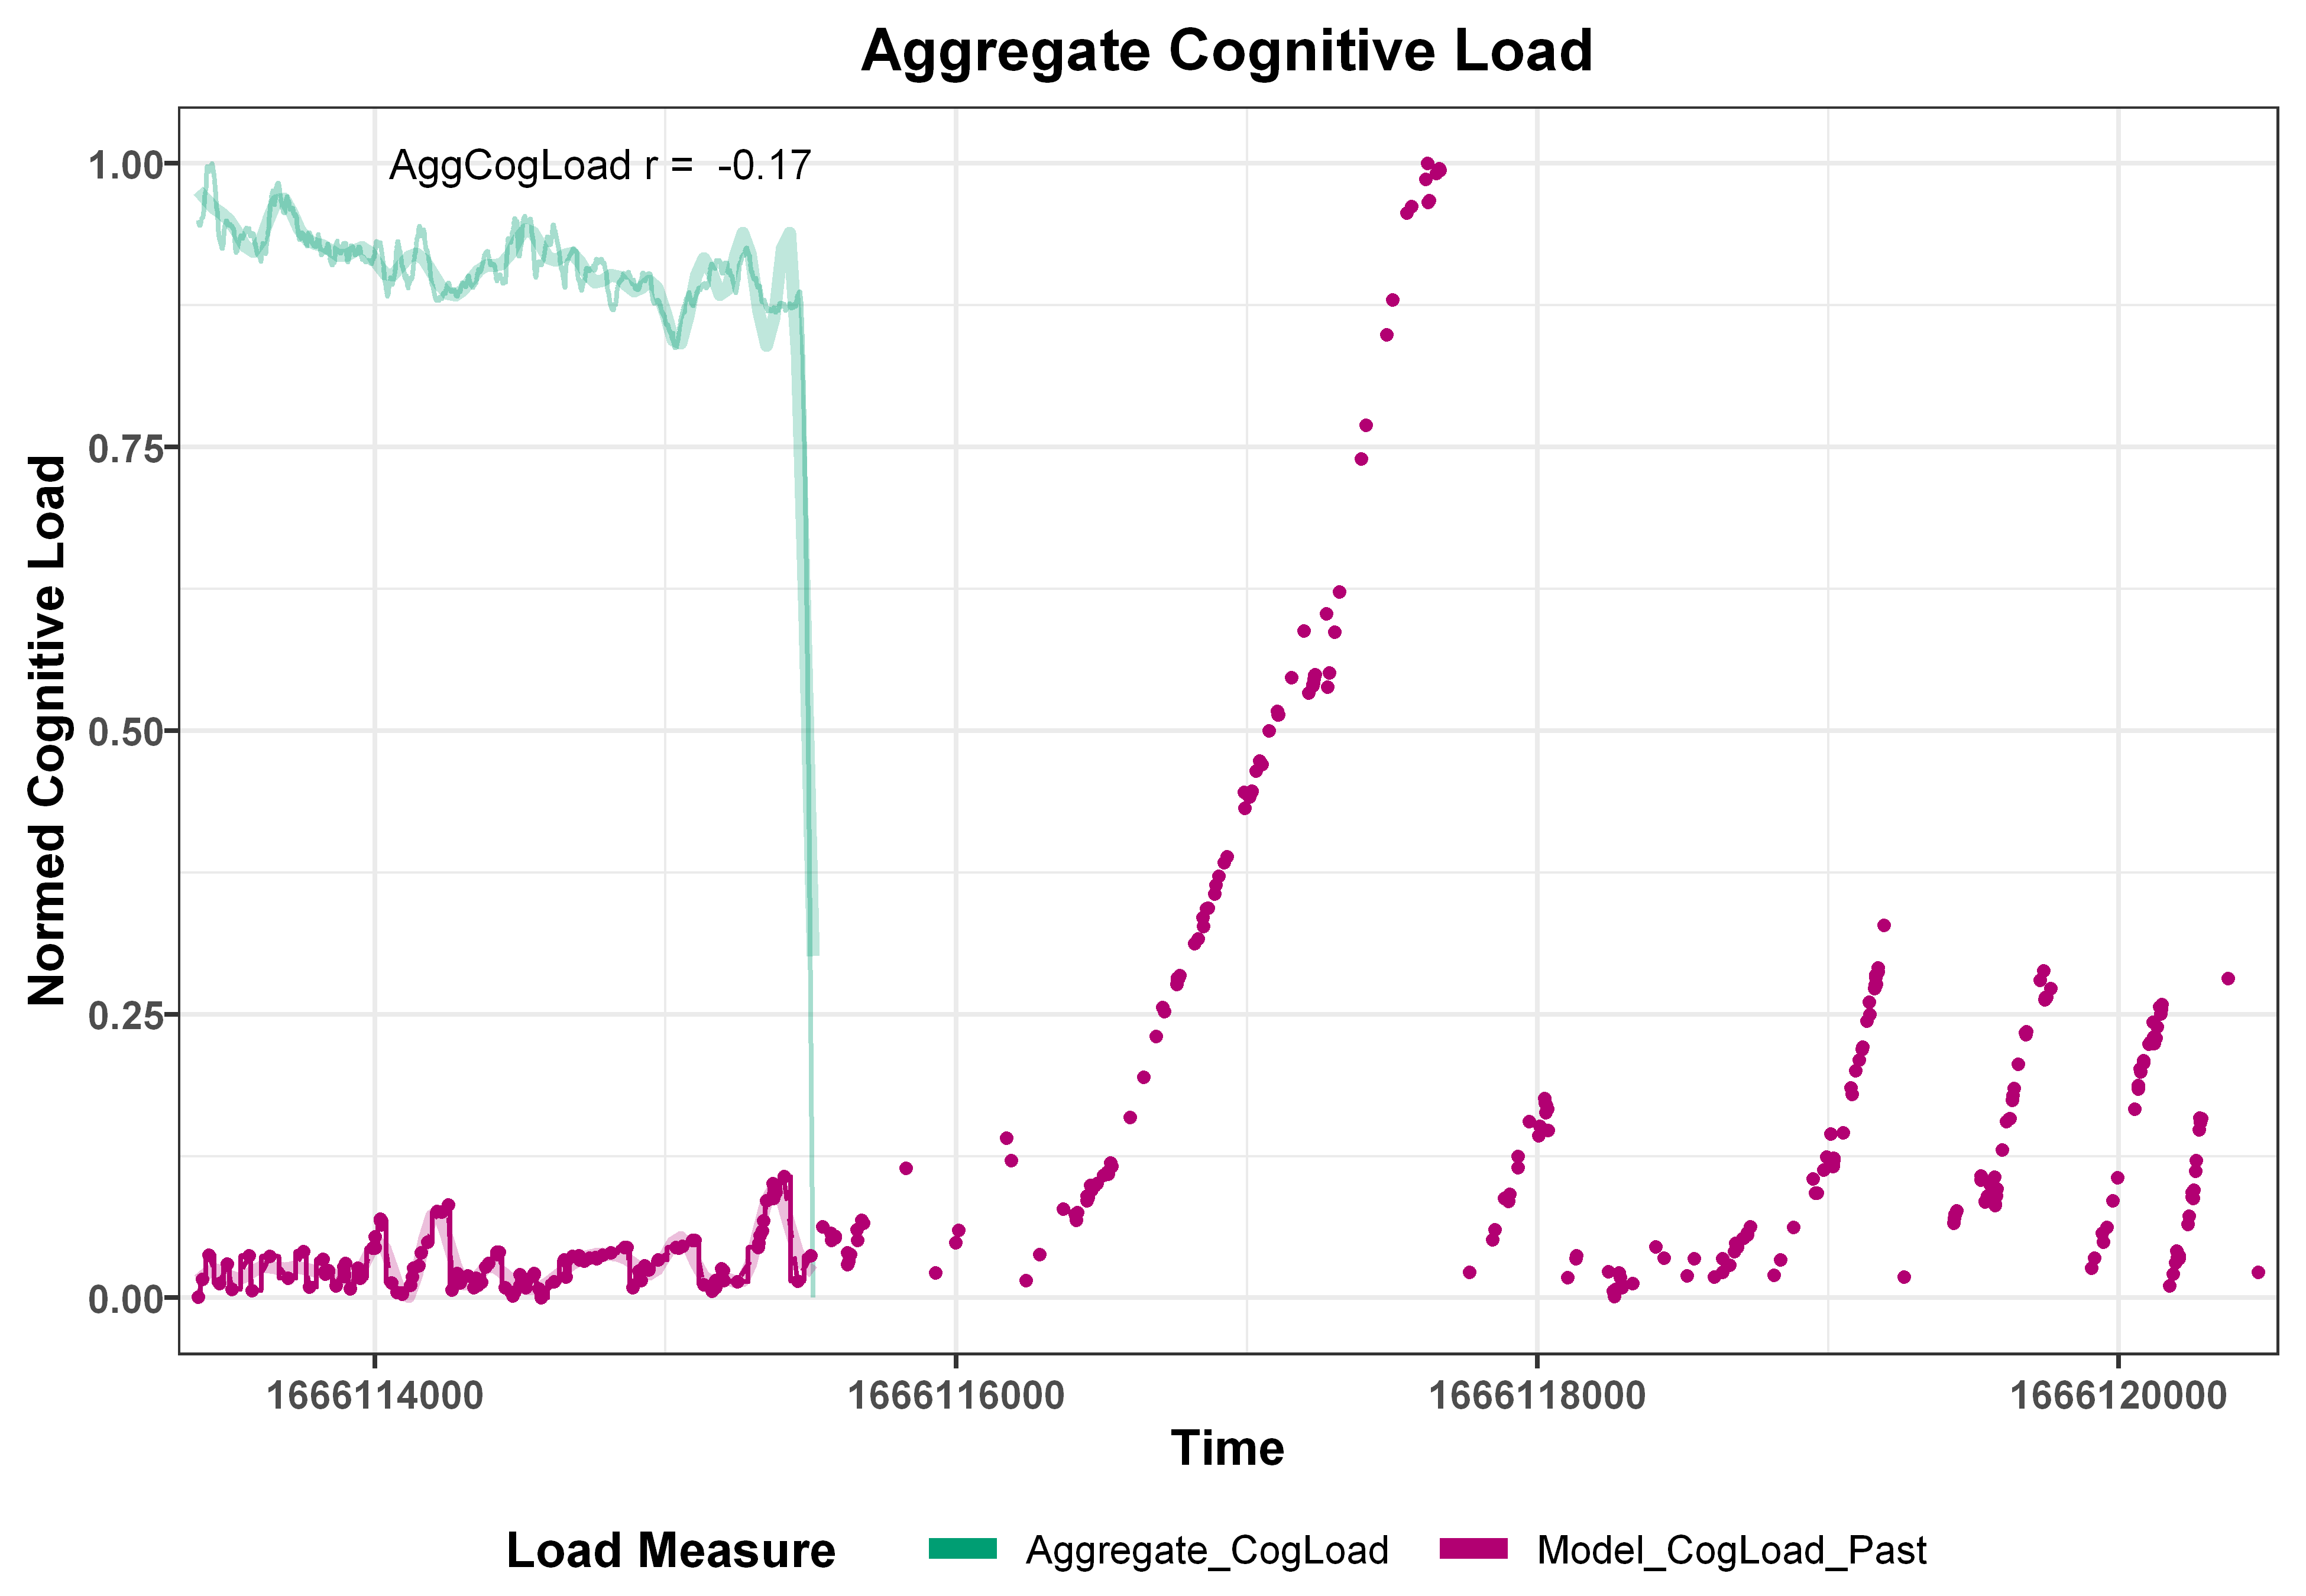

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 007    0.02705814             0.03536807             -0.08560734             
  Engagement_r_Past_interp
1 -0.08510455

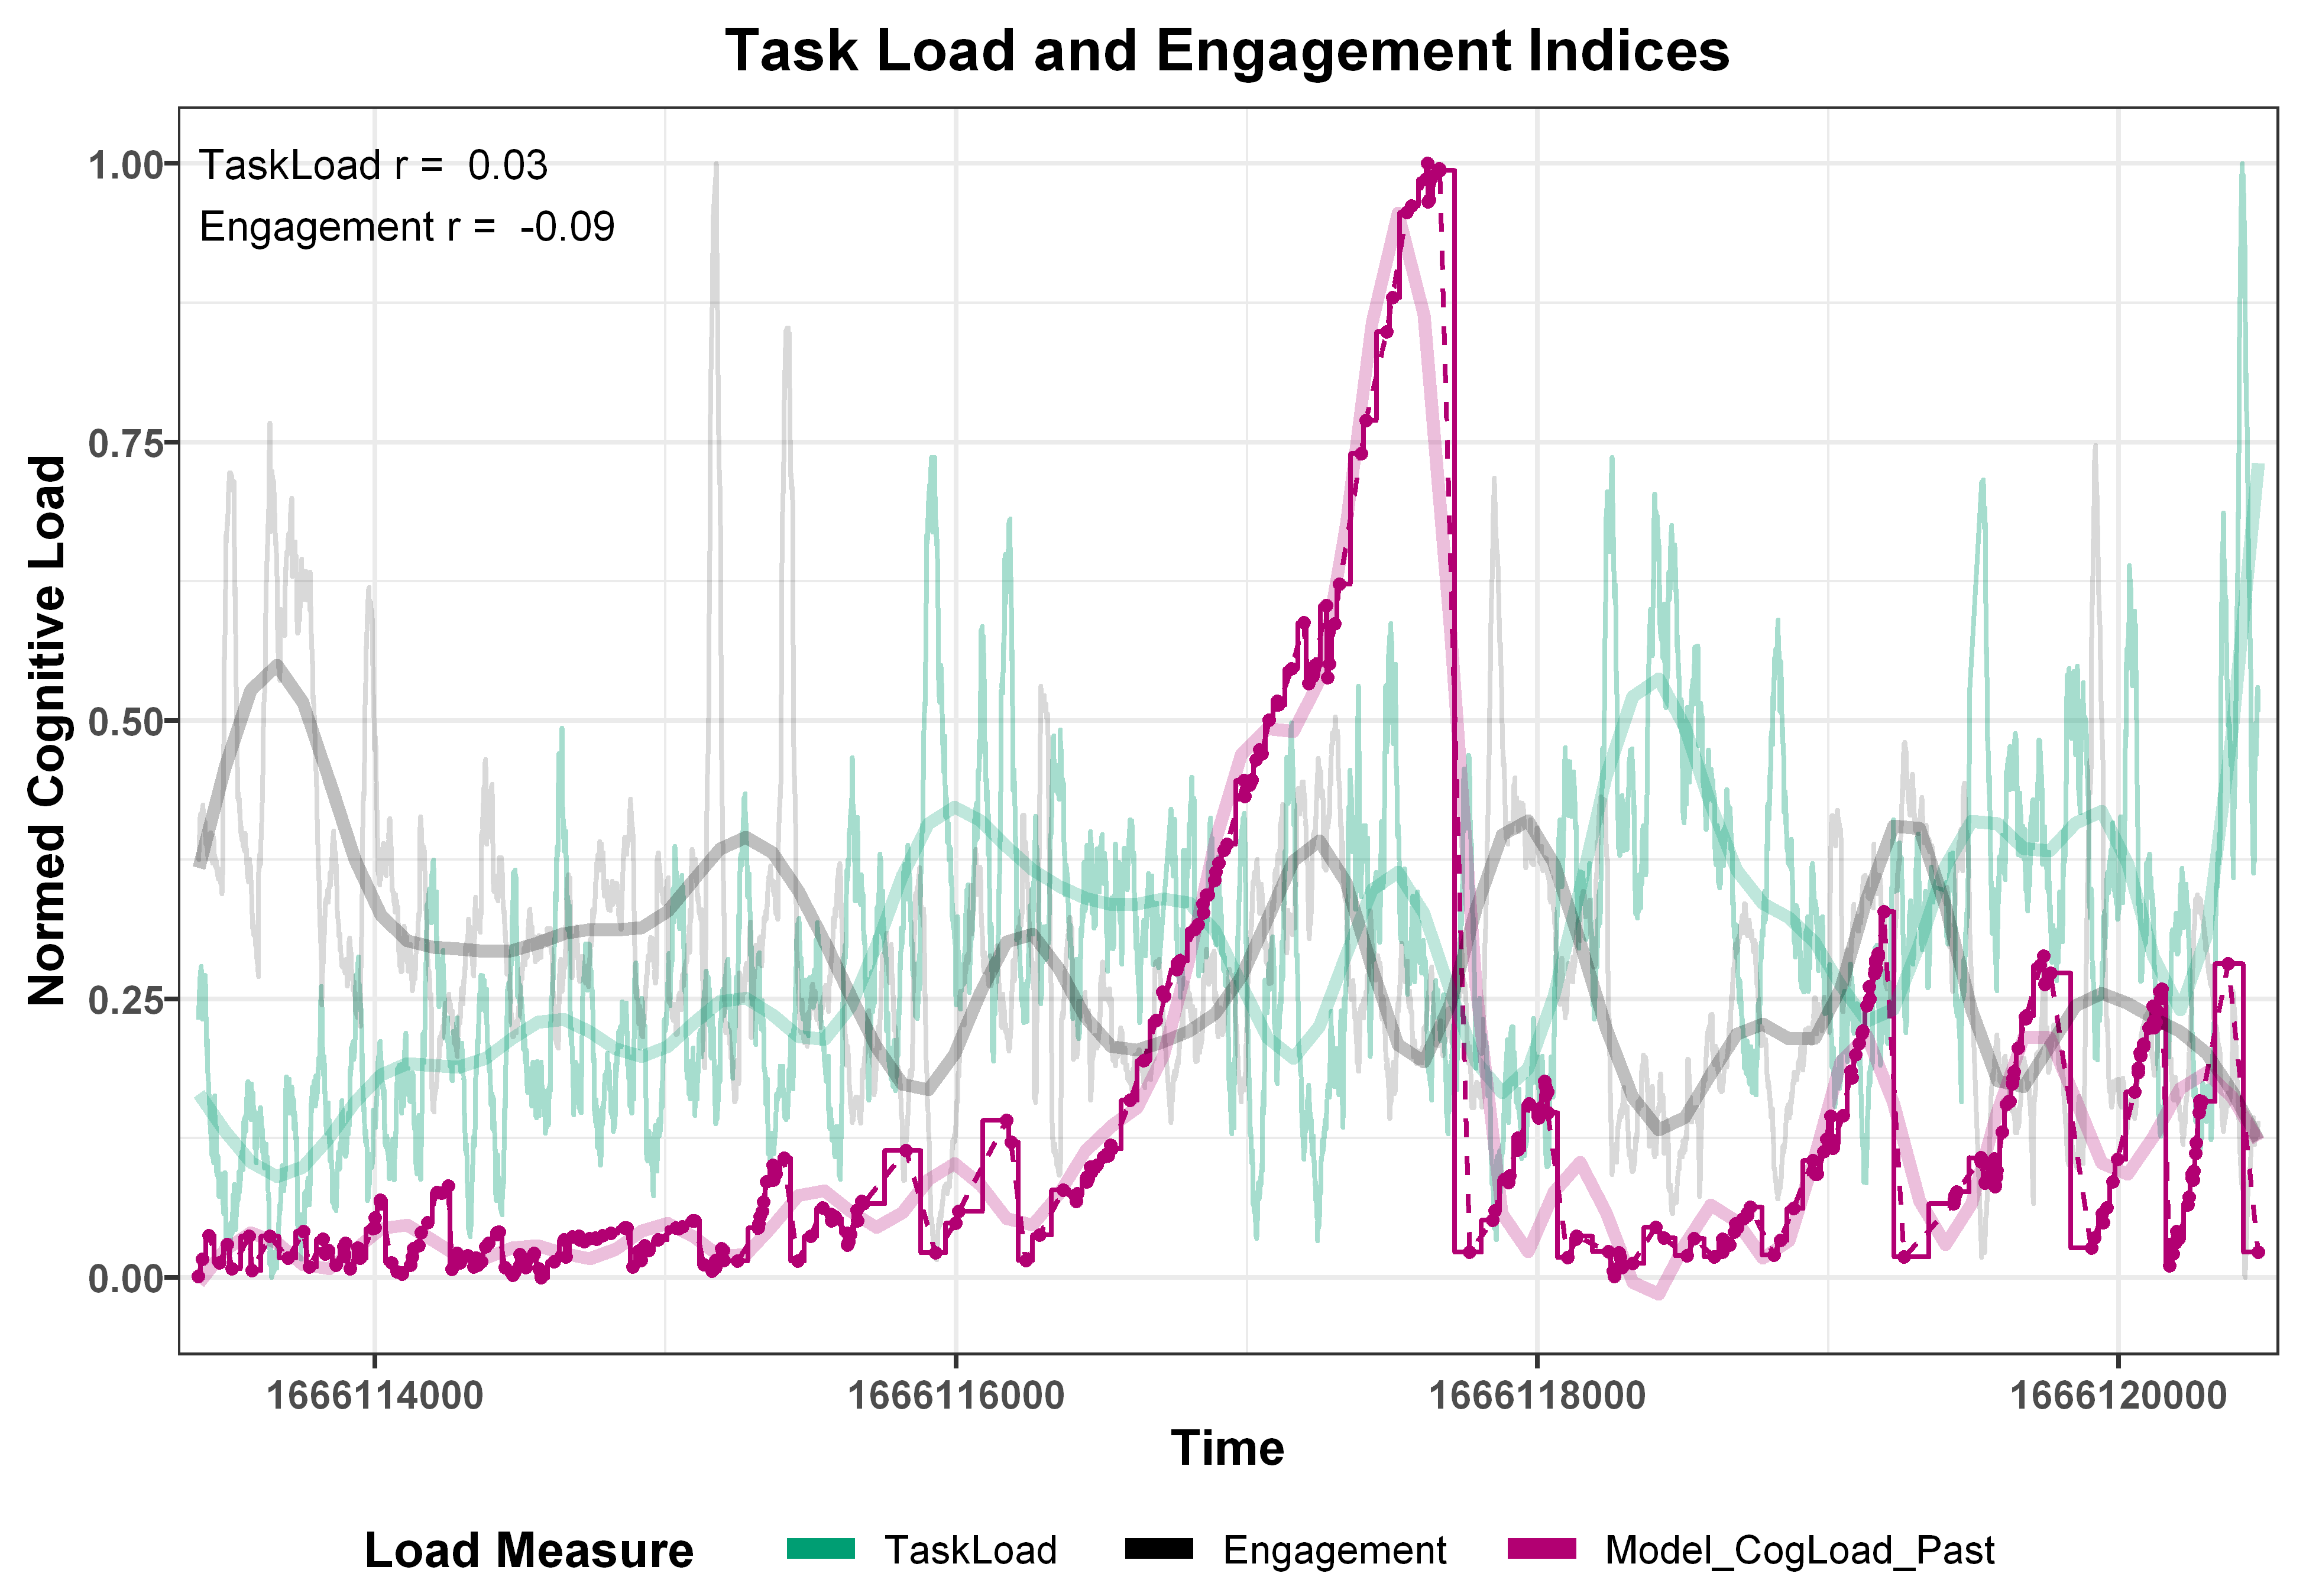

In [17]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_007, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_007 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_007, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
cogload_data <- subset(cogload_data, Time>=min(model_data_007$Time) & Time<=max(model_data_007$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_007, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_007$Time) & Time<=max(model_data_007$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_007 <- data

load_corrs_007 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_007 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = max(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_007$r_Past_rolled[1],2)), hjust = 1, size=3)
load_007

load_corrs_007

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_007 <- data

eng_corrs_007 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_007 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_007$TaskLoad_r_Past_rolled[1],2)), hjust = 0, size=3) +
                annotate("text", x = min(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_007$Engagement_r_Past_rolled[1],2)), hjust = 0, size=3)

eng_007

eng_corrs_007

# Subject 008

The following `from` values were not present in `x`: Point_of_Interest_Analysis_2, Point_of_Interest_Analysis_3, Point_of_Interest_Analysis_4, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6

The following `from` values were not present in `x`: Point_of_Interest_Analysis_2, Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Analysis_4, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r         
1 008    -0.7628713

Warning message:
"Removed 21 row(s) containing missing values (geom_path)."
Warning message:
"Removed 22 rows containing missing values (geom_point)."


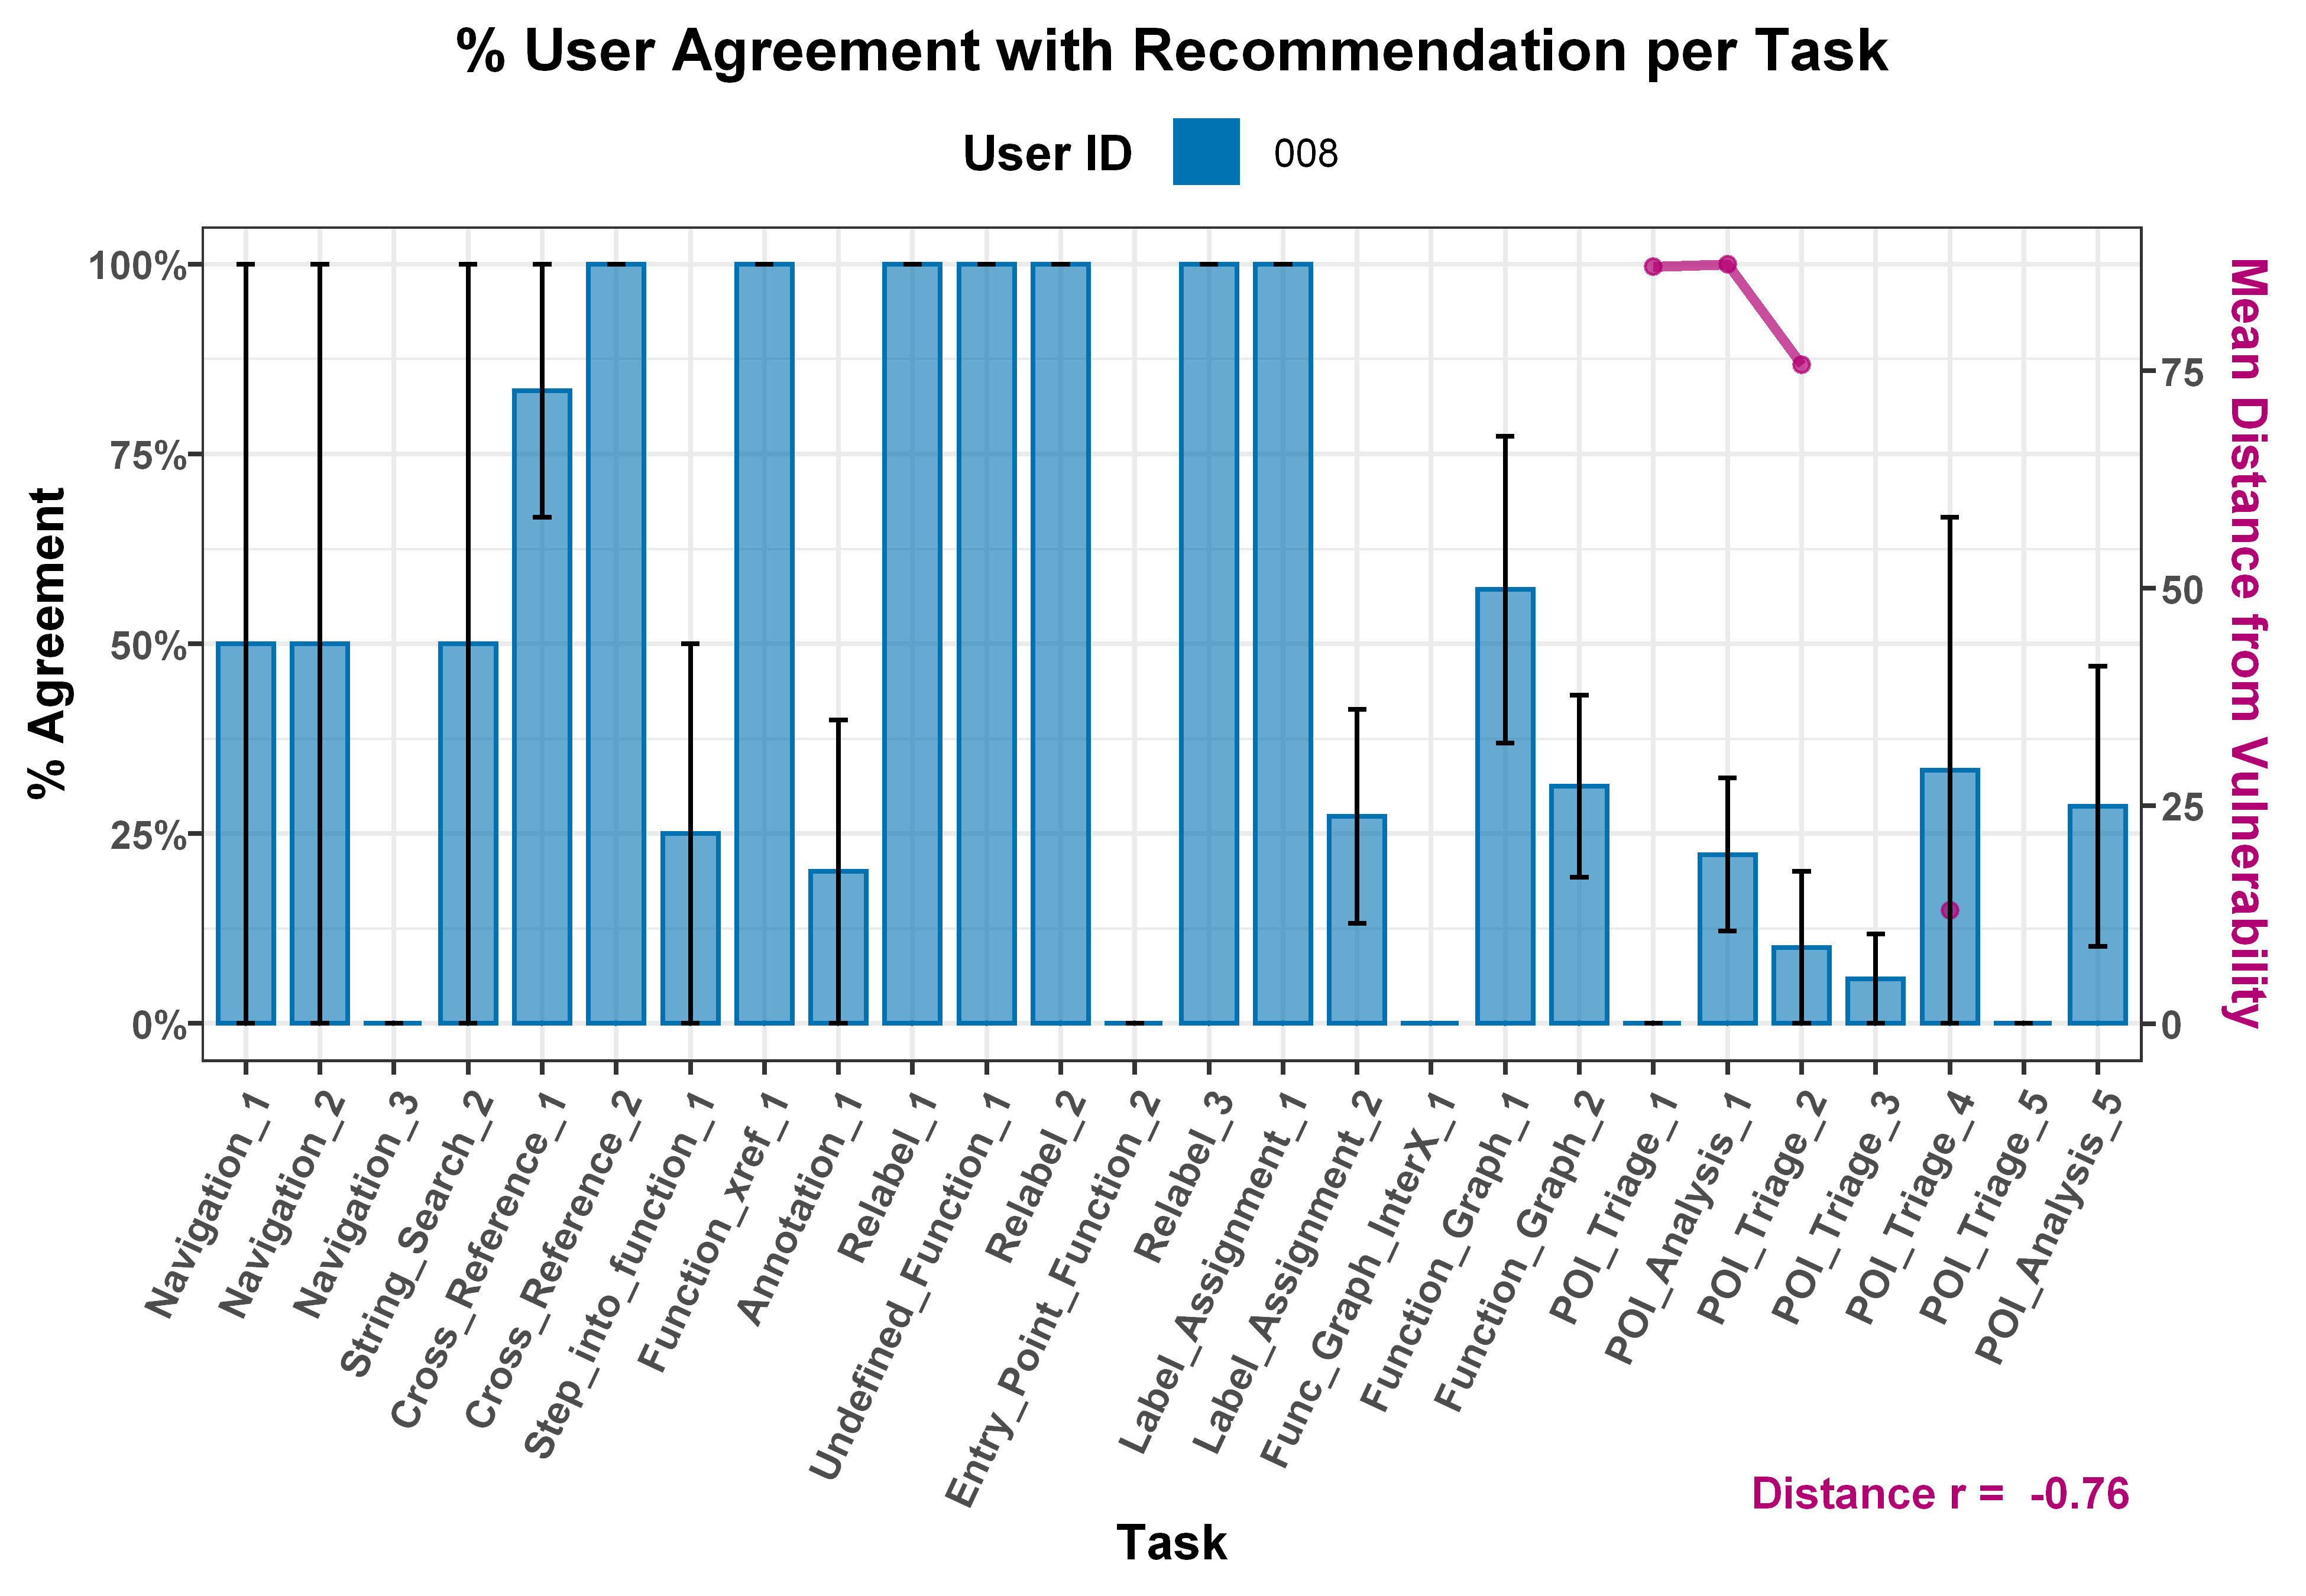

In [44]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_008, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_008, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_008 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_008 <- subset(data_008, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_008

agg_008 <- ggplot(data = data_008, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_008$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_008

UserID r_Past_rolled r_Past_interp
1 008    -0.2129358    -0.2228002

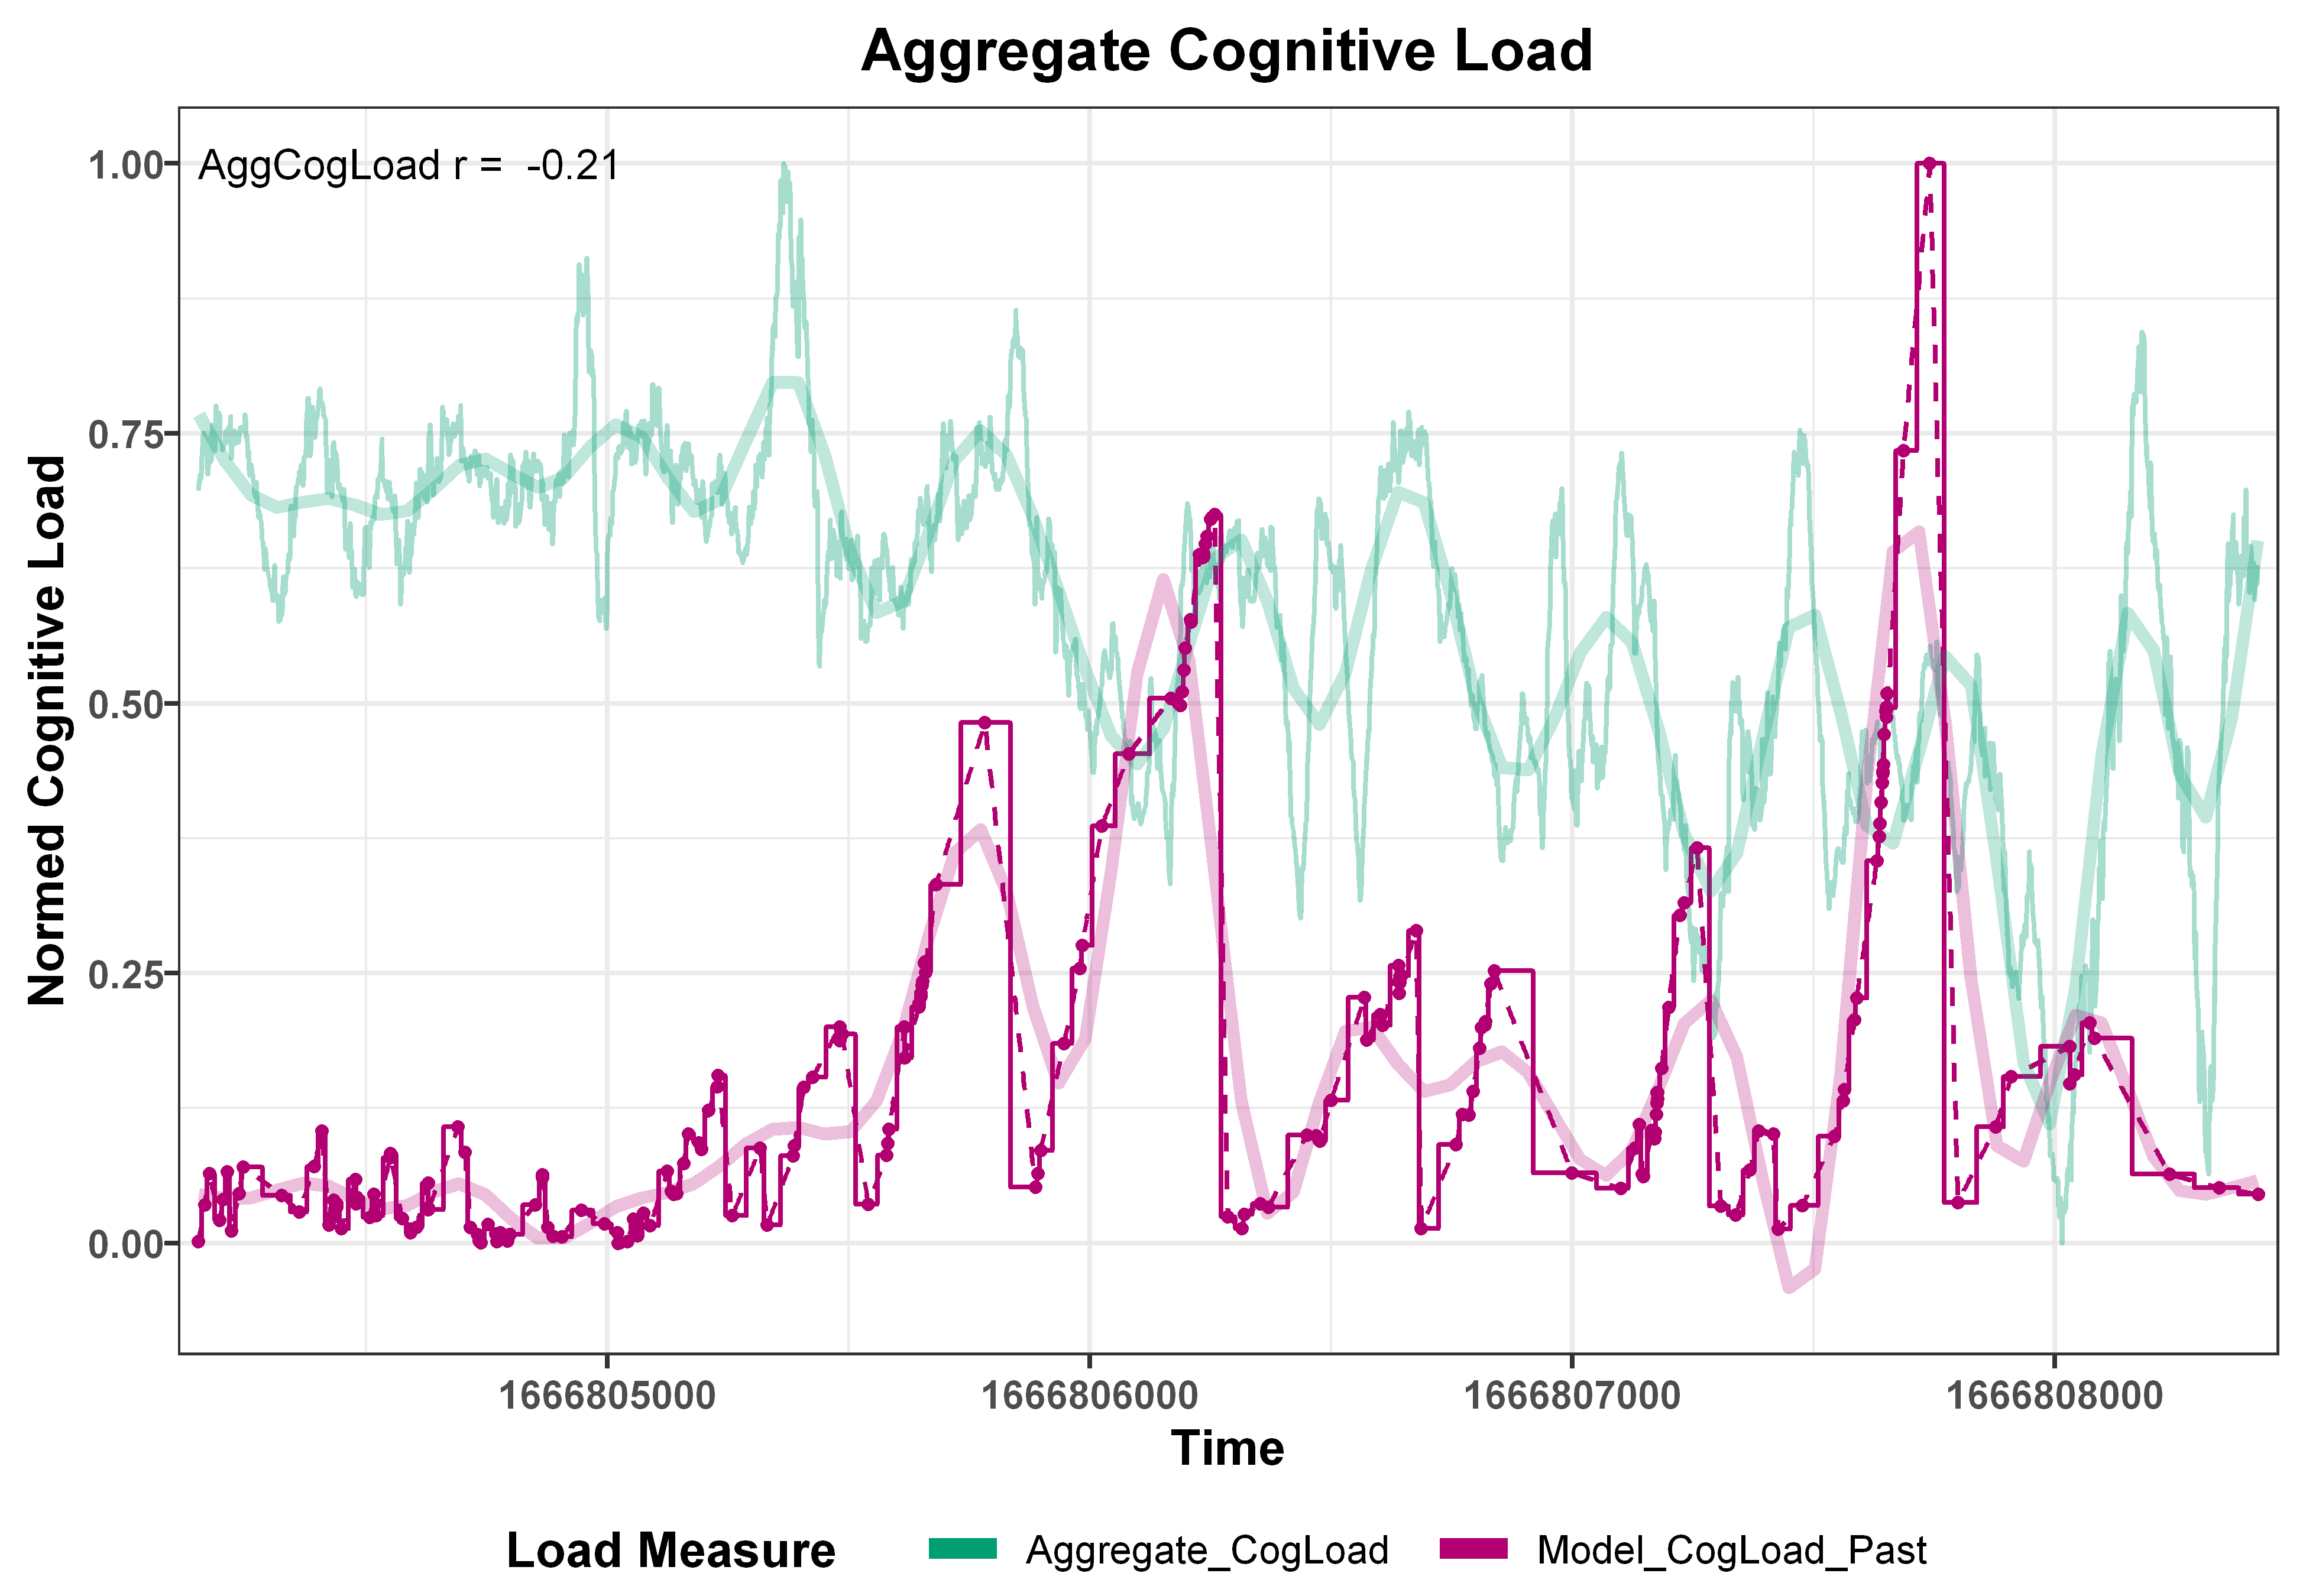

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 008    -0.05980077            -0.04952568            -0.1125138              
  Engagement_r_Past_interp
1 -0.1145093

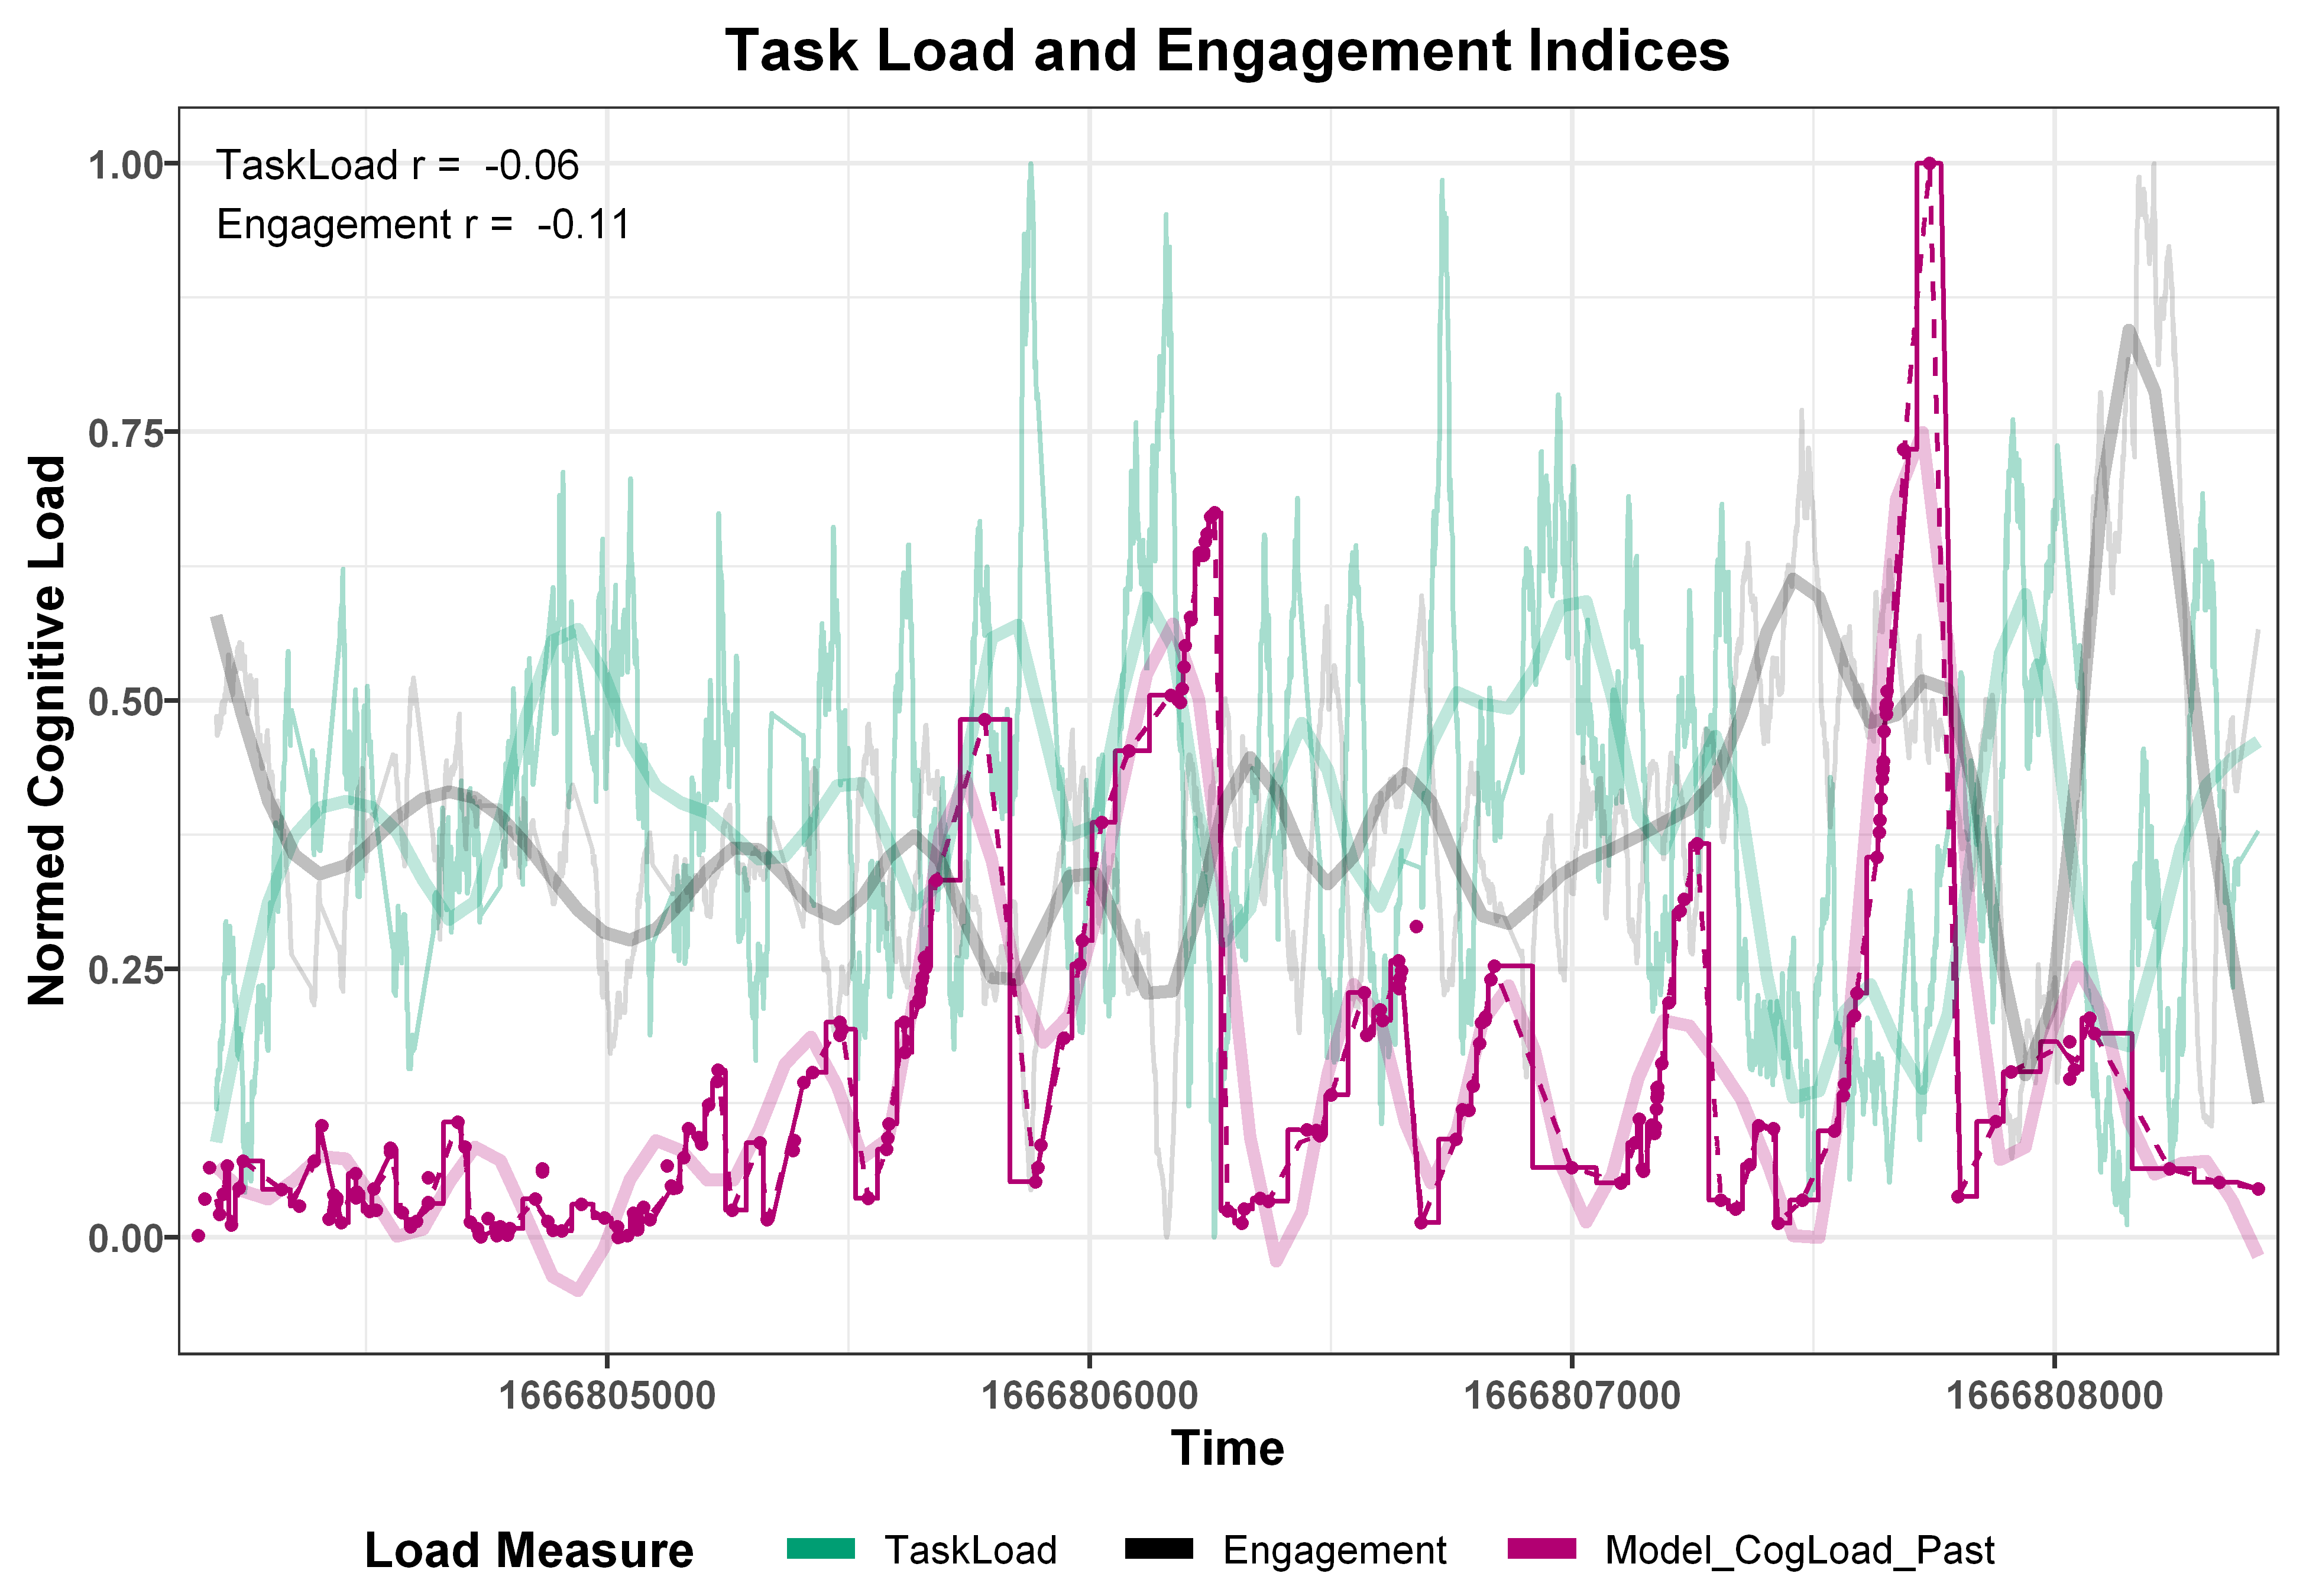

In [19]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_008, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_008 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_008, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
cogload_data <- subset(cogload_data, Time>=min(model_data_008$Time) & Time<=max(model_data_008$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_008, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_008$Time) & Time<=max(model_data_008$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_008 <- data

load_corrs_008 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_008 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_008$r_Past_rolled[1],2)), hjust = 0, size=3)
load_008

load_corrs_008

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_008 <- data

eng_corrs_008 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_008 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_008$TaskLoad_r_Past_rolled[1],2)), hjust = 0, size=3) +
                annotate("text", x = min(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_008$Engagement_r_Past_rolled[1],2)), hjust = 0, size=3)

eng_008

eng_corrs_008

# Subject 009

The following `from` values were not present in `x`: Point_of_Interest_Analysis_5, Point_of_Interest_Analysis_6

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



UserID r          
1 009    -0.06735113

Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 26 rows containing missing values (geom_point)."


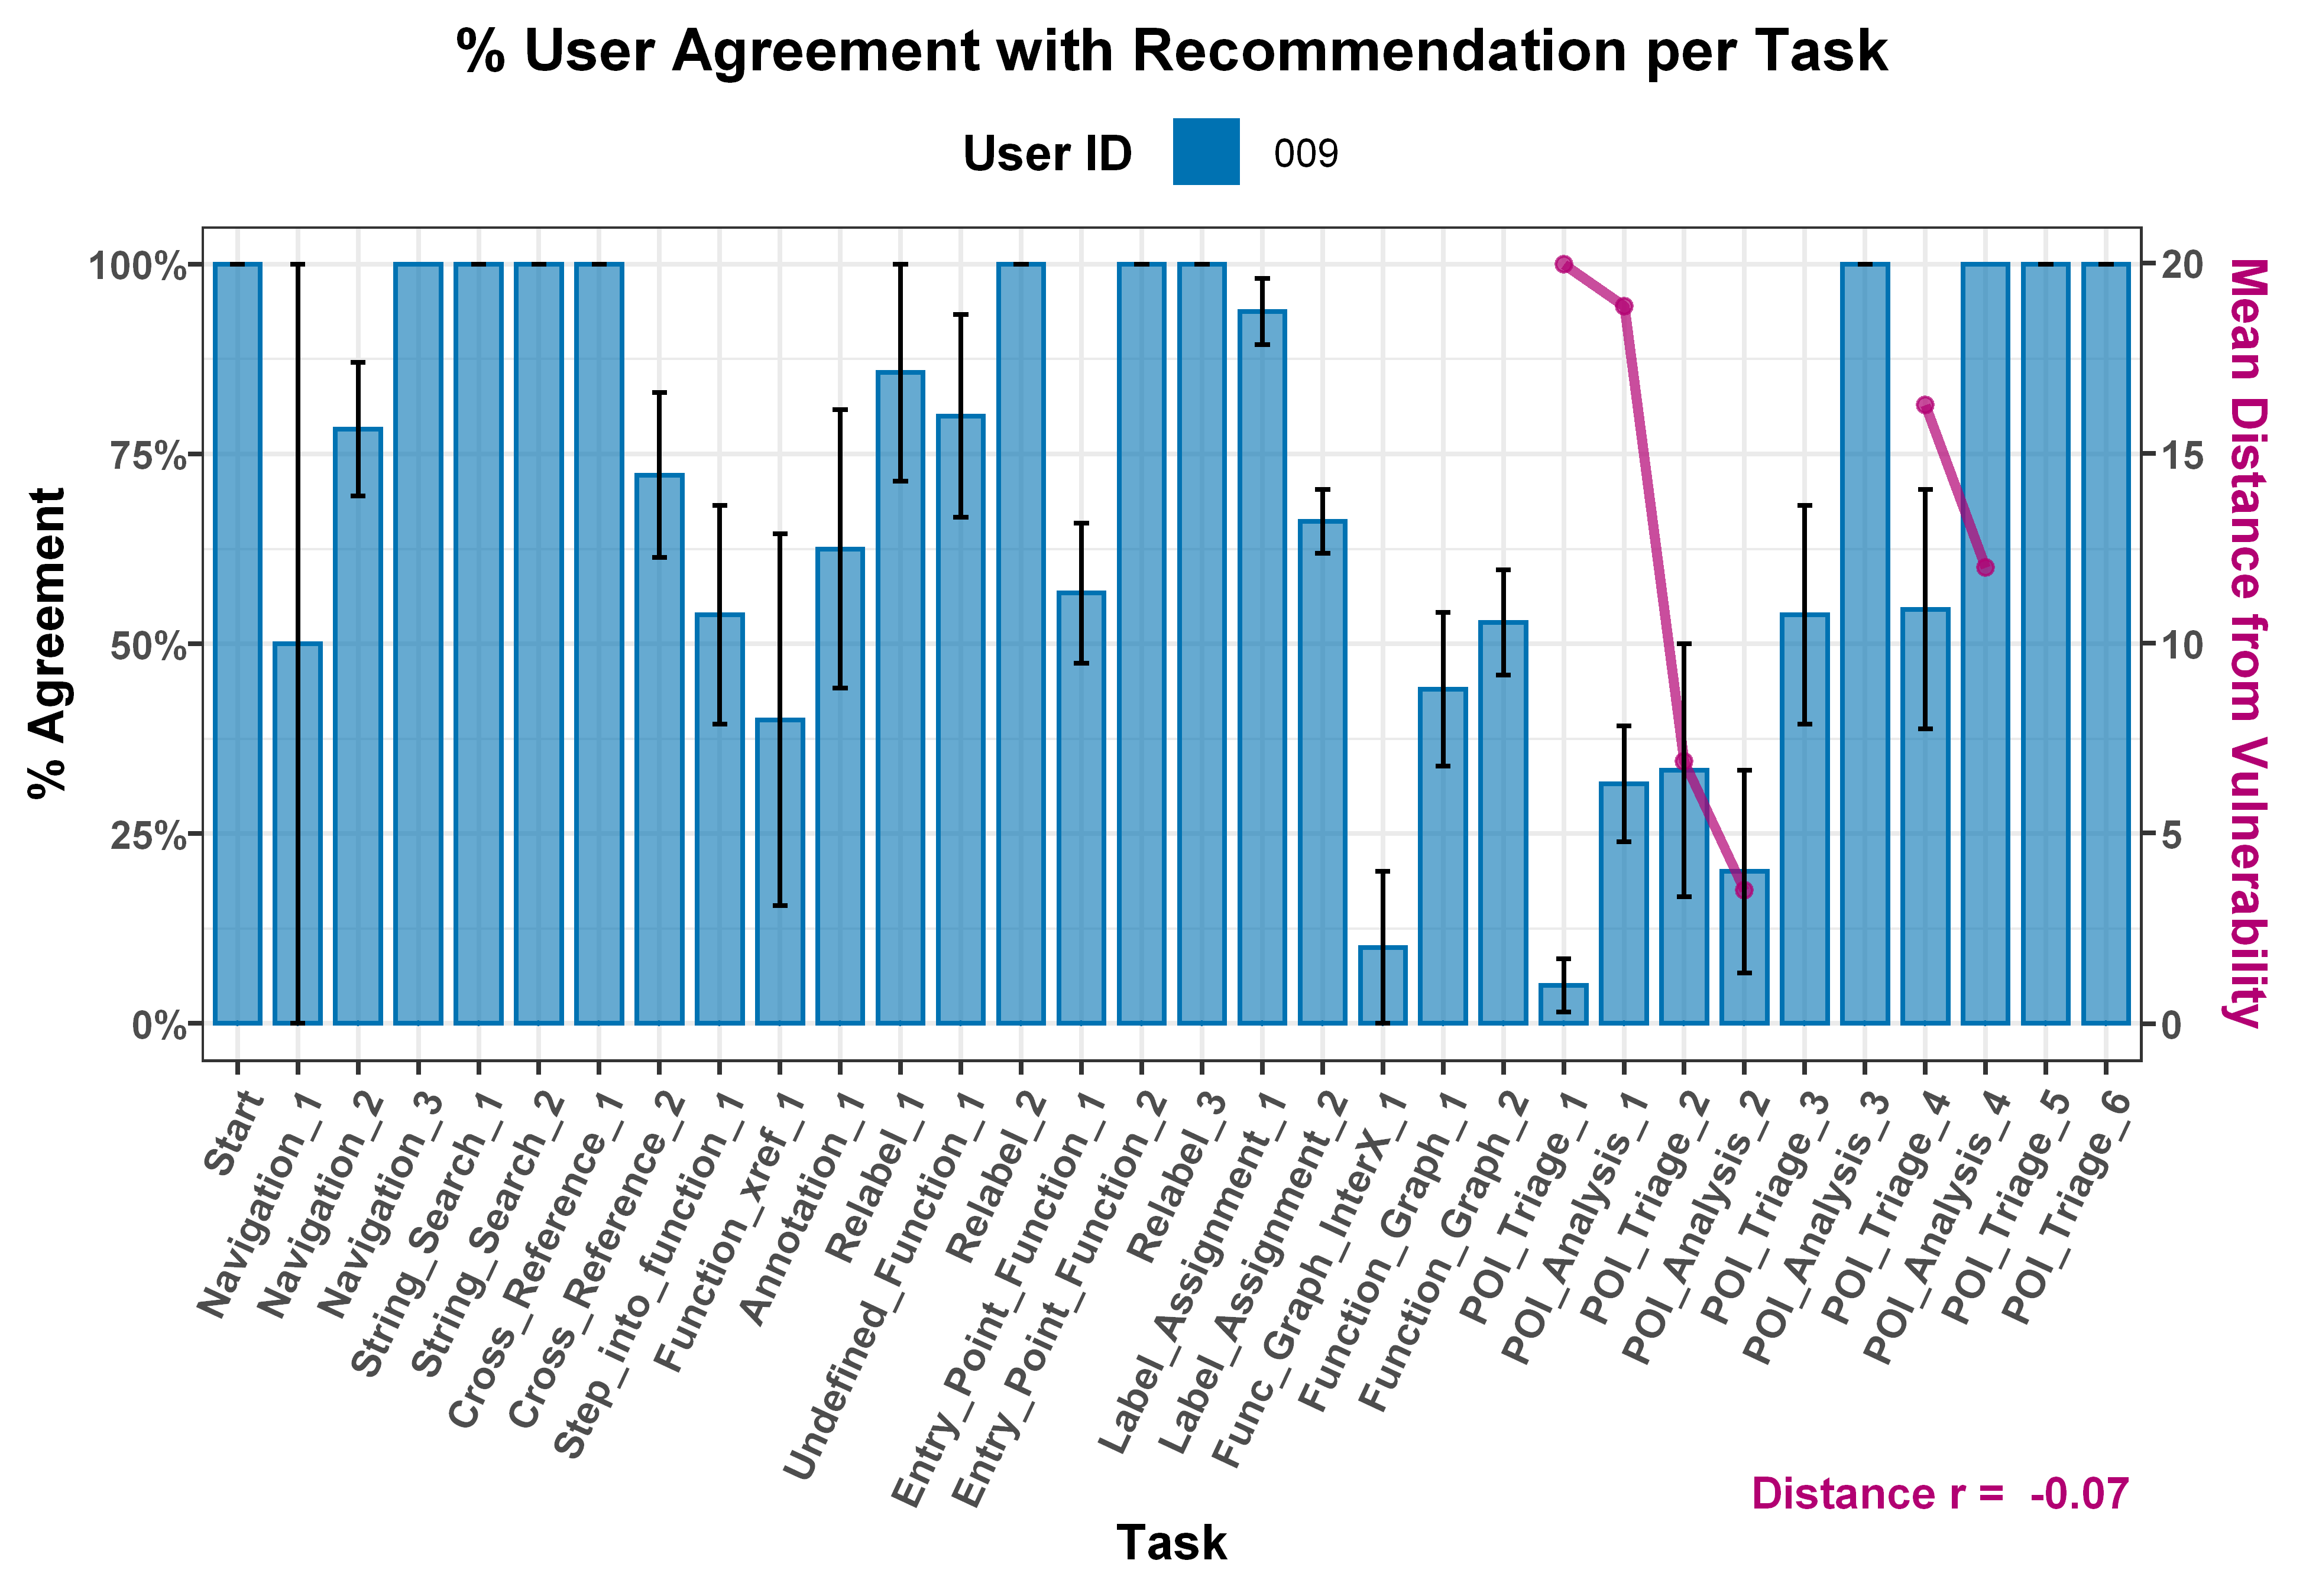

In [45]:
## Mean agreement per task (w/expert initialization)
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

data <- summaryBy(Match_Any ~ UserID + Task, data=subset(model_data_009, TaskActionNum!=1&Task!="Ghidra_User_Preferences_1"), keep.names=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
data$Match_Any.se <- data$Match_Any.sd / sqrt(data$Match_Any.length)
data$Task <- factor(data$Task, levels = data$Task)
#levels(data$Task)
data$Task <- revalue(data$Task, c(Function_Graph_Interaction_1="Func_Graph_InterX_1",
                                  Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                  Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                  Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                  Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                  Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                  Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data <- summaryBy(AssemblyDist ~ UserID + Task, data = dist_data_009, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

data_009 <- merge(data, dist_data, by = c("Task","UserID"), all.x = TRUE, sort=FALSE)

coeff <- max(dist_data$AssemblyDist.mean)

agg_corrs_009 <- subset(data_009, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>% group_by(UserID) %>%
            summarise(r = cor(Match_Any.mean, AssemblyDist.mean, use="pairwise.complete.obs"))
agg_corrs_009

agg_009 <- ggplot(data = data_009, aes(x=Task, y=Match_Any.mean, group=UserID, color=UserID, fill=UserID)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0,color=UserID), size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean - Match_Any.se, ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("Distance r = ", round(agg_corrs_009$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5),
                  plot.tag.position = c(0.85, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg_009

UserID r_Past_rolled r_Past_interp
1 009    0.3157764     0.3222446

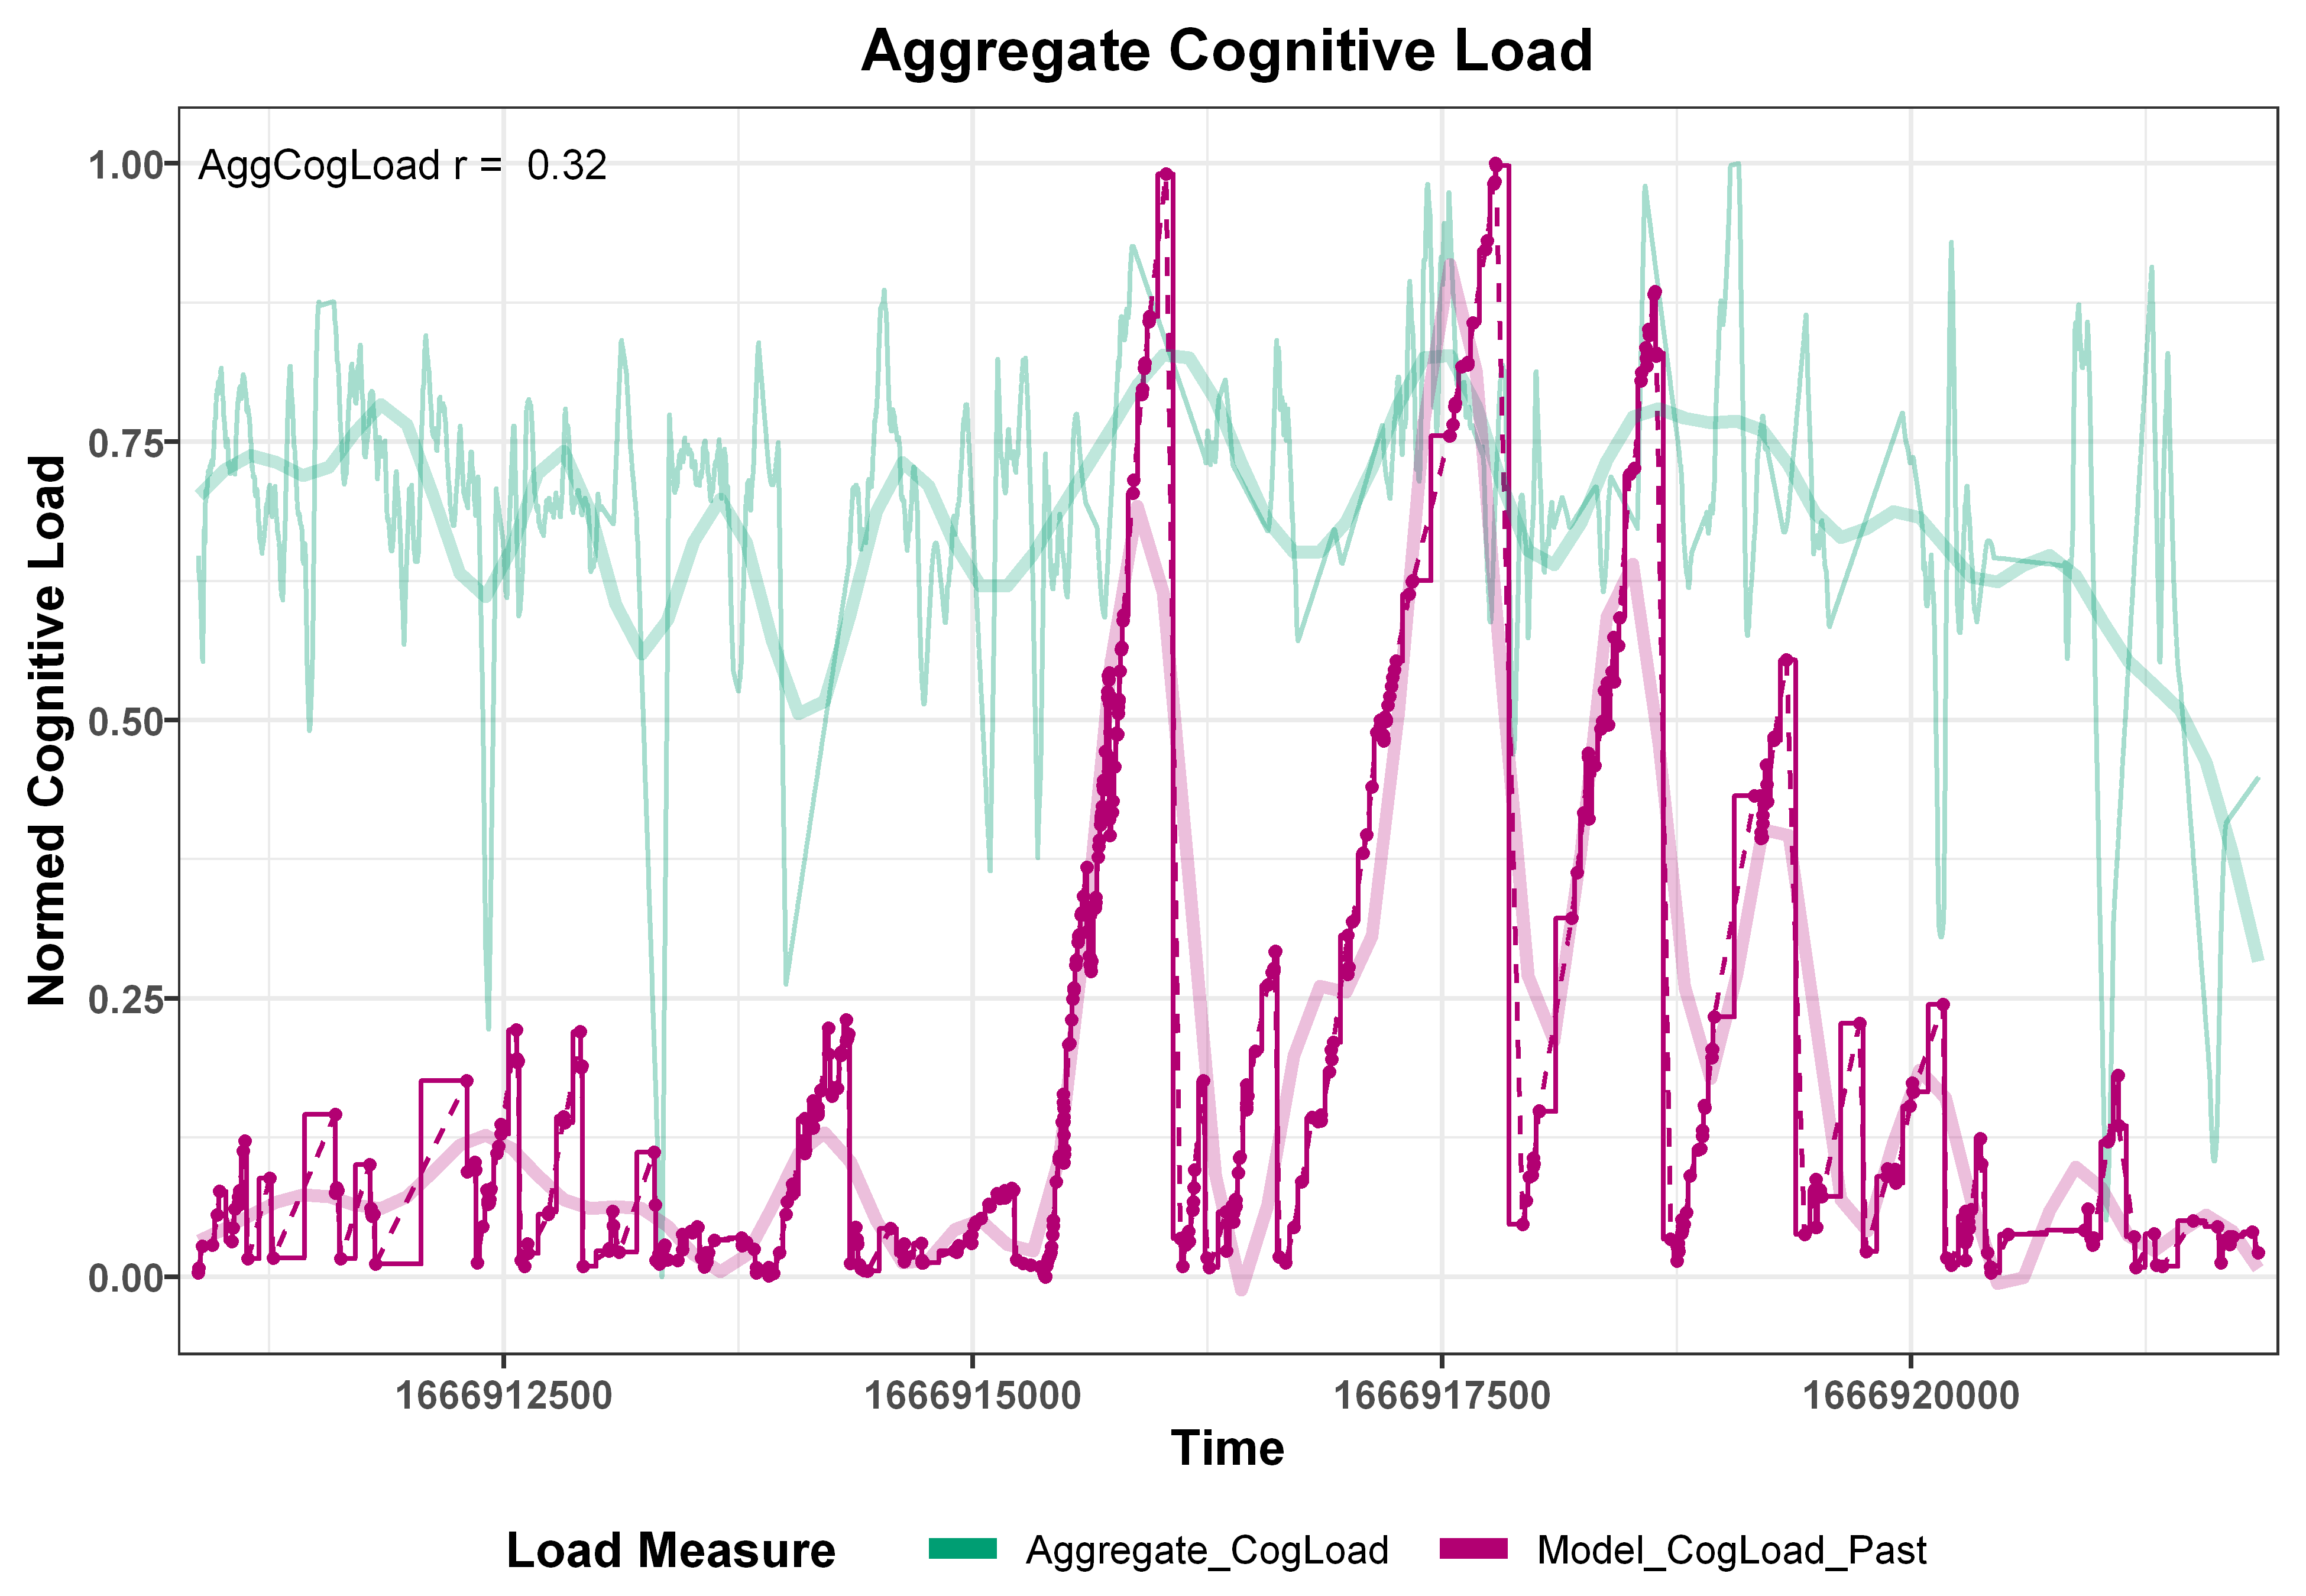

UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Engagement_r_Past_rolled
1 009    0.2967077              0.2970227              -0.2310003              
  Engagement_r_Past_interp
1 -0.2260533

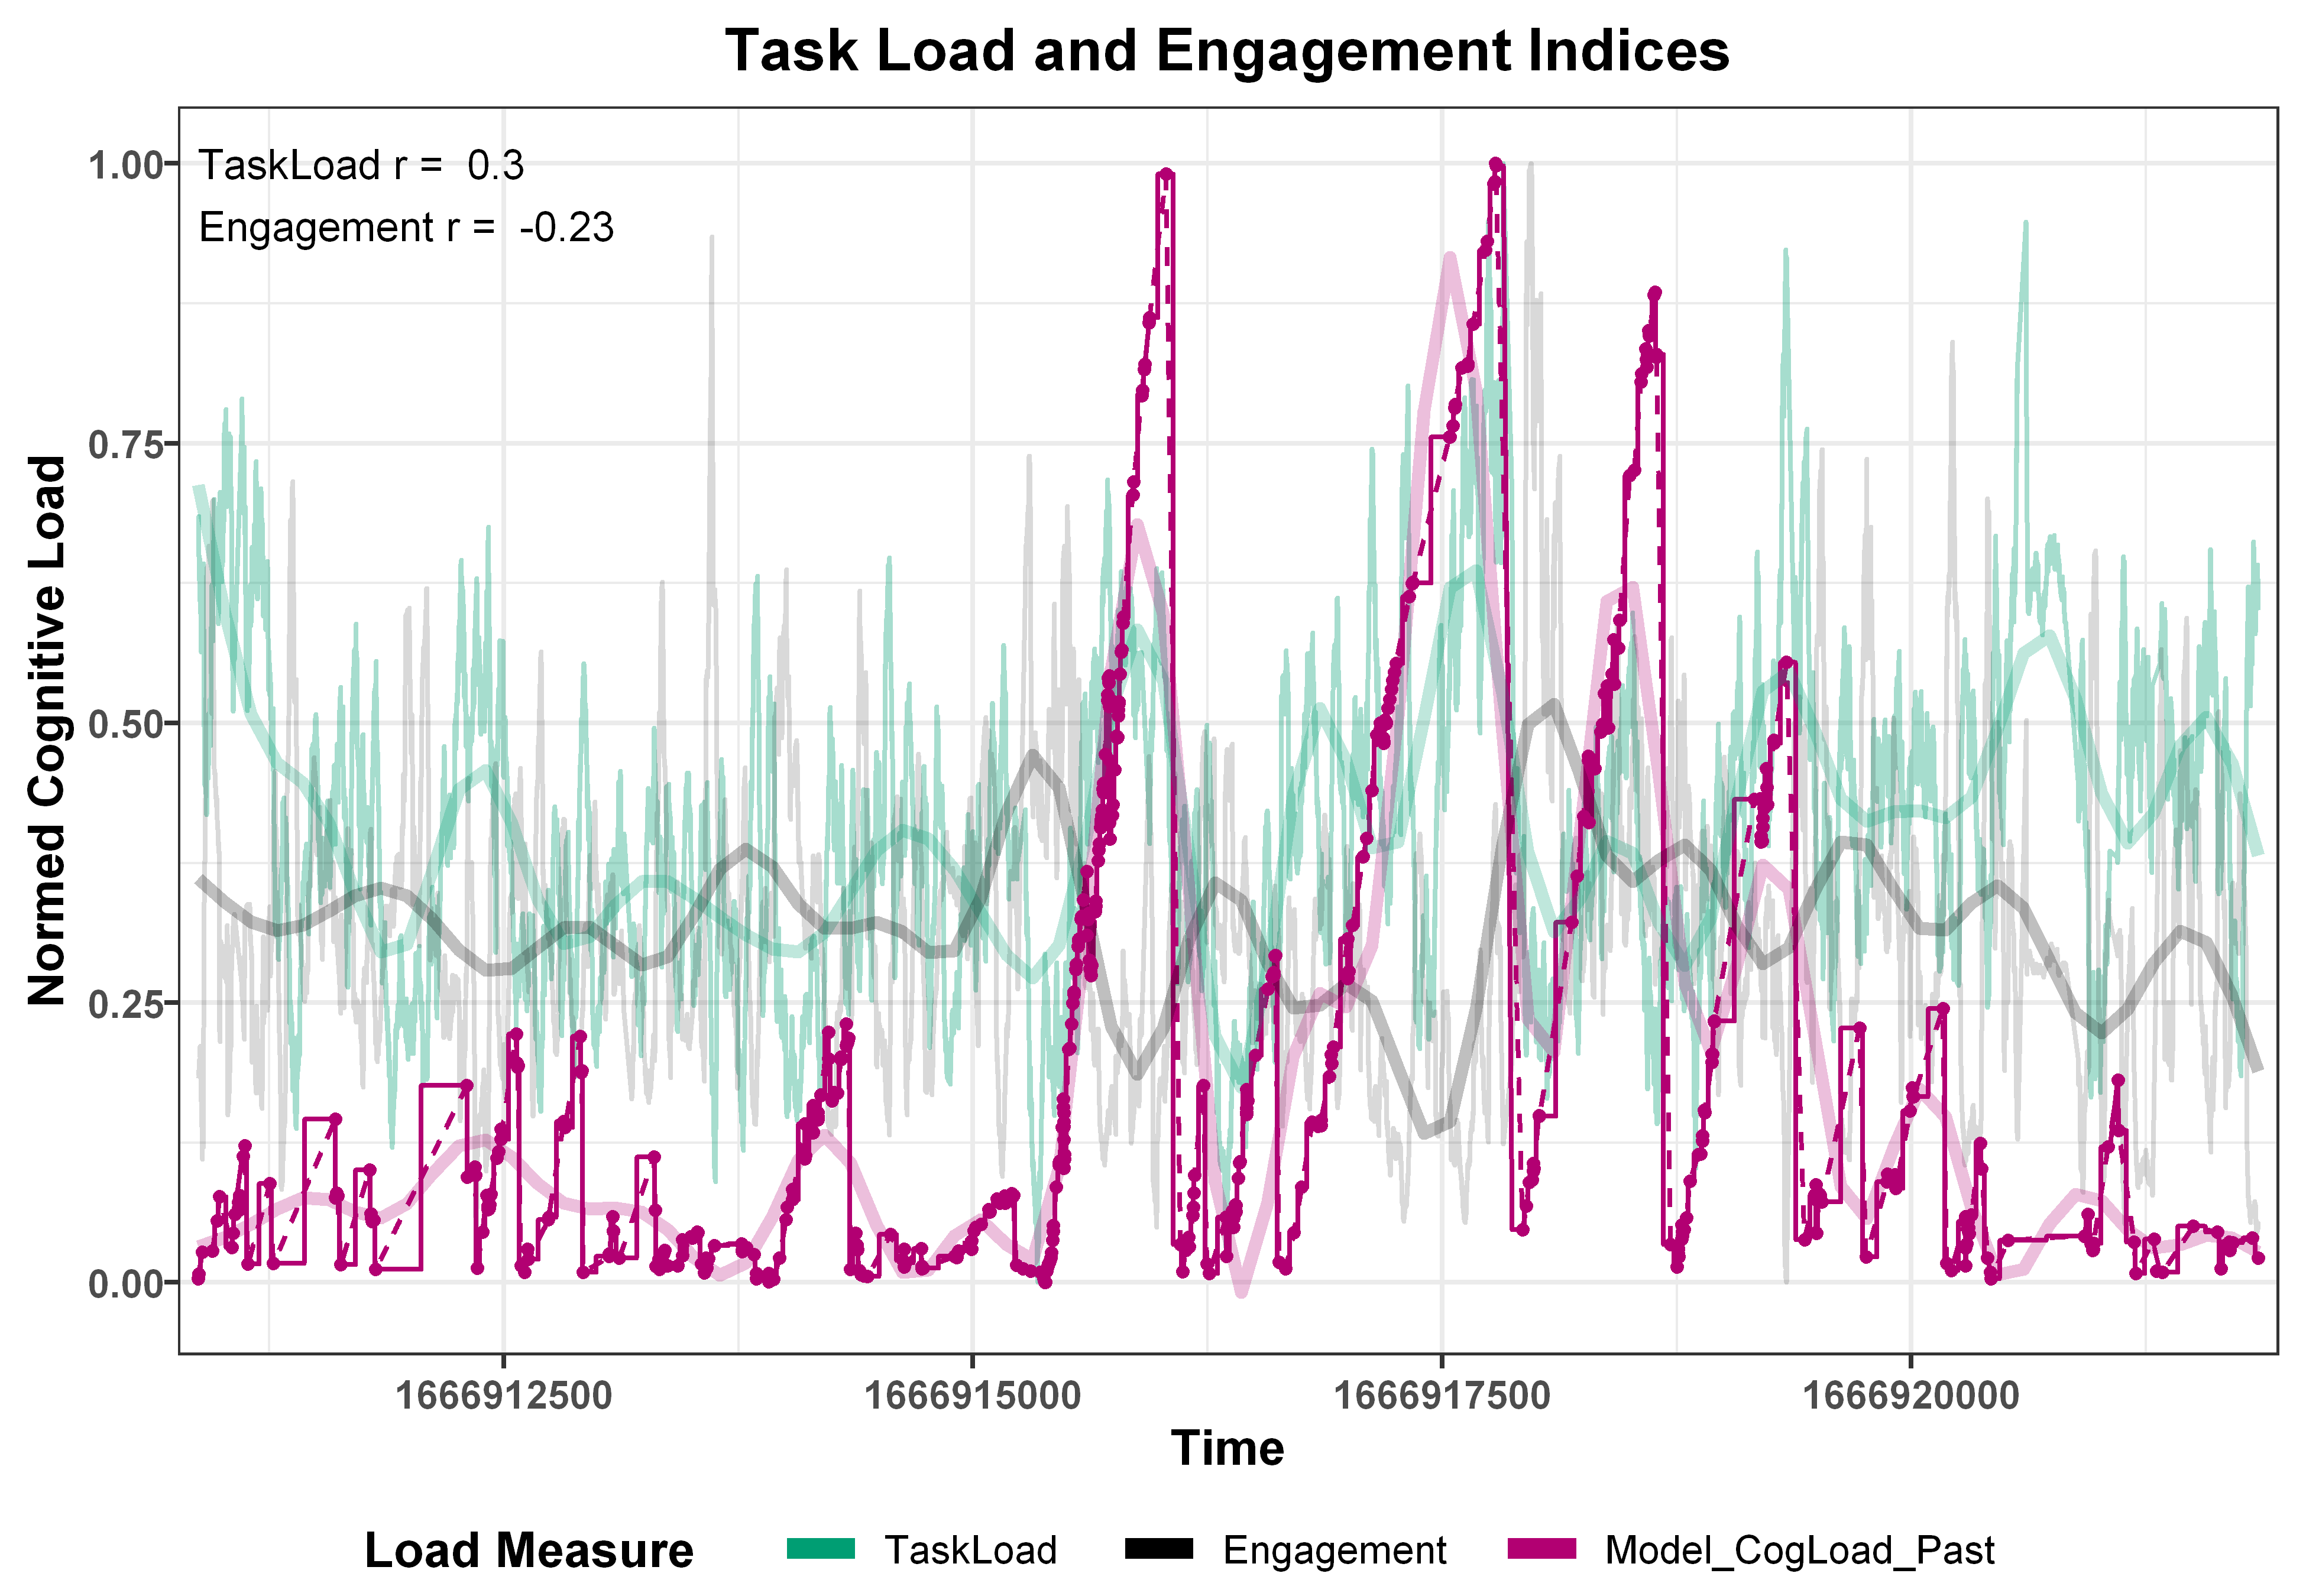

In [21]:
options(repr.plot.width=6.5, repr.plot.height=4.5, repr.plot.res=600)

## Cognitive Load Correlations
model_data <- summaryBy(Past_CogLoad ~ UserID + Time, data=model_data_009, keep.names=TRUE, order=FALSE)
model_data$Past_CogLoad_normed = (model_data$Past_CogLoad-min(model_data$Past_CogLoad))/(max(model_data$Past_CogLoad)-min(model_data$Past_CogLoad))
model_data <- summaryBy(Past_CogLoad_normed ~ UserID + Time, data=model_data, keep.names=TRUE, order=FALSE)
#head(model_data)
model_load_data_009 <- model_data

cogload_data <- summaryBy(Agg_cogLoad ~ UserID + Time, data=cogload_data_009, keep.names=TRUE, order=FALSE)
cogload_data$Agg_cogLoad <- ifelse(cogload_data$Agg_cogLoad>(10*sd(cogload_data$Agg_cogLoad)), NA,cogload_data$Agg_cogLoad)
cogload_data <- cogload_data %>% group_by(UserID) %>% mutate(Agg_cogLoad_ma = rollmean(Agg_cogLoad,k=40,align="right",fill=NA))
cogload_data <- na.omit(cogload_data)
cogload_data <- subset(cogload_data, Time>=min(model_data_009$Time) & Time<=max(model_data_009$Time))
cogload_data$Agg_cogLoad_normed = (cogload_data$Agg_cogLoad_ma-min(cogload_data$Agg_cogLoad_ma))/(max(cogload_data$Agg_cogLoad_ma)-min(cogload_data$Agg_cogLoad_ma))
cogload_data <- summaryBy(Agg_cogLoad_normed ~ UserID + Time, data=cogload_data, keep.names=TRUE, order=FALSE)
#head(cogload_data)

eng_taskload_data <- summaryBy(TaskLoad + Engagement ~ UserID + Time, data=eng_taskload_data_009, keep.names=TRUE, order=FALSE)
eng_taskload_data$TaskLoad <- ifelse(eng_taskload_data$TaskLoad>(10*sd(eng_taskload_data$TaskLoad)), NA,eng_taskload_data$TaskLoad)
eng_taskload_data$Engagement <- ifelse(eng_taskload_data$Engagement>(10*sd(eng_taskload_data$Engagement)), NA,eng_taskload_data$Engagement)
eng_taskload_data <- eng_taskload_data %>% group_by(UserID) %>% mutate(TaskLoad_ma = rollmean(TaskLoad,k=80,align="right",fill=NA),Engagement_ma = rollmean(Engagement,k=80,align="right",fill=NA))
eng_taskload_data <- na.omit(eng_taskload_data)
eng_taskload_data <- subset(eng_taskload_data, Time>=min(model_data_009$Time) & Time<=max(model_data_009$Time))
#summary(eng_taskload_data$Engagement)
eng_taskload_data$TaskLoad_normed = (eng_taskload_data$TaskLoad_ma-min(eng_taskload_data$TaskLoad_ma))/(max(eng_taskload_data$TaskLoad_ma)-min(eng_taskload_data$TaskLoad_ma))
eng_taskload_data$Engagement_normed = (eng_taskload_data$Engagement_ma-min(eng_taskload_data$Engagement_ma))/(max(eng_taskload_data$Engagement_ma)-min(eng_taskload_data$Engagement_ma))
eng_taskload_data <- summaryBy(TaskLoad_normed + Engagement_normed ~ UserID + Time, data=eng_taskload_data, keep.names=TRUE, order=FALSE)
#head(eng_taskload_data)

setDT(model_data)
setDT(cogload_data)
setDT(eng_taskload_data)

setkey(model_data, UserID, Time)
setkey(cogload_data, UserID, Time)
setkey(eng_taskload_data, UserID, Time)

###Aggregate Cognitive Load
rawdata = model_data[cogload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past","Aggregate_CogLoad")
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("Aggregate_CogLoad", "Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
load_data_009 <- data

load_corrs_009 <- rawdata %>% group_by(UserID) %>%
              summarise(r_Past_rolled = cor(Agg_cogLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                r_Past_interp = cor(Agg_cogLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

load_009 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("AggCogLoad r = ", round(load_corrs_009$r_Past_rolled[1],2)), hjust = 0, size=3)
load_009

load_corrs_009

###Task Load Index
rawdata = model_data[eng_taskload_data, roll="nearest"]
#head(rawdata)

rawdata$Past_CogLoadInterp = unique(rawdata$UserID) %>% 
  map_df(~ approx(model_data$Time[model_data$UserID==.x], model_data$Past_CogLoad_normed[model_data$UserID==.x], 
                  xout=rawdata$Time[rawdata$UserID==.x]), .id="UserID") %>% .$y

#head(rawdata)
data <- melt(rawdata, id.var=c("UserID", "Time"))
#head(data)
#levels(data$variable)
data$condition <- ifelse(data$variable=="Past_CogLoad_normed"|data$variable=="Past_CogLoadInterp","Model_CogLoad_Past",
                               ifelse(data$variable=="TaskLoad_normed","TaskLoad","Engagement"))
data$type <- ifelse(data$variable=="Past_CogLoad_normed","rolled",
                    ifelse(data$variable=="Past_CogLoadInterp","interpolated",
                           "norm"))
data$condition <- factor(data$condition, levels=c("TaskLoad","Engagement","Model_CogLoad_Past"))
data$type <- factor(data$type, levels=c("norm","rolled","interpolated"))
#head(data)
eng_data_009 <- data

eng_corrs_009 <- rawdata %>% group_by(UserID) %>%
              summarise(TaskLoad_r_Past_rolled = cor(TaskLoad_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                TaskLoad_r_Past_interp = cor(TaskLoad_normed, Past_CogLoadInterp, use="pairwise.complete.obs"),
                Engagement_r_Past_rolled = cor(Engagement_normed, Past_CogLoad_normed, use="pairwise.complete.obs"),
                Engagement_r_Past_interp = cor(Engagement_normed, Past_CogLoadInterp, use="pairwise.complete.obs"))

eng_009 <- ggplot(data=data, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.15,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                theme_bw() + ggtitle("Task Load and Engagement Indices") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-25),
                      plot.title = element_text(size=12, hjust = 0.5)) +
                annotate("text", x = min(data$Time), y = max(data$value), label = paste("TaskLoad r = ", round(eng_corrs_009$TaskLoad_r_Past_rolled[1],2)), hjust = 0, size=3) +
                annotate("text", x = min(data$Time), y = max(data$value)-0.055, label = paste("Engagement r = ", round(eng_corrs_009$Engagement_r_Past_rolled[1],2)), hjust = 0, size=3)

eng_009

eng_corrs_009

Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to min; returning Inf"
Warning message in currFUN(x, ...):
"no non-missing arguments to 

r        
1 -0.883658

Warning message:
"Removed 26 row(s) containing missing values (geom_path)."
Warning message:
"Removed 28 rows containing missing values (geom_point)."


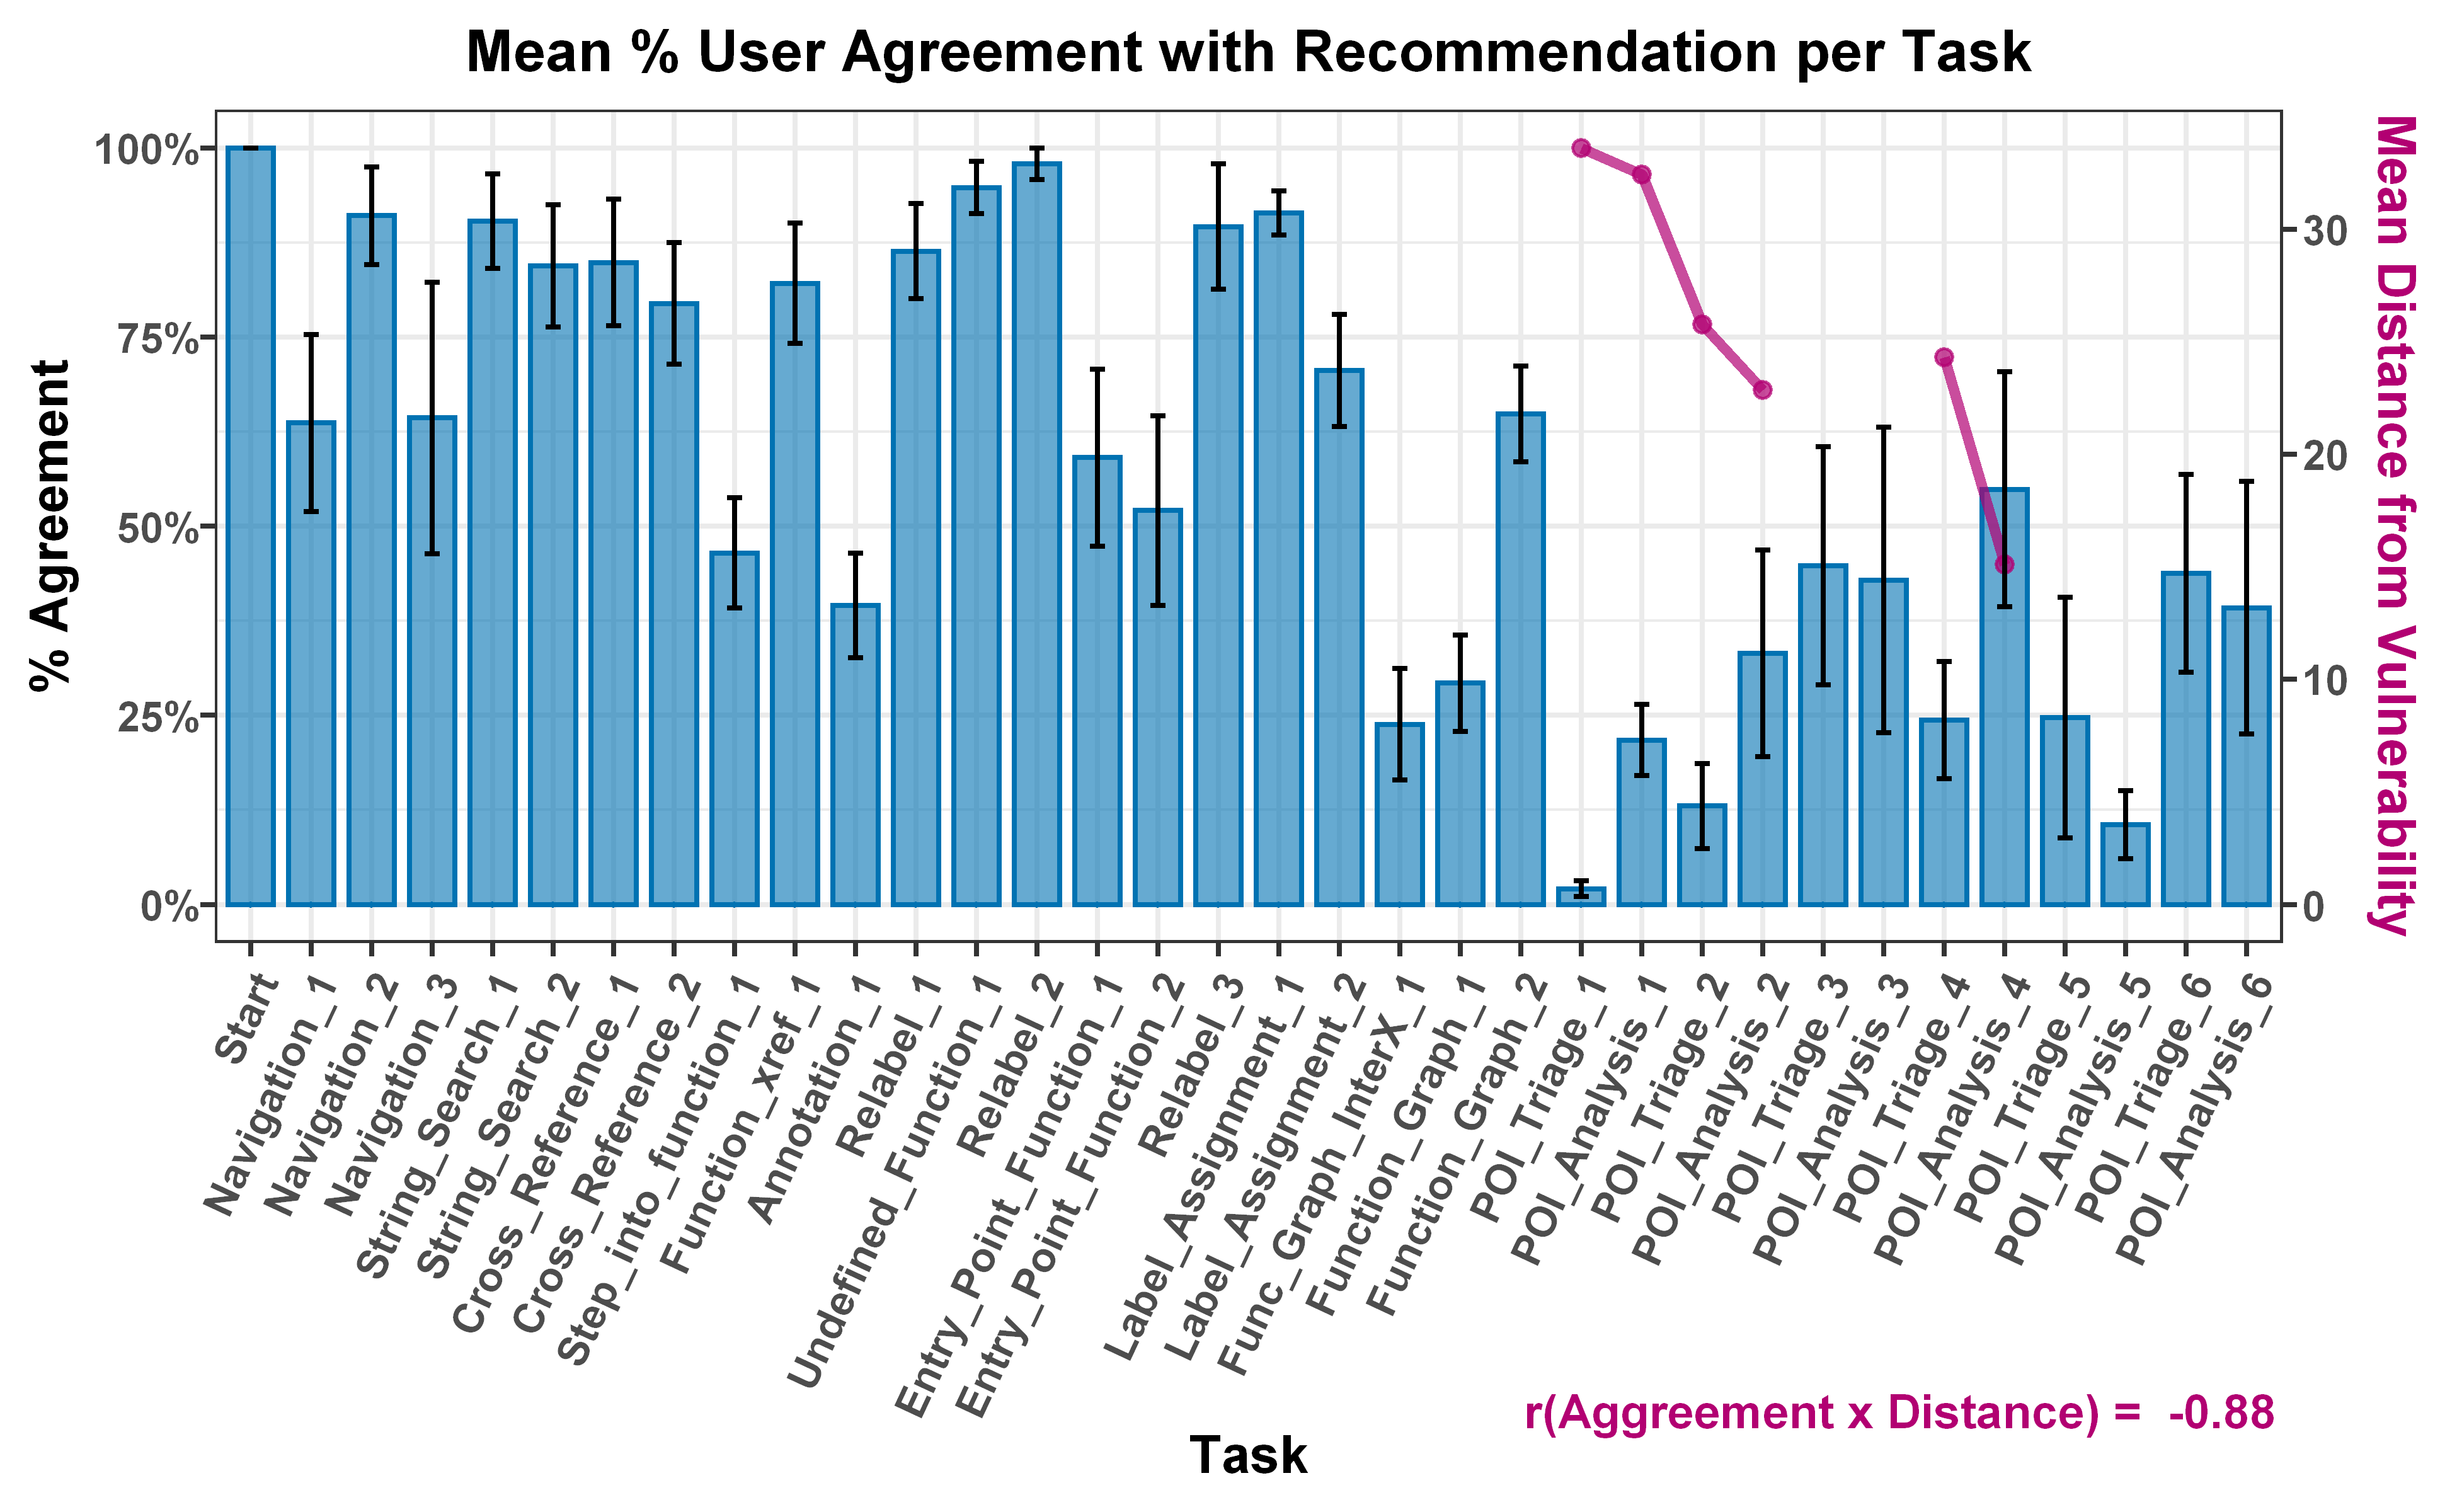

In [46]:
options(repr.plot.width=6.5, repr.plot.height=4, repr.plot.res=600)

agg_data_full <- rbind(data_002,data_003,data_004,data_005,data_006,data_007,data_008,data_009)
#head(agg_data)
length2 <- function (x, na.rm=FALSE) {
    if (na.rm) sum(!is.na(x))
    else       length(x)
}

agg_data <- summaryBy(Match_Any.mean + AssemblyDist.mean ~ Task, data=agg_data_full, keep.names=TRUE, order=FALSE, FUN=c(length2, sum, mean, sd, min, max), na.rm=TRUE)
agg_data$Match_Any.mean.se <- agg_data$Match_Any.mean.sd / sqrt(agg_data$Match_Any.mean.length2)
#head(agg_data)
agg_data$Task <- factor(agg_data$Task, c('Start','Navigation_1','Navigation_2','Navigation_3','String_Search_1','String_Search_2','Cross_Reference_1','Cross_Reference_2','Step_into_function_1','Function_xref_1','Annotation_1','Relabel_1','Undefined_Function_1','Relabel_2','Entry_Point_Function_1','Entry_Point_Function_2','Relabel_3','Label_Assignment_1','Label_Assignment_2','Func_Graph_InterX_1','Function_Graph_1','Function_Graph_2','POI_Triage_1','POI_Analysis_1','POI_Triage_2','POI_Analysis_2','POI_Triage_3','POI_Analysis_3','POI_Triage_4','POI_Analysis_4','POI_Triage_5','POI_Analysis_5','POI_Triage_6','POI_Analysis_6'))
coeff <- max(agg_data$AssemblyDist.mean.mean,na.rm=TRUE)
#coeff

agg_corrs <- subset(agg_data, Task=="POI_Triage_1"|Task=="POI_Analysis_1"|
                      Task=="POI_Triage_2"|Task=="POI_Analysis_2"|
                      Task=="POI_Triage_3"|Task=="POI_Analysis_3"|
                      Task=="POI_Triage_4"|Task=="POI_Analysis_4"|
                      Task=="POI_Triage_5"|Task=="POI_Analysis_5"|
                      Task=="POI_Triage_6"|Task=="POI_Analysis_6") %>%
            summarise(r = cor(Match_Any.mean.mean, AssemblyDist.mean.mean, use="pairwise.complete.obs"))
agg_corrs

agg <- ggplot(data = agg_data, aes(x=Task, y=Match_Any.mean.mean)) +
            geom_col(aes(y=Match_Any.mean.mean), color="#0072B2", fill=alpha("#0072B2",0.6), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean.mean/coeff, group=1), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0),color="#0072B2", size=0) +
            geom_errorbar(aes(ymin = Match_Any.mean.mean - Match_Any.mean.se, ymax = Match_Any.mean.mean + Match_Any.mean.se), colour="black", size=.50, width=.25) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            labs(tag = paste("r(Aggreement x Distance) = ", round(agg_corrs$r[1],2))) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            theme_bw() + ggtitle("Mean % User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=8, angle = 65, vjust = 1.0, hjust=1), 
                  axis.text.y.left = element_text(size=8, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=8, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=11, hjust = 0.5),
                  plot.tag.position = c(0.78, 0.05),
                  plot.tag = element_text(size=9, color = "#B20072"))
agg

Task           UserID Match_Any.length Match_Any.sum Match_Any.mean
1 POI_Triage_1   002    28               0             0.0000000     
2 POI_Analysis_1 002     8               3             0.3750000     
3 POI_Analysis_2 002     2               1             0.5000000     
4 POI_Triage_4   002    31               6             0.1935484     
5 POI_Analysis_4 002     2               2             1.0000000     
6 Start          002     2               2             1.0000000     
  Match_Any.sd Match_Any.min Match_Any.max Match_Any.se AssemblyDist.length
1 0.0000000    0             0             0.00000000   28                 
2 0.5175492    0             1             0.18298126    8                 
3 0.7071068    0             1             0.50000000    2                 
4 0.4016097    0             1             0.07213123   31                 
5 0.0000000    1             1             0.00000000    2                 
6 0.0000000    1             1             0.00000000   NA                 
  AssemblyDist.sum AssemblyDist.mean AssemblyDist.sd AssemblyDist.min
1 308              11.00000          16.604328       -1              
2 103              12.87500          16.039572       -1              
3  18               9.00000           7.071068        4              
4 383              12.35484          17.402200       -1              
5  24              12.00000           0.000000       12              
6  NA                    NA                 NA       NA              
  AssemblyDist.max
1 46              
2 46              
3 14              
4 55              
5 12              
6 NA

[1] "Start"                  "Navigation_1"           "Navigation_2"          
 [4] "Navigation_3"           "String_Search_1"        "String_Search_2"       
 [7] "Cross_Reference_1"      "Cross_Reference_2"      "Step_into_function_1"  
[10] "Function_xref_1"        "Annotation_1"           "Relabel_1"             
[13] "Undefined_Function_1"   "Relabel_2"              "Entry_Point_Function_1"
[16] "Entry_Point_Function_2" "Relabel_3"              "Label_Assignment_1"    
[19] "Label_Assignment_2"     "Func_Graph_InterX_1"    "Function_Graph_1"      
[22] "Function_Graph_2"       "POI_Triage_1"           "POI_Analysis_1"        
[25] "POI_Analysis_2"         "POI_Triage_3"           "POI_Analysis_3"        
[28] "POI_Triage_4"           "POI_Analysis_4"         "POI_Triage_5"          
[31] "POI_Analysis_5"         "POI_Triage_2"           "POI_Triage_6"          
[34] "POI_Analysis_6"

Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 205 rows containing missing values (geom_point)."


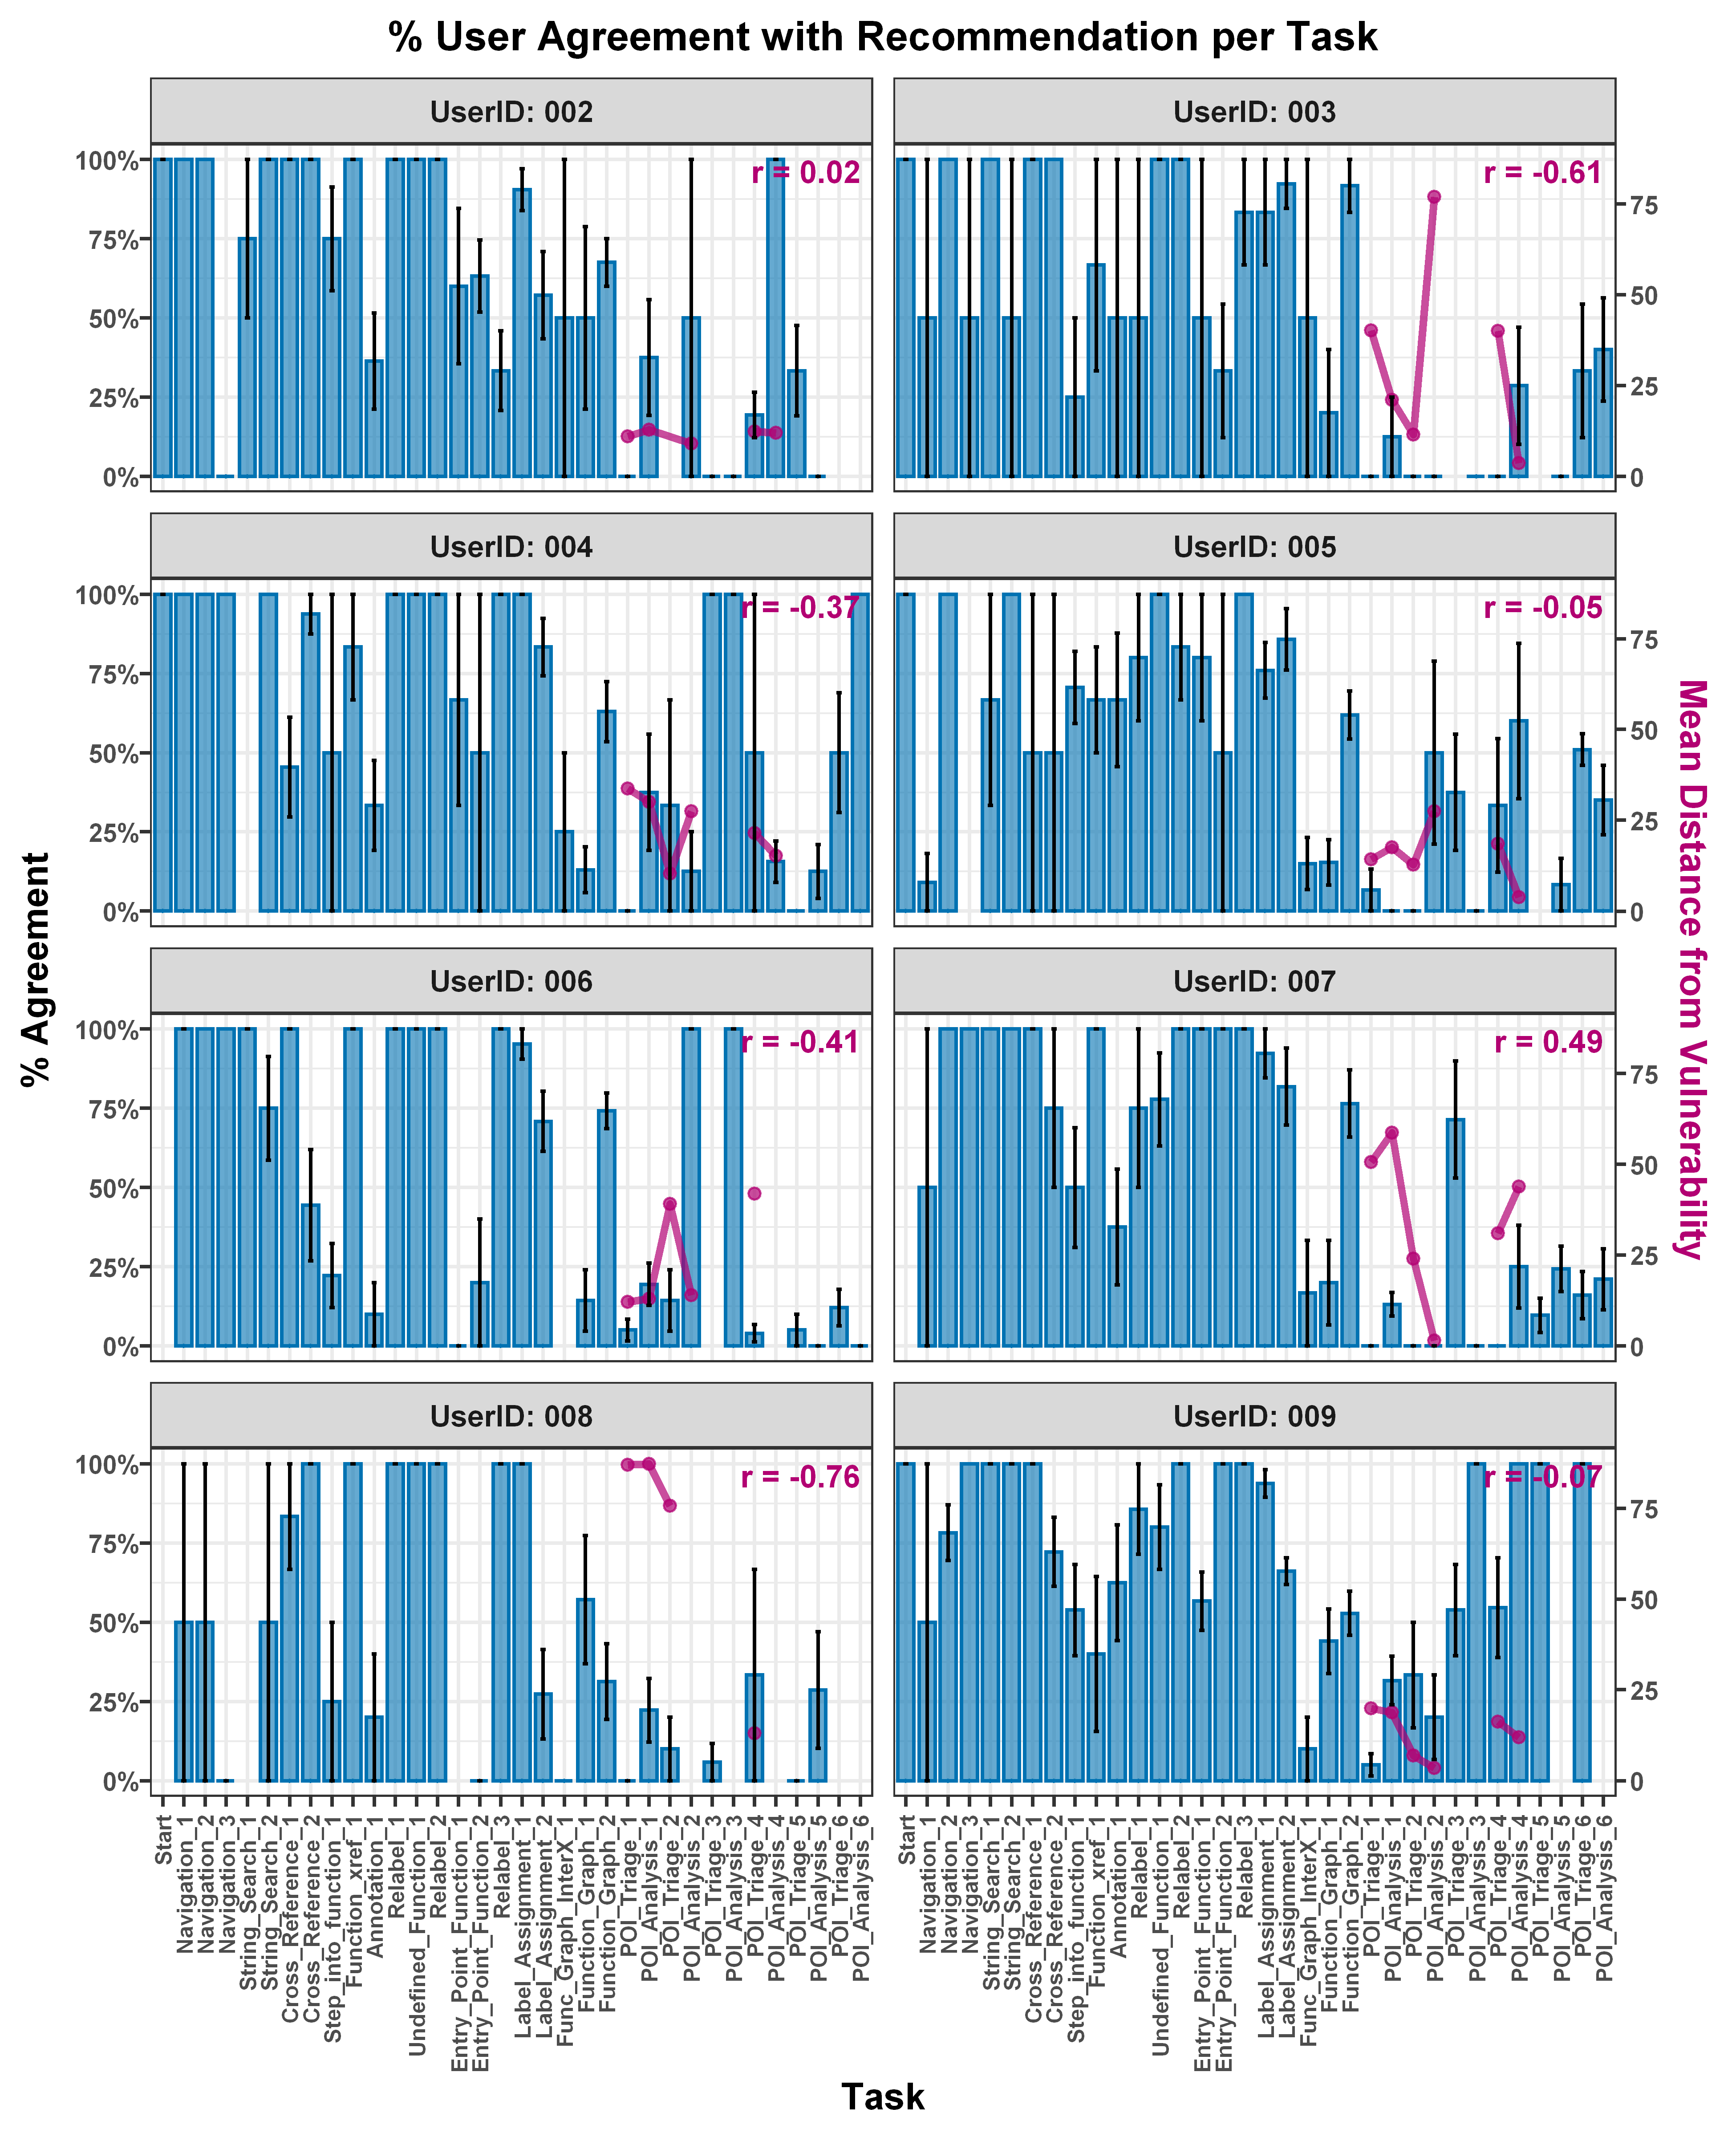

In [47]:
options(repr.plot.width=6.5, repr.plot.height=8, repr.plot.res=600)
head(agg_data_full)
levels(agg_data_full$Task)
#<- ordered(agg_data$Task, levels = c('Start','Navigation_1','Navigation_2','Navigation_3','String_Search_1','String_Search_2','Cross_Reference_1','Cross_Reference_2','Step_into_function_1','Function_xref_1','Annotation_1','Relabel_1','Undefined_Function_1','Relabel_2','Entry_Point_Function_1','Entry_Point_Function_2','Relabel_3','Label_Assignment_1','Label_Assignment_2','Func_Graph_InterX_1','Function_Graph_1','Function_Graph_2','POI_Triage_1','POI_Analysis_1','POI_Triage_2','POI_Analysis_2','POI_Triage_3','POI_Analysis_3','POI_Triage_4','POI_Analysis_4','POI_Triage_5','POI_Analysis_5','POI_Triage_6','POI_Analysis_6'))

agg_data_full$Task <- factor(agg_data_full$Task, levels=c('Start','Navigation_1','Navigation_2','Navigation_3','String_Search_1','String_Search_2','Cross_Reference_1','Cross_Reference_2','Step_into_function_1','Function_xref_1','Annotation_1','Relabel_1','Undefined_Function_1','Relabel_2','Entry_Point_Function_1','Entry_Point_Function_2','Relabel_3','Label_Assignment_1','Label_Assignment_2','Func_Graph_InterX_1','Function_Graph_1','Function_Graph_2','POI_Triage_1','POI_Analysis_1','POI_Triage_2','POI_Analysis_2','POI_Triage_3','POI_Analysis_3','POI_Triage_4','POI_Analysis_4','POI_Triage_5','POI_Analysis_5','POI_Triage_6','POI_Analysis_6'))

agg_corrs_full <- rbind(agg_corrs_002,agg_corrs_003,agg_corrs_004,agg_corrs_005,agg_corrs_006,agg_corrs_007,agg_corrs_008,agg_corrs_009)
agg_corrs_full$Task <- "POI_Analysis_6"
agg_corrs_full$Match_Any.mean <- 1.0 

coeff <- max(agg_data_full$AssemblyDist.mean,na.rm=TRUE)

agg_full <- ggplot(data = agg_data_full, aes(x=Task, y=Match_Any.mean)) + labs(fill="User ID",color="User ID") +
            geom_col(aes(y=Match_Any.mean), color="#0072B2", fill=alpha("#0072B2",0.6), position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_line(aes(y=AssemblyDist.mean/coeff, group=1), color="#B20072", size=1.0, alpha=0.7) +
            geom_point(aes(y=AssemblyDist.mean/coeff), color="#B20072", size=1.25, alpha=0.7) +
            geom_point(aes(y=0),color="#0072B2", size=0) +
            geom_errorbar(aes(ymin = ifelse(Match_Any.mean - Match_Any.se<0,0,Match_Any.mean - Match_Any.se), ymax = Match_Any.mean + Match_Any.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#0072B2"),0.6)) +
            scale_color_manual(values=c("#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("% Agreement") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            scale_y_continuous(limits=c(0.0,1.0), labels = scales::percent, sec.axis = sec_axis(~.*coeff,name="Mean Distance from Vulnerability")) +
            facet_wrap(. ~ UserID, ncol = 2,labeller=label_both) +
            geom_text(data = agg_corrs_full,label = paste("r =", round(agg_corrs_full$r,2)),size=3,color="#B20072",fontface='bold',vjust=1,hjust = 1) +
            theme_bw() + ggtitle("% User Agreement with Recommendation per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.title.y.right = element_text(color = "#B20072"),
                  axis.text.x = element_text(size=6, angle = 90, vjust = 0.5, hjust=1.0), 
                  axis.text.y.left = element_text(size=7, margin = margin(l=3)),
                  axis.text.y.right = element_text(size=7, margin = margin(l=1, r=3)),
                  legend.text = element_text(size=8, face="plain"),
                  legend.spacing.y = unit(0.075, 'cm'),
                  legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=11, hjust = 0.5))
agg_full

UserID variable    r          
1 002    Dist-Aggree  0.01851537
2 003    Dist-Aggree -0.61418732
3 004    Dist-Aggree -0.36548477
4 005    Dist-Aggree -0.04539383
5 006    Dist-Aggree -0.40530027
6 007    Dist-Aggree  0.49010551

variable      r.length2 r.sum      r.mean      r.sd      r.min      
1 Dist-Aggree   8         -1.7519678 -0.21899597 0.4000920 -0.76287133
2 Agg Load      7         -0.9632052 -0.13760074 0.2175815 -0.38098731
3 Agg Load int  7         -1.0277330 -0.14681900 0.2237722 -0.39033372
4 Task Load     8          0.8731514  0.10914393 0.1142561 -0.05980077
5 Task Load int 8          0.9333746  0.11667182 0.1153863 -0.04952568
6 Engagement    8         -0.5408121 -0.06760151 0.1310418 -0.23100034
  r.max    
1 0.4901055
2 0.3157764
3 0.3222446
4 0.2967077
5 0.2970227
6 0.2068021

variable    r.length2 r.sum      r.mean      r.sd      r.min       r.max    
1 Dist-Aggree 8         -1.7519678 -0.21899597 0.4000920 -0.76287133 0.4901055
2 Agg Load    7         -0.9632052 -0.13760074 0.2175815 -0.38098731 0.3157764
4 Task Load   8          0.8731514  0.10914393 0.1142561 -0.05980077 0.2967077
6 Engagement  8         -0.5408121 -0.06760151 0.1310418 -0.23100034 0.2068021
  r.se      
1 0.14145388
2 0.08223807
4 0.04039562
6 0.04633028

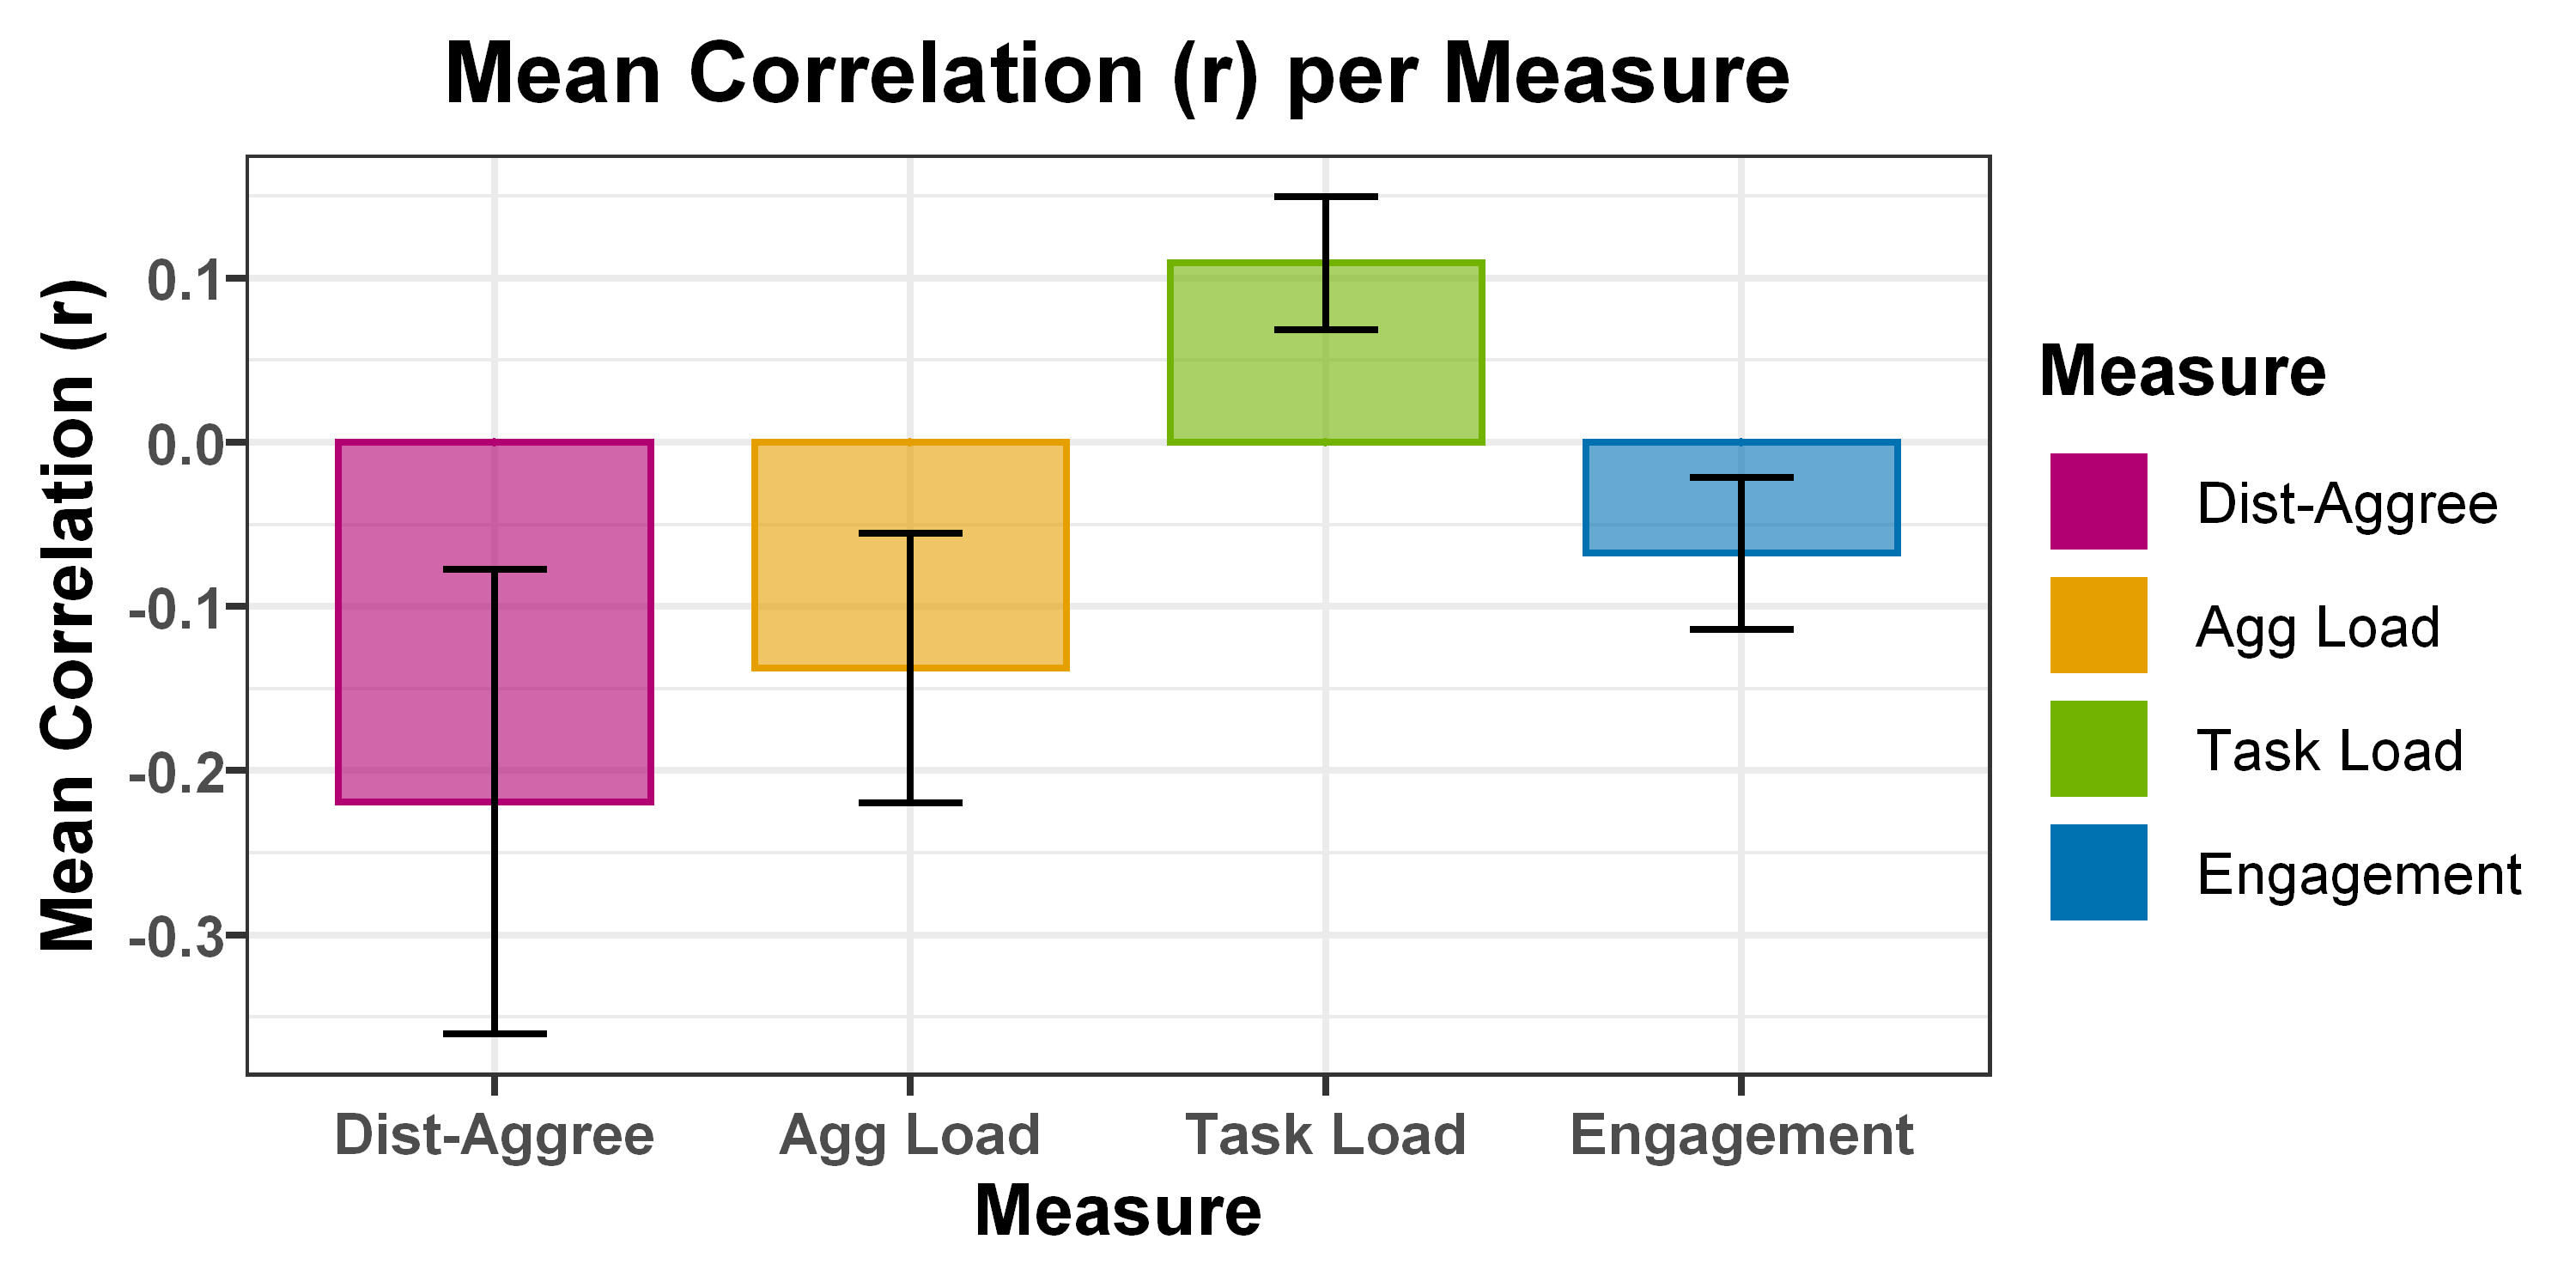

In [48]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res=600)

agg_corrs <- rbind(agg_corrs_002,agg_corrs_003,agg_corrs_004,agg_corrs_005,agg_corrs_006,agg_corrs_007,agg_corrs_008,agg_corrs_009)
#head(agg_corrs)
load_corrs <- rbind(load_corrs_002,load_corrs_003,load_corrs_004,load_corrs_005,load_corrs_006,load_corrs_007,load_corrs_008,load_corrs_009)
#head(load_corrs)
eng_corrs <- rbind(eng_corrs_002,eng_corrs_003,eng_corrs_004,eng_corrs_005,eng_corrs_006,eng_corrs_007,eng_corrs_008,eng_corrs_009)
#head(eng_corrs)
corrs_list <- list(agg_corrs,load_corrs,eng_corrs)
corrs <- Reduce(function(x, y) merge(x, y, all=TRUE), corrs_list)
#head(corrs)

corrs <- melt(corrs, na.rm = FALSE, value.name = "r", id = 'UserID')
corrs$variable <- revalue(corrs$variable, c(r="Dist-Aggree",
                                            r_Past_rolled="Agg Load",r_Past_interp="Agg Load int",
                                            TaskLoad_r_Past_rolled="Task Load",TaskLoad_r_Past_interp="Task Load int",
                                            Engagement_r_Past_rolled="Engagement",Engagement_r_Past_interp="Engagement int"))
head(corrs)
length2 <- function (x, na.rm=FALSE) {
    if (na.rm) sum(!is.na(x))
    else       length(x)
}
corrs <- summaryBy(r ~ variable, data=corrs, keep.names=TRUE, order=FALSE, FUN=c(length2, sum, mean, sd, min, max), na.rm=TRUE)
head(corrs)
corrs$r.se <- corrs$r.sd / sqrt(corrs$r.length2)
corrs <- subset(corrs, variable!="Agg Load int"&variable!="Task Load int"&variable!="Engagement int")
head(corrs)
                
c <- ggplot(data = corrs, aes(x=variable, y=r.mean, group=variable, color=variable, fill=variable)) + labs(fill="Measure",color="Measure") +
            geom_col(position=position_dodge(), width = 0.75, show.legend=FALSE) +
            geom_point(aes(y=0,color=variable), size=0) +
            geom_errorbar(aes(ymin = r.mean - r.se, ymax = r.mean + r.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#B20072","#E69F00","#72B200","#0072B2"),0.6)) +
            scale_color_manual(values=c("#B20072","#E69F00","#72B200","#0072B2")) +
            guides(color = guide_legend(override.aes = list(shape=15,size = 6))) +
            ylab("Mean Correlation (r)") + xlab("Measure") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            #scale_y_continuous(limits=c(0.0,1.0)) +
            theme_bw() + ggtitle("Mean Correlation (r) per Measure") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=2)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  #legend.spacing.y = unit(0.075, 'cm'),
                  #legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  plot.title = element_text(size=12, hjust = 0.5))
                  #plot.tag.position = c(0.85, 0.05),
                  #plot.tag = element_text(size=9, color = "#B20072"))
c

Joining, by = "UserID"

`summarise()` has grouped output by 'UserID', 'r_Past_rolled'. You can override using the `.groups` argument.

Warning message:
"Removed 1087 rows containing non-finite values (stat_smooth)."
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/Inf in foreign function call (arg 3)"
Joining, by = "UserID"

`summarise()` has grouped output by 'UserID', 'TaskLoad_r_Past_rolled'. You can override using the `.groups` argument.



UserID TaskLoad_r_Past_rolled TaskLoad_r_Past_interp Time value
1 002    0.12965860             0.12432699             0    1    
2 003    0.18831629             0.22598521             0    1    
3 004    0.04850101             0.04922265             0    1    
4 005    0.19296405             0.19522530             0    1    
5 006    0.04974638             0.05574929             0    1    
6 007    0.02705814             0.03536807             0    1

Joining, by = "UserID"

`summarise()` has grouped output by 'UserID', 'Engagement_r_Past_rolled'. You can override using the `.groups` argument.



UserID Engagement_r_Past_rolled Engagement_r_Past_interp Time value
1 002    -0.09401436              -0.09339387              0    0.9  
2 003    -0.13057704              -0.13000531              0    0.9  
3 004     0.20680206               0.21460441              0    0.9  
4 005     0.02498484               0.02405609              0    0.9  
5 006    -0.11888607              -0.12896346              0    0.9  
6 007    -0.08560734              -0.08510455              0    0.9

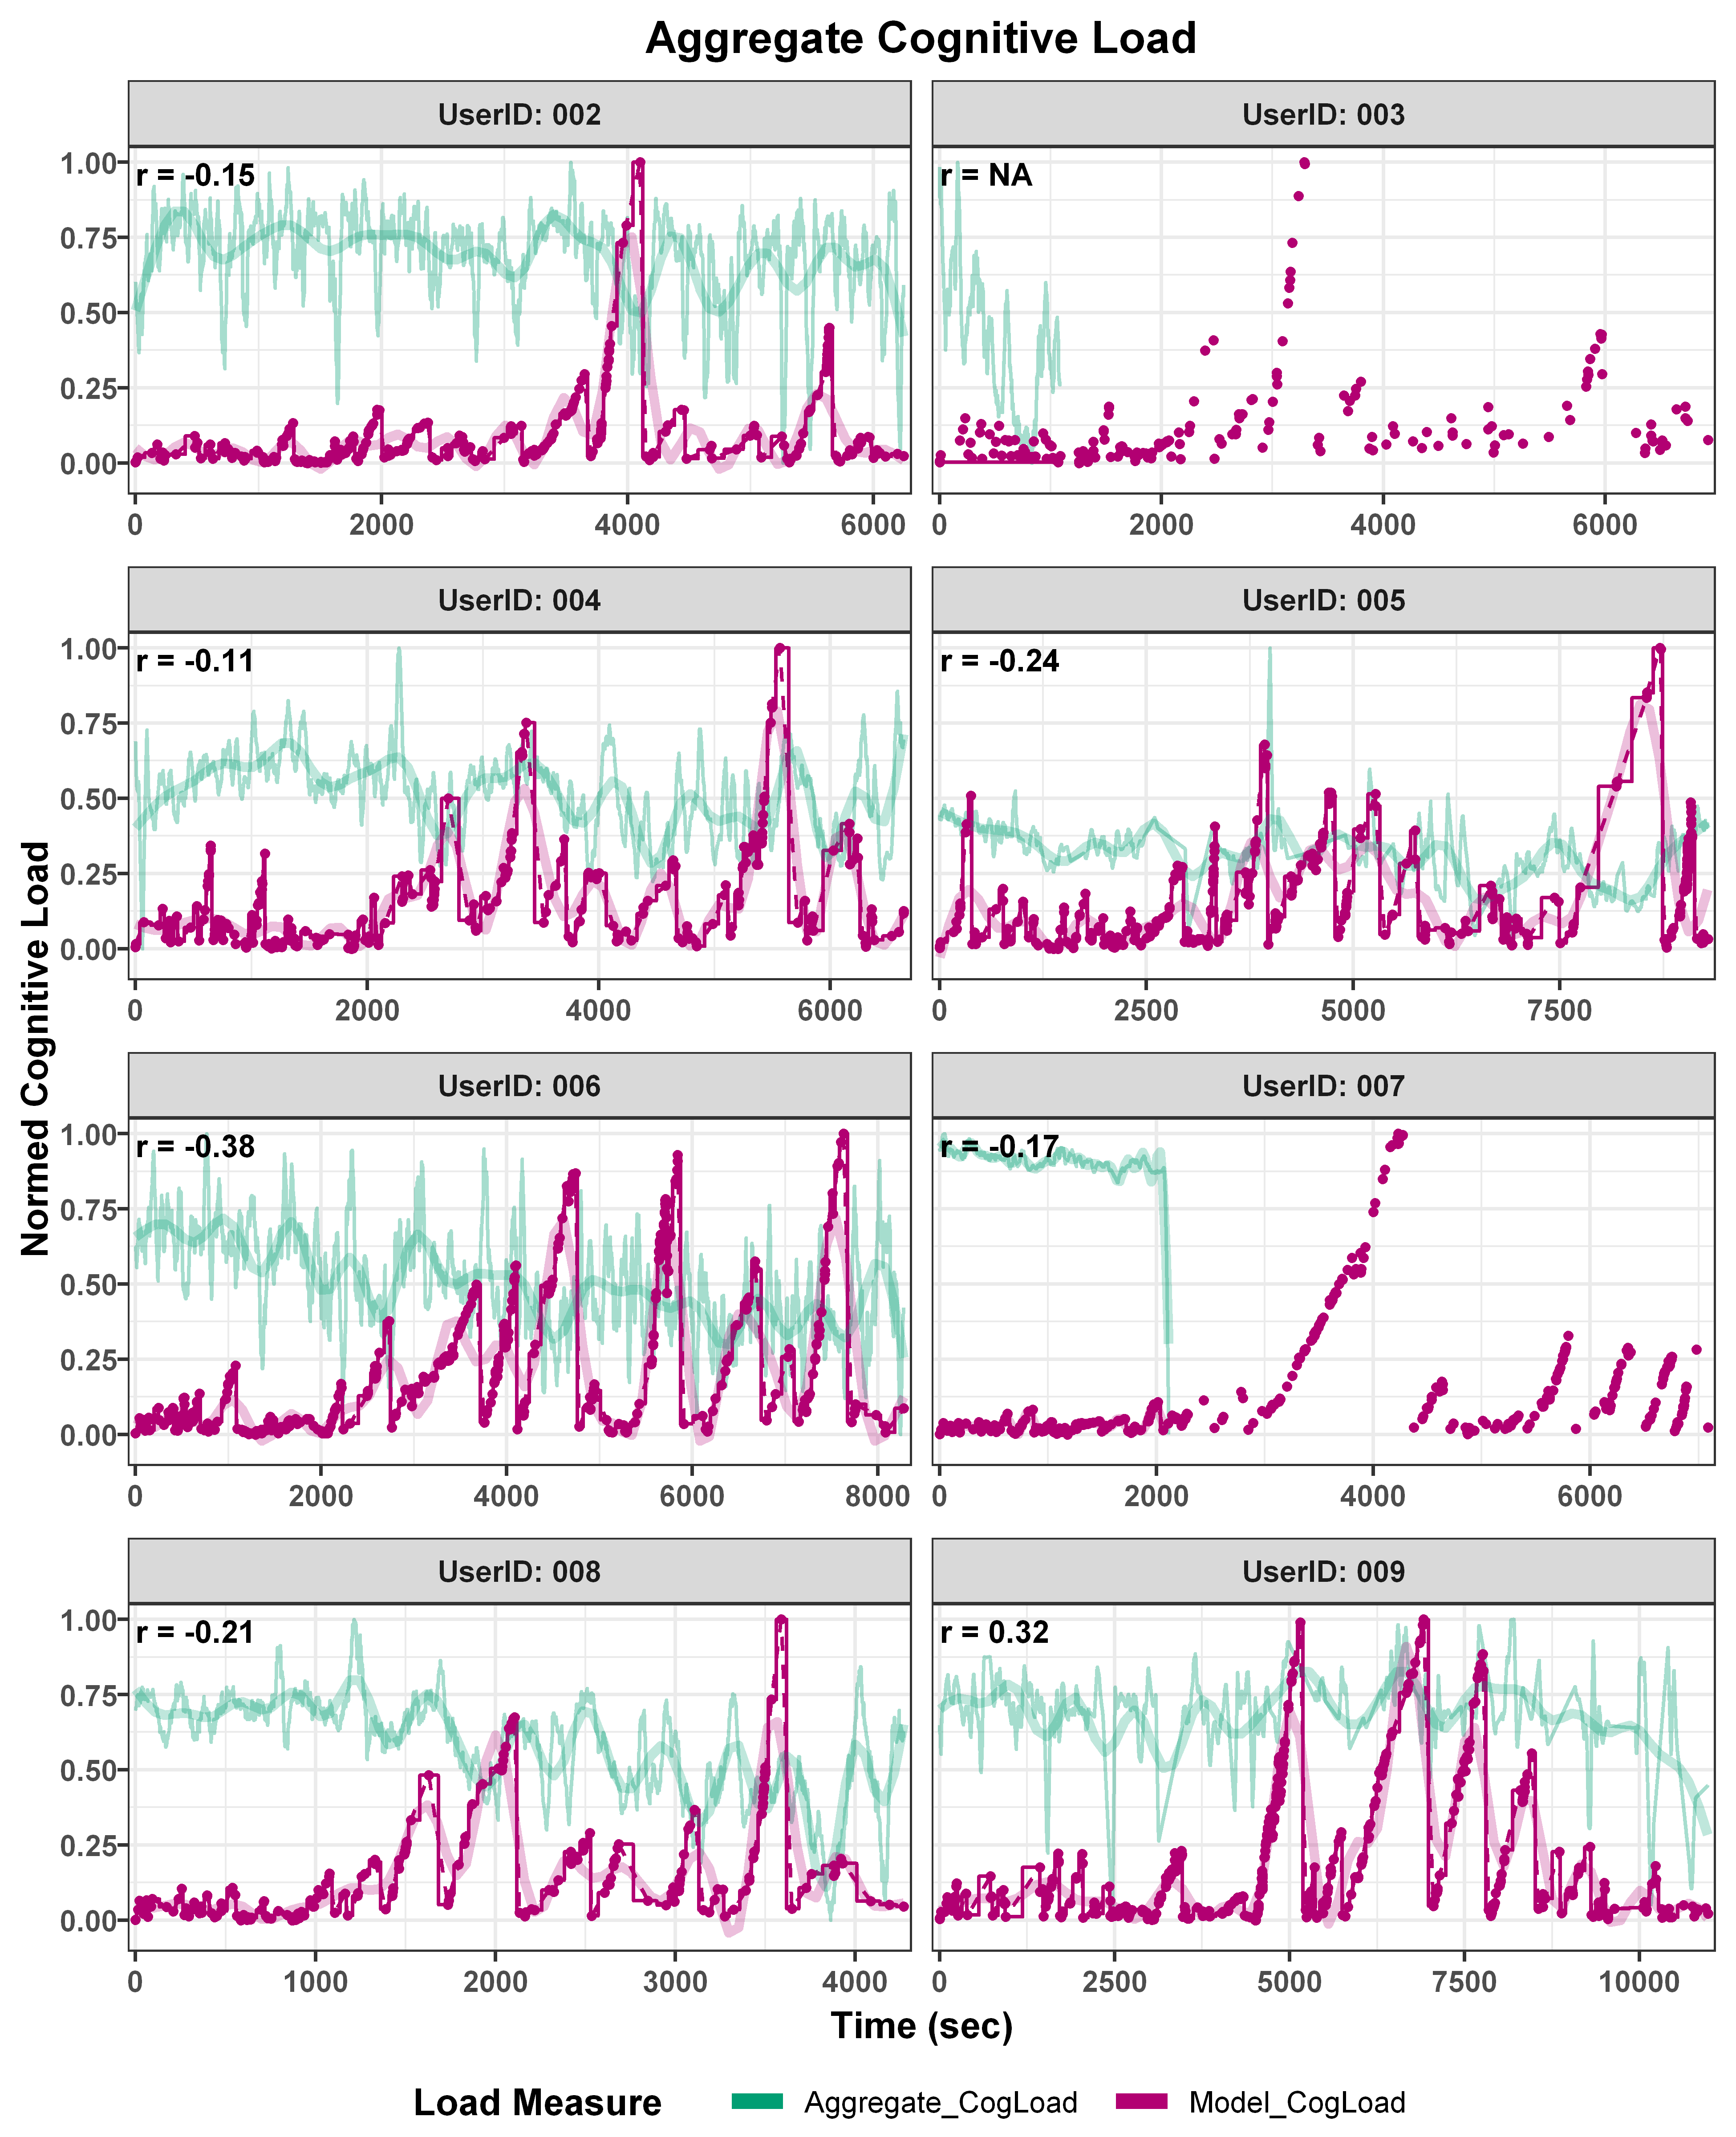

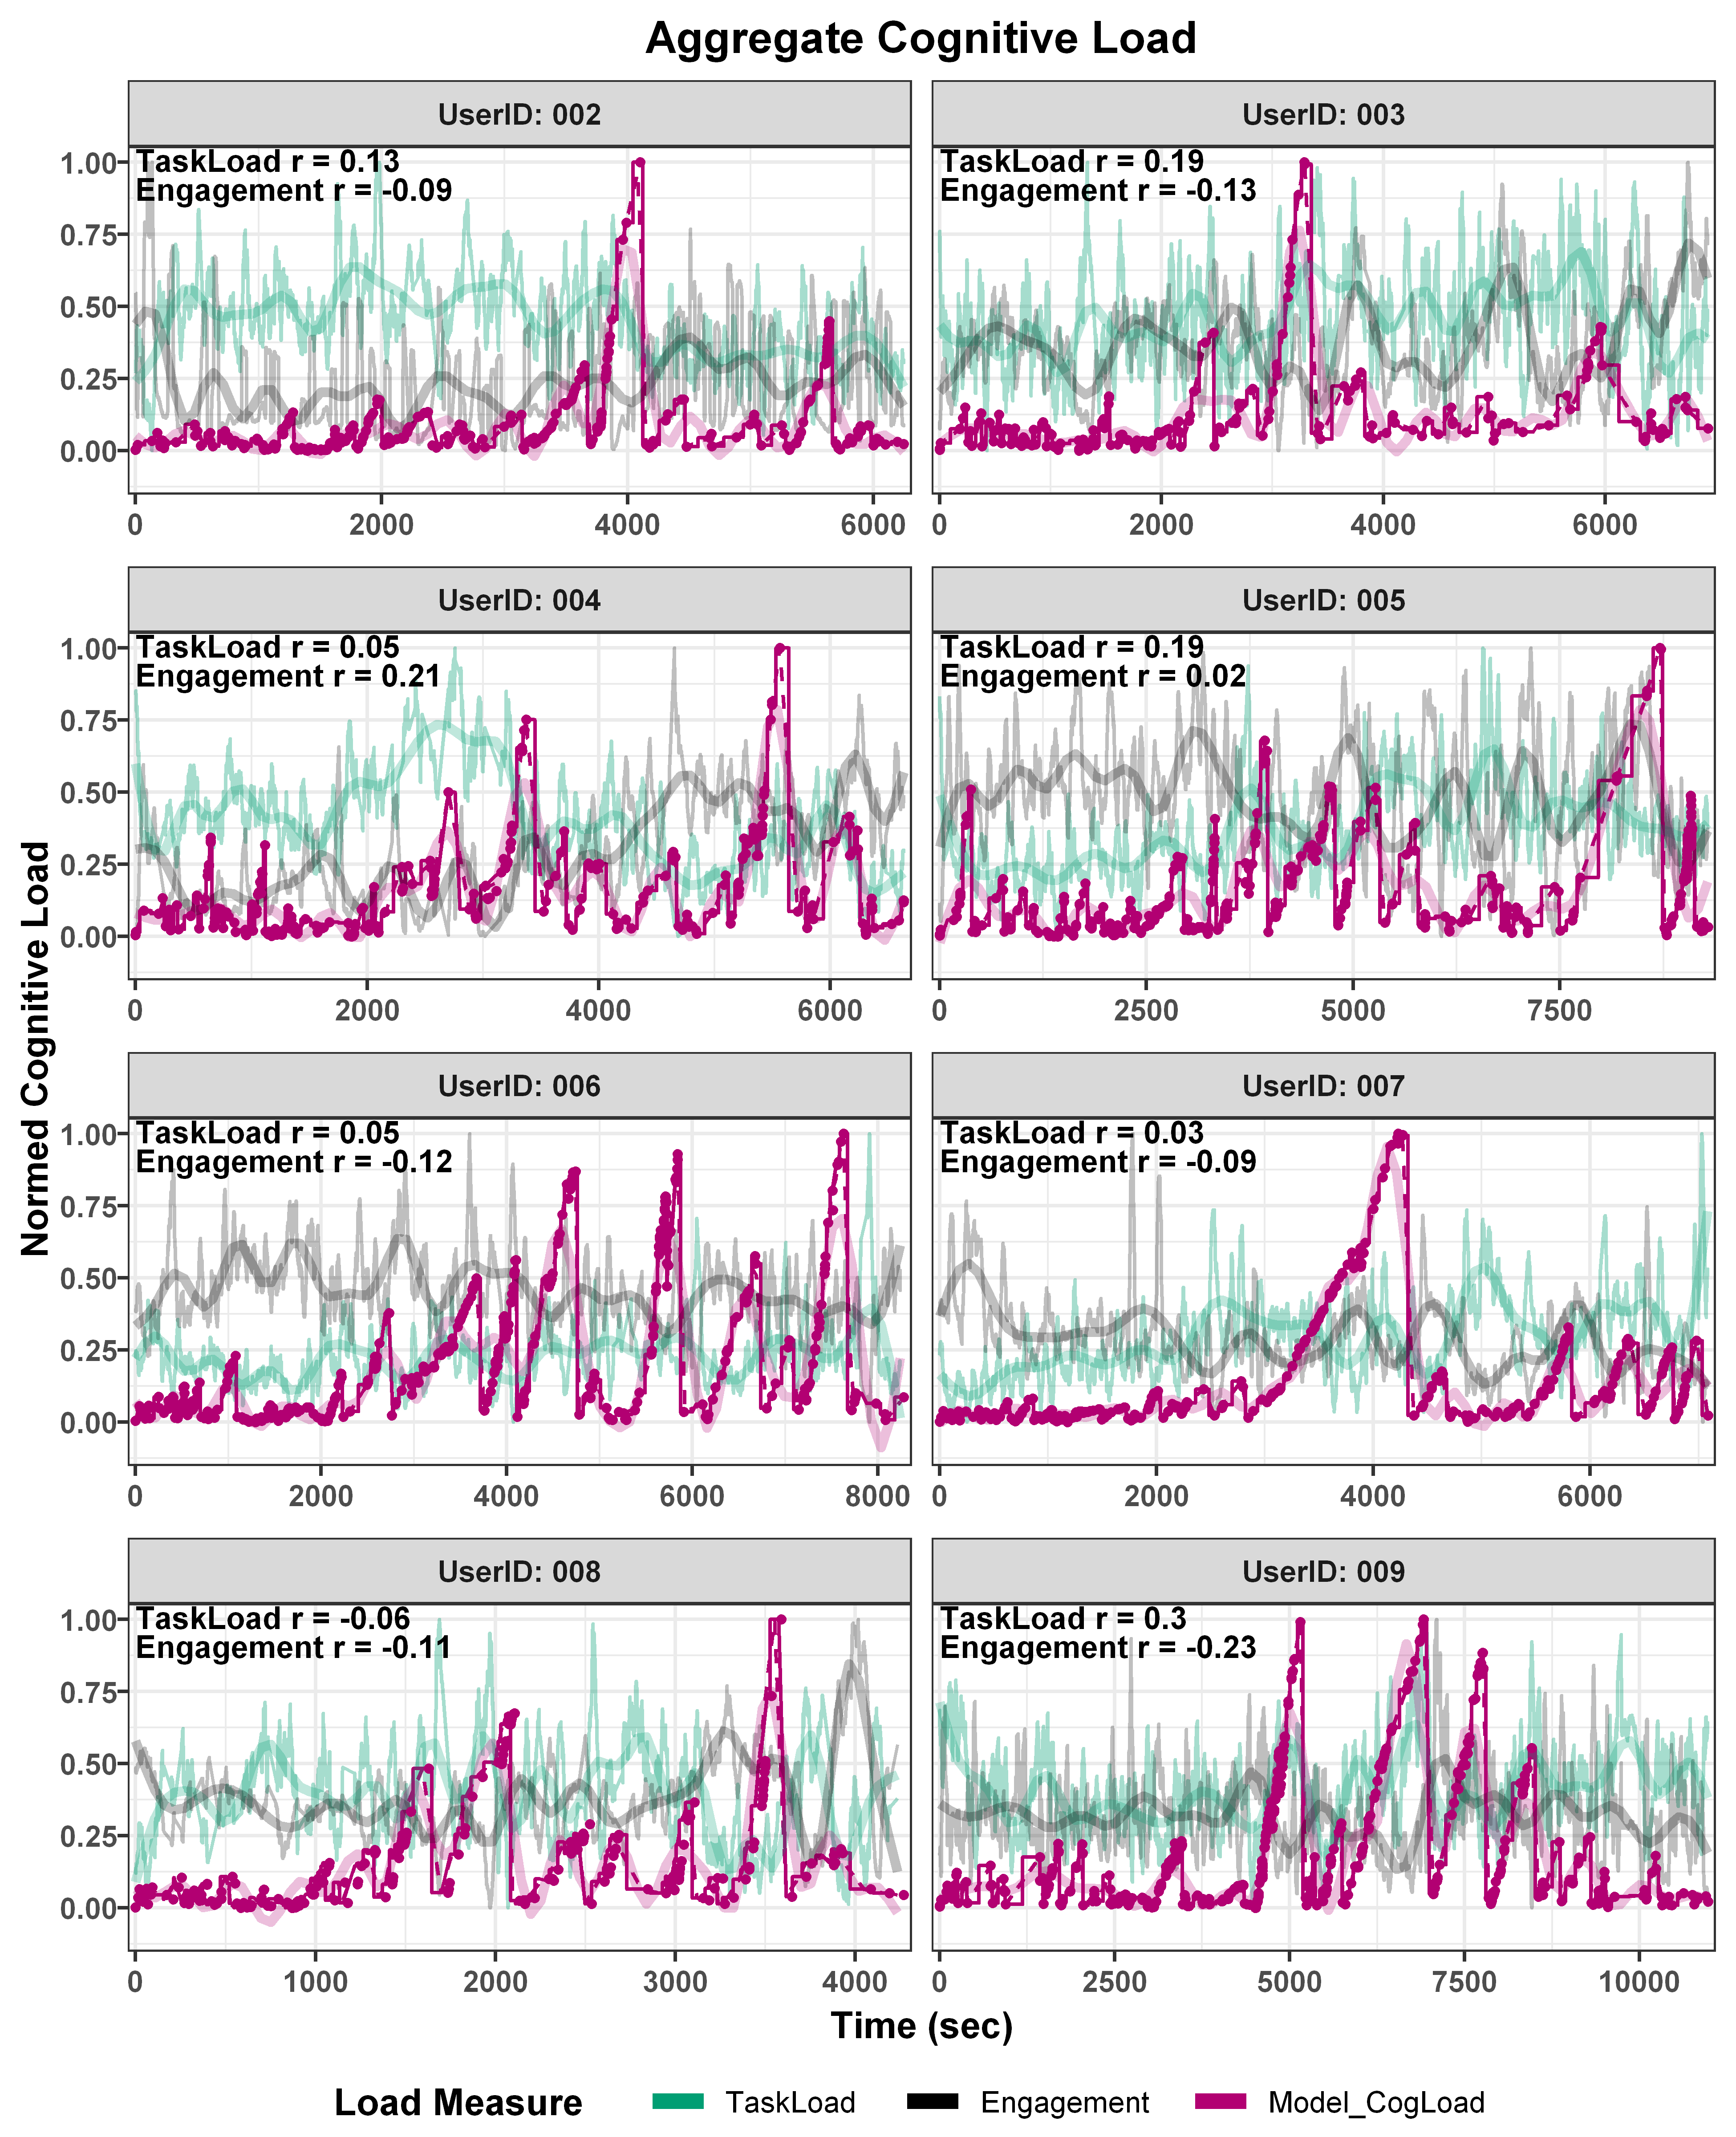

In [31]:
options(repr.plot.width=6.5, repr.plot.height=8, repr.plot.res=600)

aggload_data_full <- rbind(load_data_002,load_data_003,load_data_004,load_data_005,load_data_006,load_data_007,load_data_008,load_data_009)
#head(aggload_data_full)
aggload_data_full <-  aggload_data_full %>%
           group_by(UserID) %>%
           mutate(Time = Time-min(Time))
aggload_data_full$condition <- revalue(aggload_data_full$condition, c(Model_CogLoad_Past="Model_CogLoad"))
                                            
aggload_corrs_full <- rbind(load_corrs_002,load_corrs_003,load_corrs_004,load_corrs_005,load_corrs_006,load_corrs_007,load_corrs_008,load_corrs_009)
#head(aggload_corrs_full)
aggload_corrs_full <- left_join(aggload_corrs_full,aggload_data_full) %>%
  group_by(UserID,r_Past_rolled,r_Past_interp) %>%
  summarise(Time = min(Time))
aggload_corrs_full$value <- 1.0 
#head(aggload_corrs_full)

model_data_full <- rbind(model_load_data_002,model_load_data_003,model_load_data_004,model_load_data_005,model_load_data_006,model_load_data_007,model_load_data_008,model_load_data_009)
model_data_full <-  model_data_full %>%
           group_by(UserID) %>%
           mutate(Time = Time-min(Time))
#head(model_data_full)

load_full <- ggplot(data=aggload_data_full, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data_full, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","#B20072","#0072B2")) +
                scale_alpha_manual(values=c(0.35,1.0,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time (sec)") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                facet_wrap(. ~ UserID, scales="free_x", ncol = 2,labeller=label_both) +
                geom_text(data = aggload_corrs_full,label = paste("r =", round(aggload_corrs_full$r_Past_rolled,2)),size=3,color="black",fontface='bold',vjust=1,hjust = 0) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
load_full

engload_data_full <- rbind(eng_data_002,eng_data_003,eng_data_004,eng_data_005,eng_data_006,eng_data_007,eng_data_008,eng_data_009)
#head(engload_data_full)
engload_data_full <-  engload_data_full %>%
           group_by(UserID) %>%
           mutate(Time = Time-min(Time))
engload_data_full$condition <- revalue(engload_data_full$condition, c(Model_CogLoad_Past="Model_CogLoad"))
 
engload_corrs_full <- rbind(eng_corrs_002,eng_corrs_003,eng_corrs_004,eng_corrs_005,eng_corrs_006,eng_corrs_007,eng_corrs_008,eng_corrs_009)
#head(engload_corrs_full)
taskload_corrs_full <- left_join(engload_corrs_full,engload_data_full) %>%
  group_by(UserID,TaskLoad_r_Past_rolled,TaskLoad_r_Past_interp) %>%
  summarise(Time = min(Time))
taskload_corrs_full$value <- 1.0 
head(taskload_corrs_full)
eng_corrs_full <- left_join(engload_corrs_full,engload_data_full) %>%
  group_by(UserID,Engagement_r_Past_rolled,Engagement_r_Past_interp) %>%
  summarise(Time = min(Time))
eng_corrs_full$value <- 0.9 
head(eng_corrs_full)

eng_full <- ggplot(data=engload_data_full, aes(x=Time, y=value, colour=condition)) + labs(colour="Load Measure") +
                geom_line(size=0.5, aes(alpha=condition,linetype=type)) +
                geom_line(stat="smooth",method = "gam", formula = y ~ s(x, k = 30),size = 1.25,alpha = 0.25) +
                geom_point(data=model_data_full, aes(Time, Past_CogLoad_normed), colour="#B20072", size = 0.75) +
                scale_color_manual(values=c("#009E73","black","#B20072")) +
                scale_alpha_manual(values=c(0.35,0.25,1.0), guide="none") +
                scale_linetype_manual(values=c("solid","solid","dashed"), guide="none") +
                scale_x_continuous(expand = c(0.01, 0.01)) +
                xlab("Time (sec)") + ylab("Normed Cognitive Load") +
                guides(colour = guide_legend(override.aes = list(shape=15,size = 2))) +
                facet_wrap(. ~ UserID, scales="free_x", ncol = 2,labeller=label_both) +
                geom_text(data = taskload_corrs_full,label = paste("TaskLoad r =", round(taskload_corrs_full$TaskLoad_r_Past_rolled,2)),size=3,color="black",fontface='bold',vjust=0.4,hjust = 0) +
                geom_text(data = eng_corrs_full,label = paste("Engagement r =", round(eng_corrs_full$Engagement_r_Past_rolled,2)),size=3,color="black",fontface='bold',vjust=0.4,hjust = 0) +
                theme_bw() + ggtitle("Aggregate Cognitive Load") + 
                theme(text = element_text(size=10, face="bold"),
                      axis.title.x = element_text(margin = margin(t=2)),
                      axis.title.y = element_text(margin = margin(t=0)),
                      axis.text.x = element_text(size=8), 
                      axis.text.y = element_text(size=8, margin = margin(l=3)),
                      legend.text = element_text(size=8, face="plain",margin = margin(l=-10)),
                      legend.spacing.x = unit(0.5, 'cm'),
                      legend.position="bottom",
                      legend.box.margin=margin(-10,0,-10,-10),
                      plot.title = element_text(size=12, hjust = 0.5))
eng_full


In [92]:
pdf(file= "CogVisModel_Analyses.pdf", width=6.5, height=4.5)

plot.new()
text(x = 0.5, y = 0.5, labels = "Individual Level Plots",font=2, cex=2.0)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 002",font=2, cex=1.5)
plot(agg_002)
plot(load_002)
plot(eng_002)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 003",font=2, cex=1.5)
plot(agg_003)
plot(load_003)
plot(eng_003)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 004",font=2, cex=1.5)
plot(agg_004)
plot(load_004)
plot(eng_004)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 005",font=2, cex=1.5)
plot(agg_005)
plot(load_005)
plot(eng_005)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 006",font=2, cex=1.5)
plot(agg_006)
plot(load_006)
plot(eng_006)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 007",font=2, cex=1.5)
plot(agg_007)
plot(load_007)
plot(eng_007)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 008",font=2, cex=1.5)
plot(agg_008)
plot(load_008)
plot(eng_008)
plot.new()
text(x = 0.5, y = 0.5, labels = "Subject 009",font=2, cex=1.5)
plot(agg_009)
plot(load_009)
plot(eng_009)
plot.new()
text(x = 0.5, y = 0.5, labels = "Group Level Plots",font=2, cex=2.0)
plot(agg)
plot(dist)
plot(c)

dev.off()
dev.off()

Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 26 rows containing missing values (geom_point)."
Warning message:
"Removed 25 row(s) containing missing values (geom_path)."
Warning message:
"Removed 26 rows containing missing values (geom_point)."
Warning message:
"Removed 1087 rows containing non-finite values (stat_smooth)."
Warning message:
"Computation failed in `stat_smooth()`:
NA/NaN/Inf in foreign function call (arg 3)"
Warning message:
"Removed 1087 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1 rows containing missing values (geom_text)."
Warning message:
"Removed 25 row(s) containing missing values (geom_path)."
Warning message:
"Removed 27 rows containing missing values (geom_point)."
Warning message:
"Removed 24 row(s) containing missing values (geom_path)."
Warning message:
"Removed 26 rows containing missing values (geom_point)."
Warning message:
"Removed 24 row(s) containing missing values 

png 
  2

null device 
          1

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



Agent Task           AssemblyDist.length AssemblyDist.sum AssemblyDist.mean
1 Human POI_Triage_1   117                 4650             39.74359         
2 Human POI_Analysis_1 185                 8239             44.53514         
3 Human POI_Analysis_2  31                  582             18.77419         
4 Human POI_Triage_4    90                 3017             33.52222         
5 Human POI_Analysis_4  59                 1095             18.55932         
6 Human POI_Triage_2    60                 1881             31.35000         
  AssemblyDist.sd AssemblyDist.min AssemblyDist.max AssemblyDist.se
1 39.83655        0                124              3.682891       
2 37.78011        0                124              2.777649       
3 27.00581        0                 82              4.850387       
4 26.51573        0                 91              2.795003       
5 15.39511        0                 50              2.004272       
6 30.15093        0                 90              3.892469

Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."


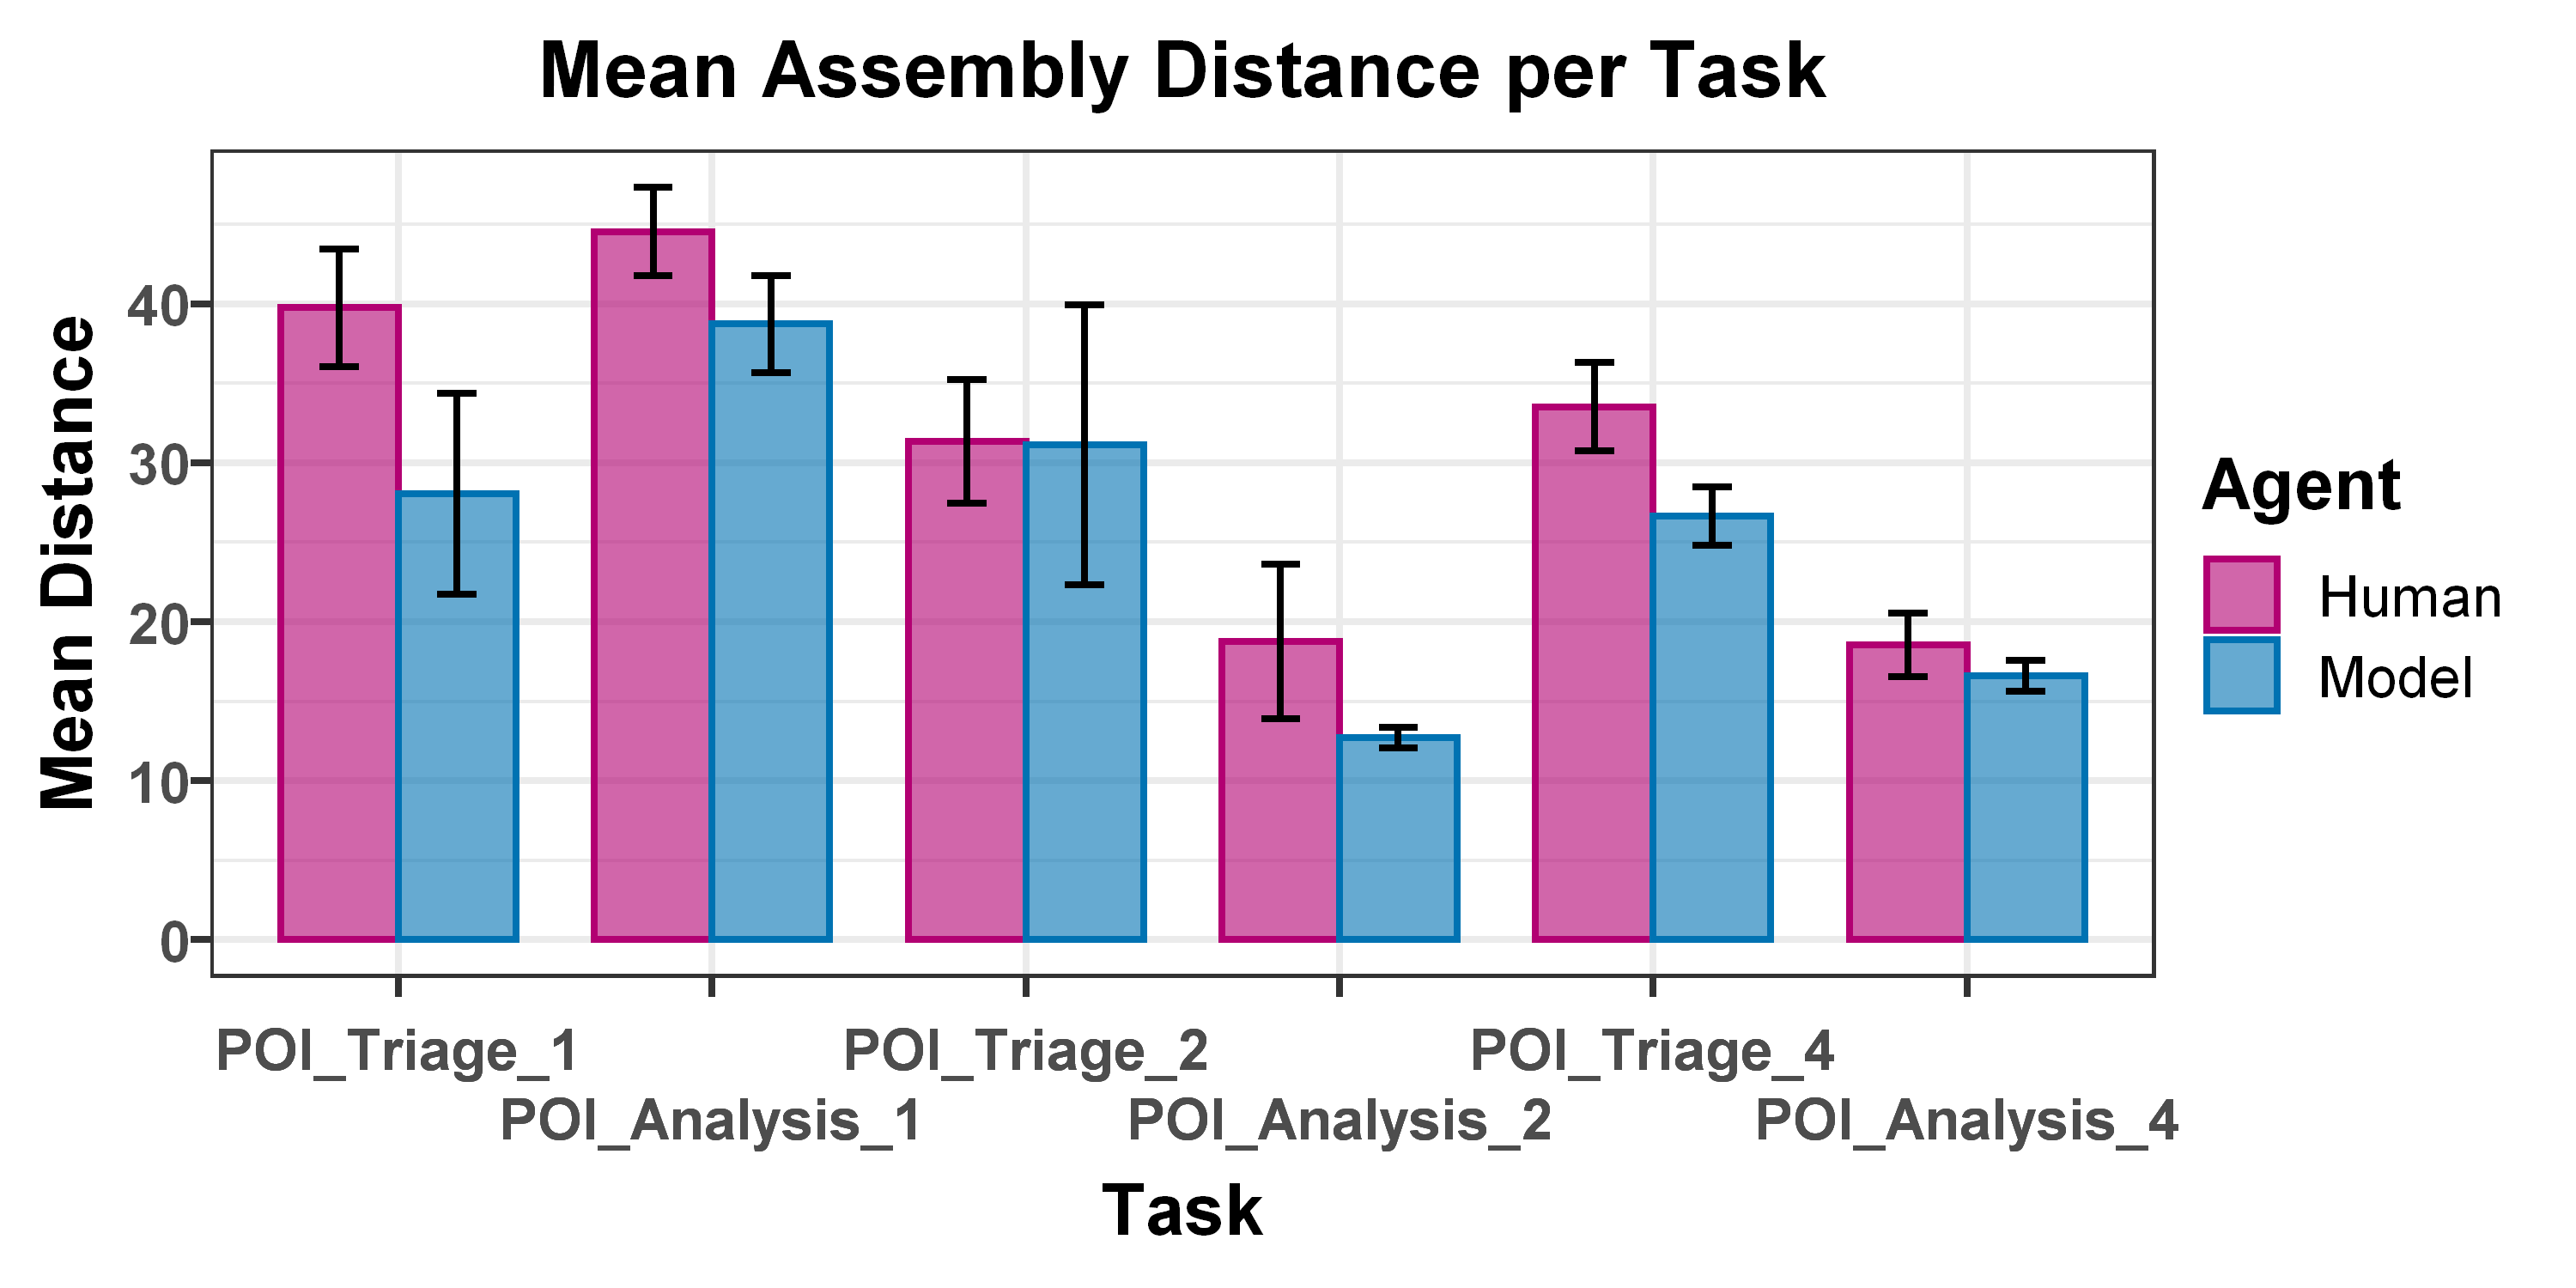

In [90]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res=600)

human_dist_data <- rbind(dist_data_002,dist_data_003,dist_data_004,dist_data_005,dist_data_006,dist_data_007,dist_data_008,dist_data_009)
human_dist_data$Agent <- "Human"

model_dist_data <- rbind(model_dist_data_002,model_dist_data_003,model_dist_data_004,model_dist_data_005,model_dist_data_006,model_dist_data_007,model_dist_data_008,model_dist_data_009)
model_dist_data$Agent <- "Model"

dist_data <- rbind(human_dist_data,model_dist_data)
dist_data <- subset(dist_data, AssemblyDist!=-1)
#head(dist_data)

dist_data <- summaryBy(AssemblyDist ~ Agent + Task, data = dist_data, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
#dist_data
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data$AssemblyDist.se <- dist_data$AssemblyDist.sd / sqrt(dist_data$AssemblyDist.length)
dist_data$Task <- factor(dist_data$Task,levels=c('POI_Triage_1','POI_Analysis_1','POI_Triage_2','POI_Analysis_2','POI_Triage_4','POI_Analysis_4'))
head(dist_data)

dist <- ggplot(data = dist_data, aes(x=Task, y=AssemblyDist.mean, group=Agent, color=Agent, fill=Agent)) + labs(fill="Agent",color="Agent") +
            geom_col(position=position_dodge(), width = 0.75) +
            #geom_point(aes(y=0,color=Agent), position=position_dodge(),size=0) +
            geom_errorbar(position=position_dodge(width=0.75),aes(ymin = AssemblyDist.mean - AssemblyDist.se, ymax = AssemblyDist.mean + AssemblyDist.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#B20072","#0072B2"),0.6)) +
            scale_color_manual(values=c("#B20072","#0072B2")) +
            #guides(color = guide_legend(override.aes = list(shape=15,size = 1))) +
            ylab("Mean Distance") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            #scale_y_continuous(limits=c(0.0,1.0)) +
            theme_bw() + ggtitle("Mean Assembly Distance per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=6)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8,vjust = grid::unit(rep(c(-2, 0),3), "points")), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  #legend.spacing.y = unit(0.075, 'cm'),
                  #legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  legend.key.size = unit(0.4, 'cm'),
                  plot.title = element_text(size=11, hjust = 0.5))
                  #plot.tag.position = c(0.85, 0.05),
                  #plot.tag = element_text(size=9, color = "#B20072"))
dist

The following `from` values were not present in `x`: Point_of_Interest_Triage_3, Point_of_Interest_Analysis_3, Point_of_Interest_Triage_5, Point_of_Interest_Analysis_5, Point_of_Interest_Triage_6, Point_of_Interest_Analysis_6



Agent Task           AssemblyDist.length AssemblyDist.sum AssemblyDist.mean
1 Human POI_Triage_1   162                 4605             28.42593         
2 Human POI_Analysis_1 200                 8224             41.12000         
3 Human POI_Analysis_2  31                  582             18.77419         
4 Human POI_Triage_4   107                 3000             28.03738         
5 Human POI_Analysis_4  59                 1095             18.55932         
6 Human POI_Triage_2    60                 1881             31.35000         
  AssemblyDist.sd AssemblyDist.min AssemblyDist.max AssemblyDist.se
1 38.45120        -1               124              3.021011       
2 38.26640        -1               124              2.705843       
3 27.00581         0                82              4.850387       
4 27.40607        -1                91              2.649445       
5 15.39511         0                50              2.004272       
6 30.15093         0                90              3.892469

Warning message:
"Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2."


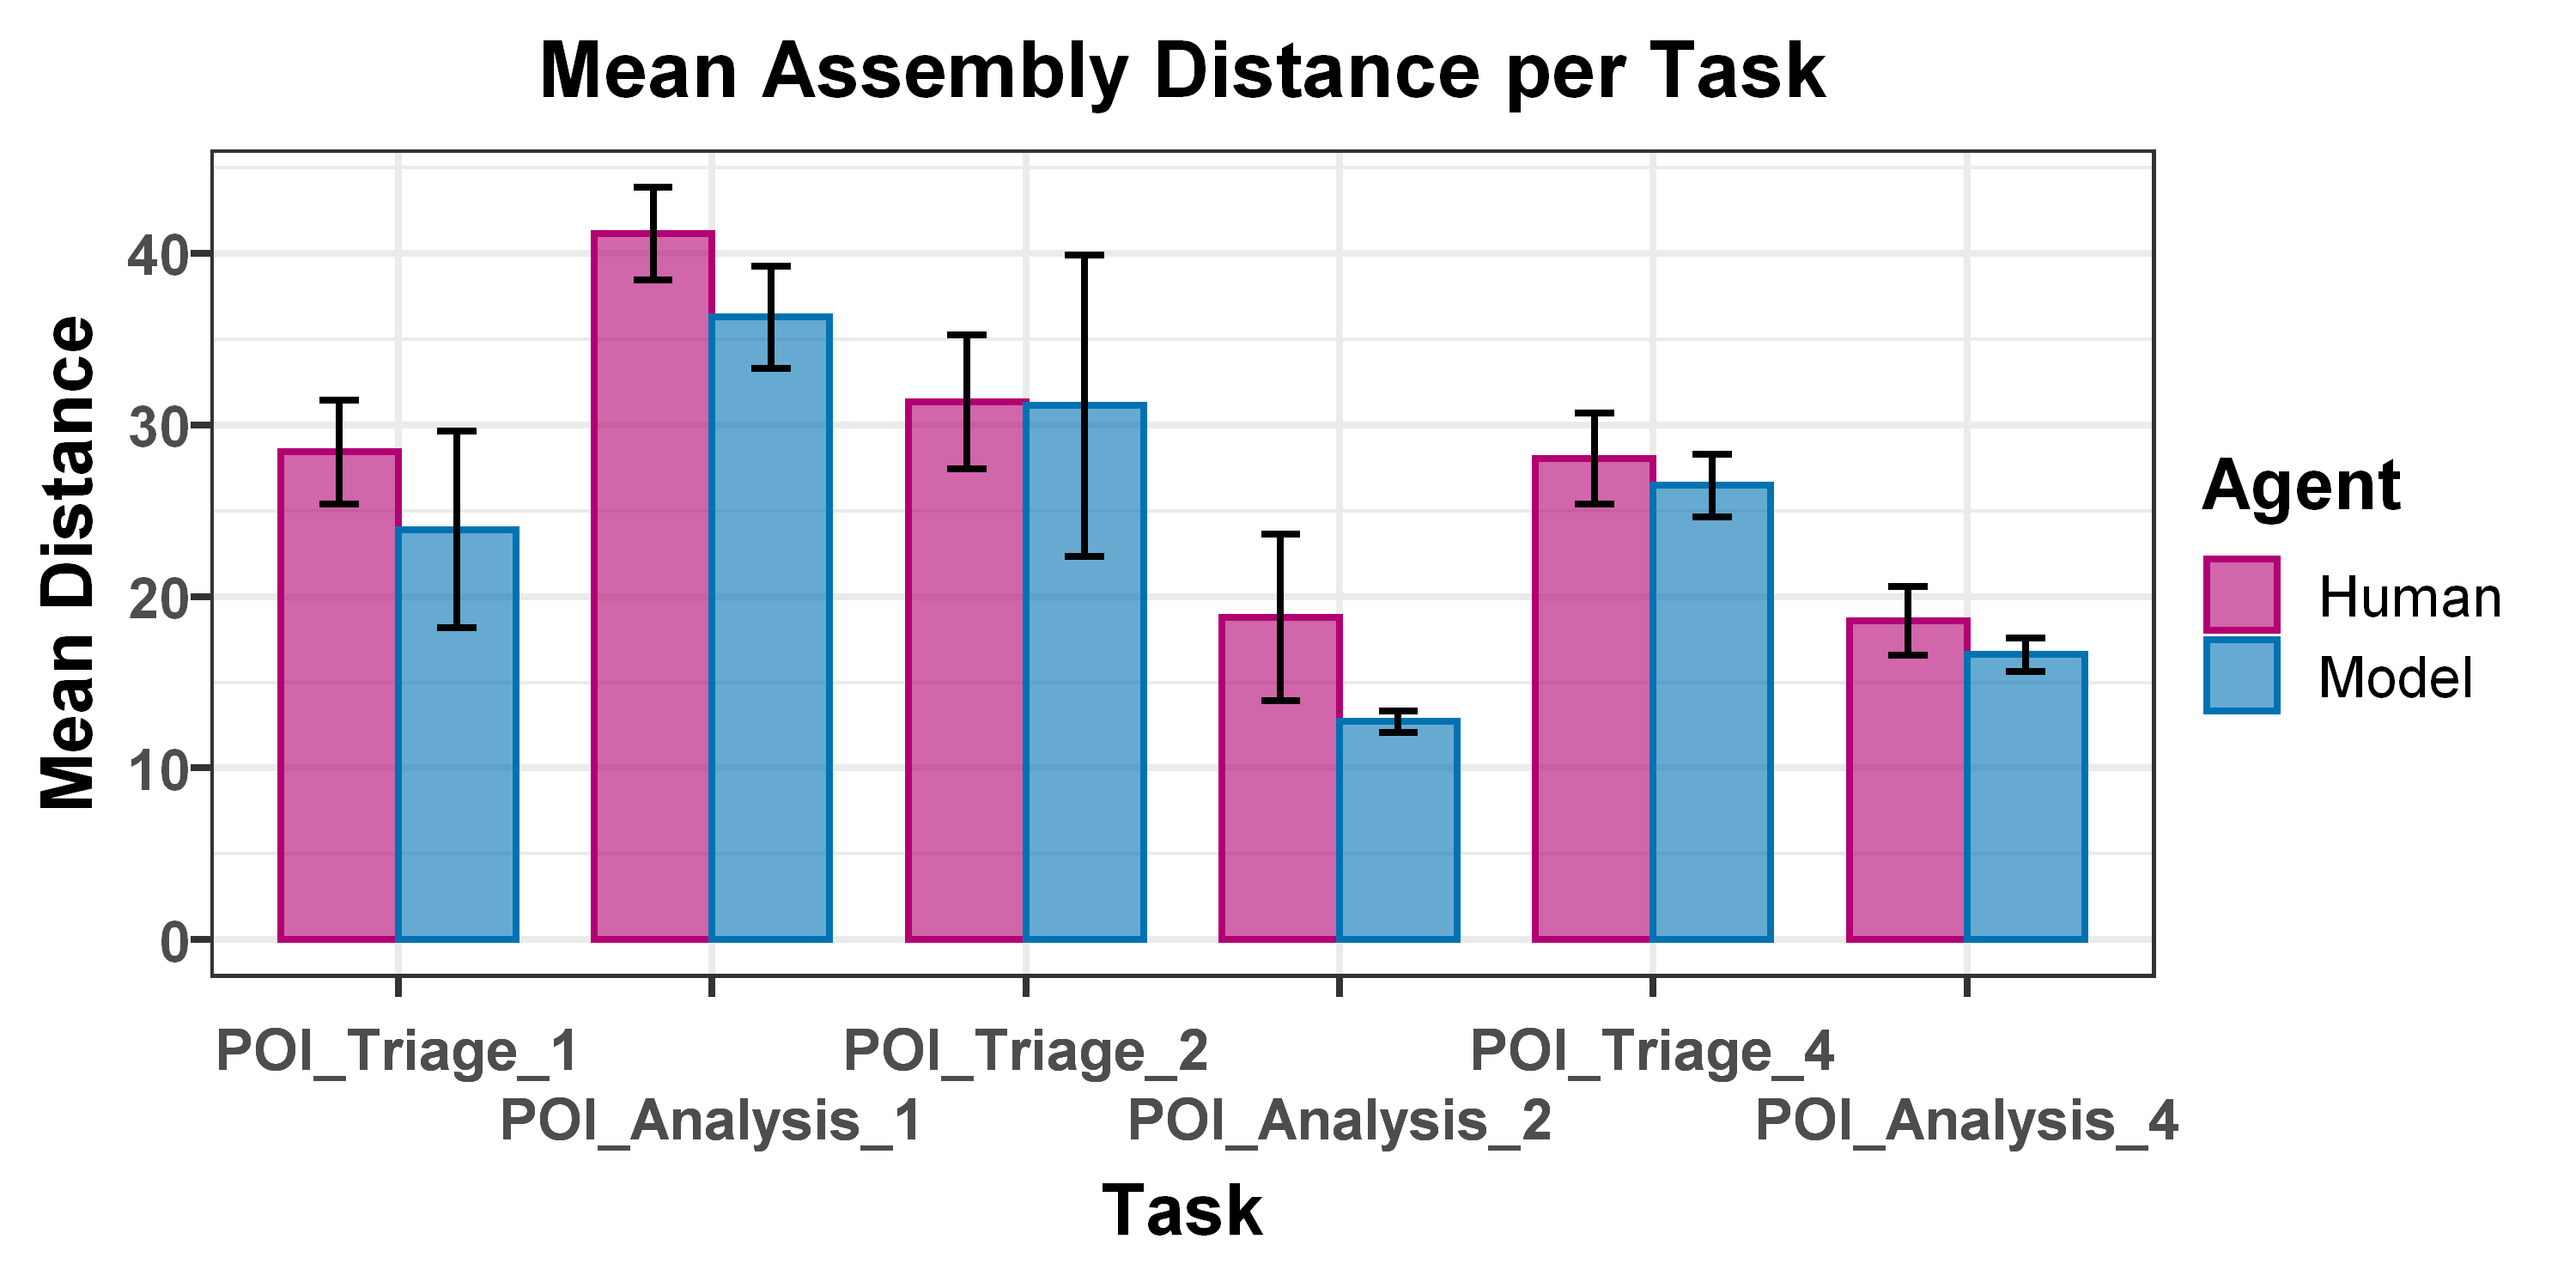

In [89]:
options(repr.plot.width=5, repr.plot.height=2.5, repr.plot.res=600)

human_dist_data <- rbind(dist_data_002,dist_data_003,dist_data_004,dist_data_005,dist_data_006,dist_data_007,dist_data_008,dist_data_009)
human_dist_data$Agent <- "Human"

model_dist_data <- rbind(model_dist_data_002,model_dist_data_003,model_dist_data_004,model_dist_data_005,model_dist_data_006,model_dist_data_007,model_dist_data_008,model_dist_data_009)
model_dist_data$Agent <- "Model"

dist_data <- rbind(human_dist_data,model_dist_data)
#dist_data <- subset(dist_data, AssemblyDist!=-1)
#head(dist_data)

dist_data <- summaryBy(AssemblyDist ~ Agent + Task, data = dist_data, keep.name=TRUE, order=FALSE, FUN=c(length, sum, mean, sd, min, max))
#dist_data
dist_data$Task <- revalue(dist_data$Task, c(Point_of_Interest_Triage_1="POI_Triage_1", Point_of_Interest_Analysis_1="POI_Analysis_1",
                                            Point_of_Interest_Triage_2="POI_Triage_2", Point_of_Interest_Analysis_2="POI_Analysis_2",
                                            Point_of_Interest_Triage_3="POI_Triage_3", Point_of_Interest_Analysis_3="POI_Analysis_3",
                                            Point_of_Interest_Triage_4="POI_Triage_4", Point_of_Interest_Analysis_4="POI_Analysis_4",
                                            Point_of_Interest_Triage_5="POI_Triage_5", Point_of_Interest_Analysis_5="POI_Analysis_5",
                                            Point_of_Interest_Triage_6="POI_Triage_6", Point_of_Interest_Analysis_6="POI_Analysis_6"))

dist_data$AssemblyDist.se <- dist_data$AssemblyDist.sd / sqrt(dist_data$AssemblyDist.length)
dist_data$Task <- factor(dist_data$Task,levels=c('POI_Triage_1','POI_Analysis_1','POI_Triage_2','POI_Analysis_2','POI_Triage_4','POI_Analysis_4'))
head(dist_data)

dist <- ggplot(data = dist_data, aes(x=Task, y=AssemblyDist.mean, group=Agent, color=Agent, fill=Agent)) + labs(fill="Agent",color="Agent") +
            geom_col(position=position_dodge(), width = 0.75) +
            #geom_point(aes(y=0,color=Agent), position=position_dodge(),size=0) +
            geom_errorbar(position=position_dodge(width=0.75),aes(ymin = AssemblyDist.mean - AssemblyDist.se, ymax = AssemblyDist.mean + AssemblyDist.se), colour="black", size=.50, width=.25) +
            scale_fill_manual(values=alpha(c("#B20072","#0072B2"),0.6)) +
            scale_color_manual(values=c("#B20072","#0072B2")) +
            #guides(color = guide_legend(override.aes = list(shape=15,size = 1))) +
            ylab("Mean Distance") + xlab("Task") + #ylim(0.0,1.0) + #coord_fixed(1.2) +
            #scale_y_continuous(limits=c(0.0,1.0)) +
            theme_bw() + ggtitle("Mean Assembly Distance per Task") + 
            theme(text = element_text(size=10, face="bold"),
                  axis.title.x = element_text(margin = margin(t=6)),
                  axis.title.y = element_text(margin = margin(t=0)),
                  axis.text.x = element_text(size=8,vjust = grid::unit(rep(c(-2, 0),3), "points")), 
                  axis.text.y = element_text(size=8, margin = margin(l=3)),
                  legend.text = element_text(size=8, face="plain"),
                  #legend.spacing.y = unit(0.075, 'cm'),
                  #legend.position = "top",
                  legend.box.margin=margin(-5,0,-10,-10),
                  legend.key.size = unit(0.4, 'cm'),
                  plot.title = element_text(size=11, hjust = 0.5))
                  #plot.tag.position = c(0.85, 0.05),
                  #plot.tag = element_text(size=9, color = "#B20072"))
dist